# Imports

In [ ]:
import numpy as np
import pandas as pd
from heapq import heappop, heappush  
from copy import deepcopy
import random
import matplotlib.pyplot as plt
from collections import deque
from sys import maxsize
import seaborn as sns
import math

# Environment

In [ ]:
def generate(size):
  grid = np.random.randint(2, size=(size, size))
  GRID = ''
  for i in range(size):
    for j in range(size):
      if grid[i][j] == 0:
        GRID += 'X'
      else:
        GRID += '_'
    if i < size - 1:
      GRID += '\n'
  return GRID
  


In [ ]:
GRID = "XXXX__X_\n_XX_X___\n_X___X__\n_____X_X\n__XX_X__\nX_XX___X\nX_XXX__X\nX_XX____"

# Uncomment to run on actual GRID
#GRID = "_________________X_\n_XXXXXX_X_X_XXXXXX_\n_XX___X_X_X______X_\n_X__X_X_X_X_X_XX_X_\n_XXXX_X_X_X_X_X__X_\n______X_X_X_X_X__X_\nXXXXXXX_X_X_X_XXXX_\n________X_X________\n_XXXXXXXX_XXXXXXXX_\n___________________\n_XXXXXXXX_XXXXXXXX_\n____X___X_X___XXXXX\nX_X___X_X_X_X______\nXXXXXXXXX_X_X_X_XXX\n________X_X_X_X____\nXXXXXX_XX_X_X_X_X_X\n________X_X_X_X_X_X\n_XXXXXX_X_X_X_X_X_X\n______X_____X_X_X__"


In [ ]:

class Environment:
  def __init__(self):
    self.grid = self.make_grid()
    self.prob = self.fill_prob()
    self.shortest_distance = self.compute_distances()

  
  def make_grid(self):
    grid = []
    for line in GRID.split('\n'):
      row = []
      for char in line:
        if char == '_':
          row.append(1)
        elif char == 'X':
          row.append(0)
      grid.append(row)
    return np.array(grid)
  
  def fill_prob(self):
    prob = []
    non_zeros = np.count_nonzero(self.grid)
    for i in range(len(self.grid)):
      row = []
      for j in range(len(self.grid[0])):
        if self.grid[i][j] == 1:
          row.append(round(1/non_zeros, 4))
        else:
          row.append(-1.0)
      prob.append(row)
    return np.array(prob)

  def is_valid(self, neigh_x, neigh_y, visited):
    if (neigh_x < 0 or neigh_x >= len(visited[0]) or neigh_y < 0 or neigh_y >= len(visited)):
      return False
    return visited[neigh_x][neigh_y] != True

  def bfs(self, start, end):
    visited = [[False for i in range(len(self.grid))] for j in range(len(self.grid[0]))]
    x = [-1 , 1, 0, 0]
    y = [0, 0, -1, 1]
    queue = [start]
    visited[start[0]][start[1]] = True
    dist = 0
    while len(queue) > 0:
      current = queue.pop()
      

      if current[0] == end[0] and current[1] == end[1]:
        return dist

      for dir in range(4):
        neigh_x = current[0] + x[dir]
        neigh_y = current[1] + y[dir]

        if (self.is_valid(neigh_x, neigh_y, visited) and self.grid[neigh_x][neigh_y] == 1):
          queue.append((neigh_x, neigh_y))
          visited[neigh_x][neigh_y] = True
      dist += 1
      
    return math.inf

    
  def compute_distances(self):
    shortest_distance = {}
    cells = []
    for i in range(len(self.grid)):
      for j in range(len(self.grid[0])):
        cells.append((i, j))
    

    for i in cells:
      for j in cells:
        if (i, j) not in shortest_distance:
          shortest_distance[(i, j)] = self.bfs(i, j)

    return shortest_distance


# Implement A* algorithm

In [ ]:
def gameFinished(prob):
  count = 0
  for i in range(len(prob)):
    for j in range(len(prob[0])):
      if prob[i][j] != -1 and prob[i][j] != 0:
        count += 1
  return count == 1

def non_zero_cells(prob):
  cells = []
  for i in range(len(prob)):
    for j in range(len(prob[0])):
      if prob[i][j] != -1:
        cells.append((i, j))
  return cells

def prob_sum(prob):
  pb_sum = 0
  for i in range(len(prob)):
    for j in range(len(prob[0])):
      if prob[i][j] != -1:
        pb_sum += prob[i][j]
  return pb_sum

def select_best_action(action_values, env):
  potential_actions = []
  heuristic_action = {}
  f_x = float('inf')
  
  for prob, action in action_values:
    heuristic = non_zeros(prob) + mean_square_error(prob) + distance(prob, env)
    f_x = min(f_x, heuristic)
    heuristic_action[action] = (heuristic, prob)

  for key, val in heuristic_action.items():
    if val[0] == f_x:
      potential_actions.append((val[1], key))
  
  return random.choice(potential_actions)

def Astar(prob, env):
  sequence = []
  actions = ['LEFT', 'RIGHT', 'UP', 'DOWN']
  while True:

    if(gameFinished(prob) == True):
      break

    action_values = []

    for action in actions:
      if action == 'LEFT':
        action_values.append((left(prob), action))
      elif action == 'RIGHT':
        action_values.append((right(prob), action))
      elif action == 'UP': 
        action_values.append((up(prob), action))
      else:
        action_values.append((down(prob), action))

    prob, action = select_best_action(action_values, env)
    sequence.append(action)
    
    print('Number of zeros:', count_zeros(prob))
    print('Action:', action, 'Belief Sum:', prob_sum(prob),'MSE:', mean_square_error(prob))


    plotgrid(np.asanyarray(prob))

  return sequence


# Heuristic related Subroutines


In [ ]:
def distance(prob, env):
  total_dist = 0
  cells = non_zero_cells(prob)
  for i in cells:
    for j in cells:

      dist = env.shortest_distance[(i, j)]

      if dist != math.inf:
        total_dist += dist

  return total_dist

def mean_square_error(prob):
  mse, count = 0, 0
  for i in range(len(prob)):
    for j in range(len(prob[0])):
      if prob[i][j] != -1 and prob[i][j] != 0:
        mse += (1.0 - prob[i][j])**2
        count += 1
  return mse/count

def count_zeros(prob):
  count = 0
  for i in range(len(prob)):
    for j in range(len(prob[0])):
      if prob[i][j] == 0:
        count += 1
  return count

def non_zeros(prob):
  count = 0
  for i in range(len(prob)):
    for j in range(len(prob[0])):
      if prob[i][j] != 0 and prob[i][j] != -1:
        count += 1
  return count

# Actions related Subroutines 


In [ ]:
def right(prob):
  temp_prob = [[0 for i in range(len(prob[0]))] for j in range(len(prob))]
  for row in range(len(prob)):
    col = 1
    while(col < len(prob[0])):
      # Obstacle
      if prob[row][col] == -1:
          temp_prob[row][col] = prob[row][col]

          # Update previous state
          if prob[row][col - 1] != -1: 
            temp_prob[row][col - 1] += prob[row][col - 1]
          else:
            temp_prob[row][col - 1] = -1

      else:
        # Update Current state
        if prob[row][col - 1] != -1:
          temp_prob[row][col] += prob[row][col - 1]
          if col == len(prob[0]) - 1:
            temp_prob[row][col] += prob[row][col]
        else:
          # Obstacle
          if col == len(prob[0]) - 1:
            temp_prob[row][col] = prob[row][col]
          temp_prob[row][col - 1] = -1
      col += 1

  return np.array(temp_prob)


def left(prob):
  temp_prob = [[0 for i in range(len(prob[0]))] for j in range(len(prob))]
  for row in range(len(prob)):
    col = len(prob[0]) - 2
    while(col >= 0):
      # Obstacle
      if prob[row][col] == -1:
          temp_prob[row][col] = prob[row][col]
          # Update previous state
          if prob[row][col + 1] != -1:
            temp_prob[row][col + 1] += prob[row][col + 1]
          else:
            temp_prob[row][col + 1] = -1
      else:
          # Update Current state
          if prob[row][col + 1] != -1:
            temp_prob[row][col] += prob[row][col + 1]
            if col == 0:
              temp_prob[row][col] += prob[row][col]
          # Obstacle
          else:                           
            if col == 0:
              temp_prob[row][col] = prob[row][col]
            temp_prob[row][col + 1] = -1

      col -= 1        
  return np.array(temp_prob)


def down(prob):
  # Transposing the matrix and resuing right functionality
  temp_prob = right(np.transpose(prob))
  return np.transpose(temp_prob)


def up(prob):
  # Transposing the matrix and resuing left functionality
  temp_prob = left(np.transpose(prob))
  return np.transpose(temp_prob)

      

In [ ]:
t = [[1/2, -1, 1/2, -1]]
pd.DataFrame(t)

,0,1,2,3
0,0.5,-1,0.5,-1


In [ ]:
t = right(t)
pd.DataFrame(t)

,0,1,2,3
0,0.5,-1.0,0.5,-1.0


In [ ]:
t = [[1/6, -1, -1, -1, 1/6], [1/6, 1/6, -1, -1, -1], [1/6, 1/6, -1, -1, 1/6]]

pd.DataFrame(t)

,0,1,2,3,4
0,0.166667,-1.000000,-1,-1,0.166667
1,0.166667,0.166667,-1,-1,-1.000000
2,0.166667,0.166667,-1,-1,0.166667


In [ ]:
t = down(t)
pd.DataFrame(t)

,0,1,2,3,4
0,0.000000,-1.000000,-1.0,-1.0,0.166667
1,0.166667,0.000000,-1.0,-1.0,-1.000000
2,0.333333,0.333333,-1.0,-1.0,0.166667


In [ ]:
t = [[1/6, -1, -1, -1, 1/6], [1/6, 1/6, -1, -1, -1], [1/6, 1/6, -1, -1, -1]]
pd.DataFrame(t)

,0,1,2,3,4
0,0.166667,-1.000000,-1,-1,0.166667
1,0.166667,0.166667,-1,-1,-1.000000
2,0.166667,0.166667,-1,-1,-1.000000


In [ ]:
t = up(t)
pd.DataFrame(t)

,0,1,2,3,4
0,0.333333,-1.000000,-1.0,-1.0,0.166667
1,0.166667,0.333333,-1.0,-1.0,-1.000000
2,0.000000,0.000000,-1.0,-1.0,-1.000000


In [ ]:
t = [[1/4, 1/4, 1/4, -1, 1/4]]
pd.DataFrame(t)

,0,1,2,3,4
0,0.25,0.25,0.25,-1,0.25


In [ ]:
t = left(t)
pd.DataFrame(t)

,0,1,2,3,4
0,0.5,0.25,0.0,-1.0,0.25


In [ ]:
t = right(t)
pd.DataFrame(t)

,0,1,2,3,4
0,0.0,0.5,0.25,-1.0,0.25


# Visualization Related Subroutines

In [ ]:
# Plot Heatmap
def heatmap(prob):
  temp_prob = []
  for i in range(len(prob)):
    pr = []
    for j in range(len(prob[0])):
      if prob[i][j] == -1:
        pr.append(0)
      else:
        pr.append(prob[i][j]*75)
    temp_prob.append(pr)

  df = pd.DataFrame(temp_prob, columns=[i for i in range(0, len(prob[0]))])
  sns.heatmap(df, annot = True, annot_kws={"size": 7})
  plt.show() 




def plotgrid(mat):
  fig, ax = plt.subplots()
  plt.rcParams["figure.figsize"] = [15, 15]
  plt.rc('font', size = 10)
  ax.matshow(mat, cmap=plt.cm.coolwarm)

  for i in range(len(mat)):
    for j in range(len(mat[0])):
      c = round(mat[j][i], 3)
      ax.text(i, j, str(c), va='center', ha='center')
  plt.show()


# Create Environment

In [ ]:
env = Environment()
print(env.grid)

[[0 0 0 0 1 1 0 1]
 [1 0 0 1 0 1 1 1]
 [1 0 1 1 1 0 1 1]
 [1 1 1 1 1 0 1 0]
 [1 1 0 0 1 0 1 1]
 [0 1 0 0 1 1 1 0]
 [0 1 0 0 0 1 1 0]
 [0 1 0 0 1 1 1 1]]


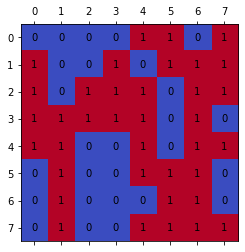

In [ ]:
# Visualize Grid
plotgrid(env.grid)

# Q2 Heatmap Visualization

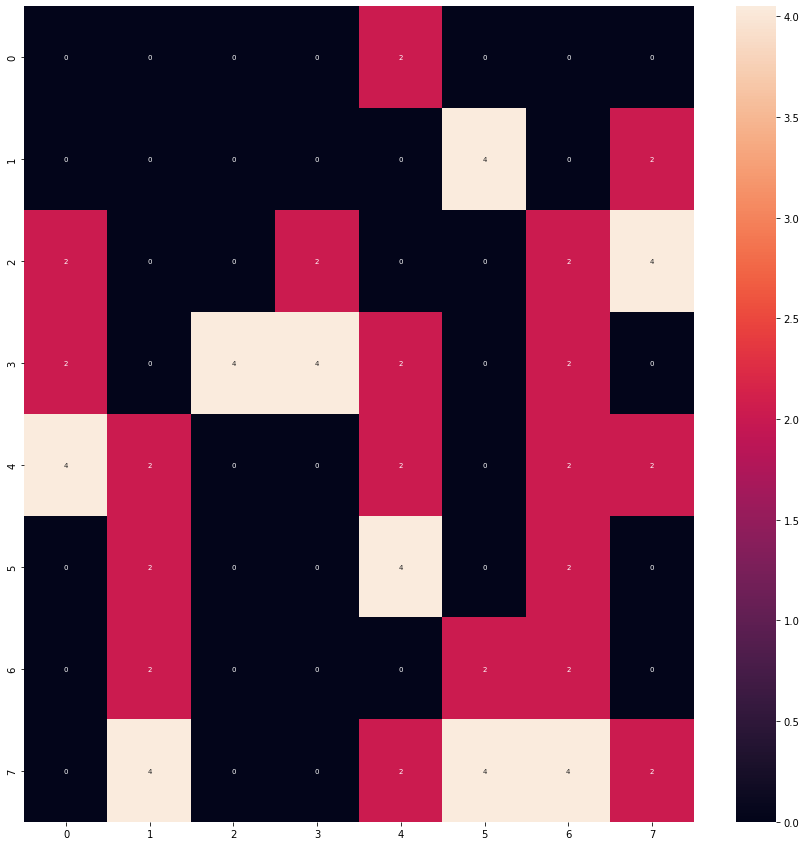

In [ ]:
heatmap(down(env.prob))

# Q3 Find Sequence of Actions

Number of zeros: 10
Action: RIGHT Belief Sum: 0.9990000000000006 MSE: 0.927539


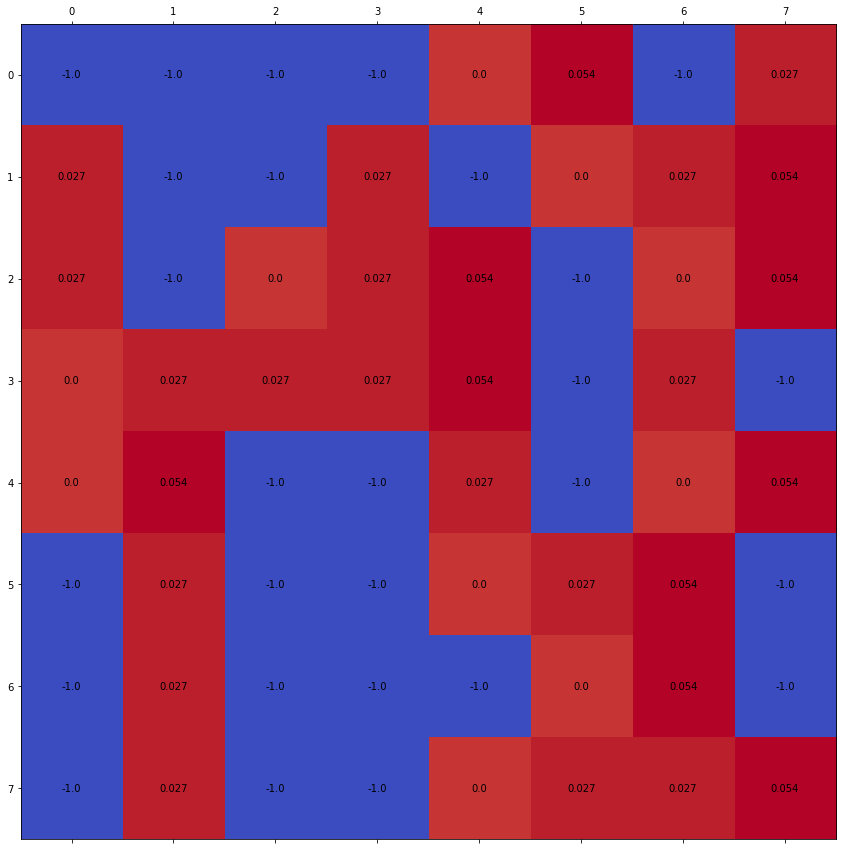

Number of zeros: 15
Action: RIGHT Belief Sum: 0.9990000000000002 MSE: 0.9117333181818181


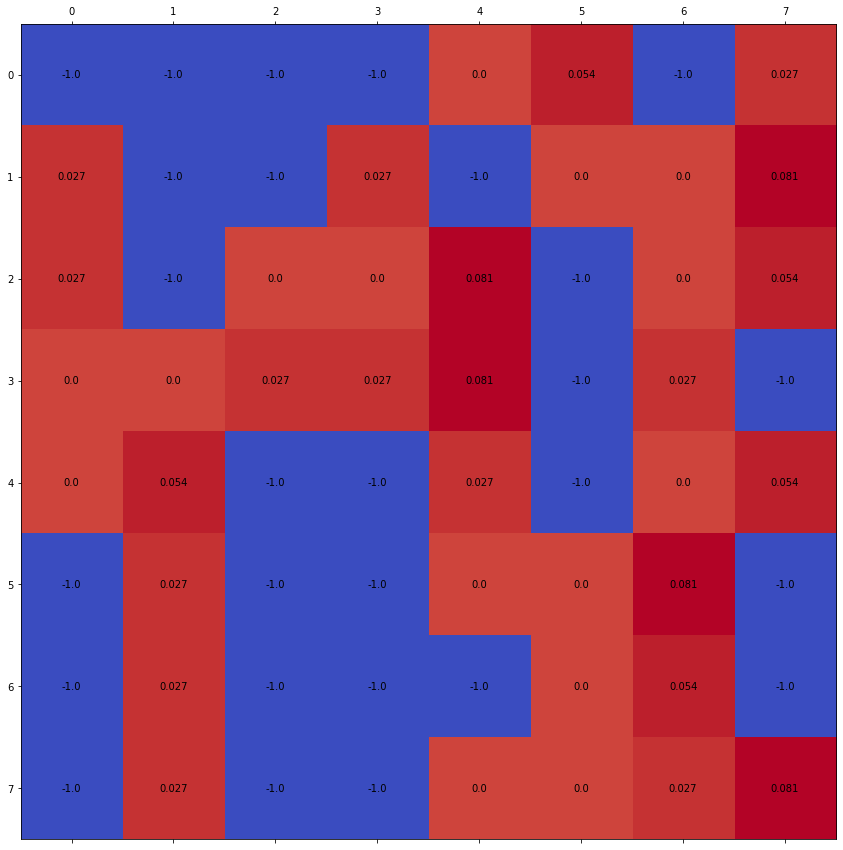

Number of zeros: 18
Action: DOWN Belief Sum: 0.9990000000000002 MSE: 0.8984871052631578


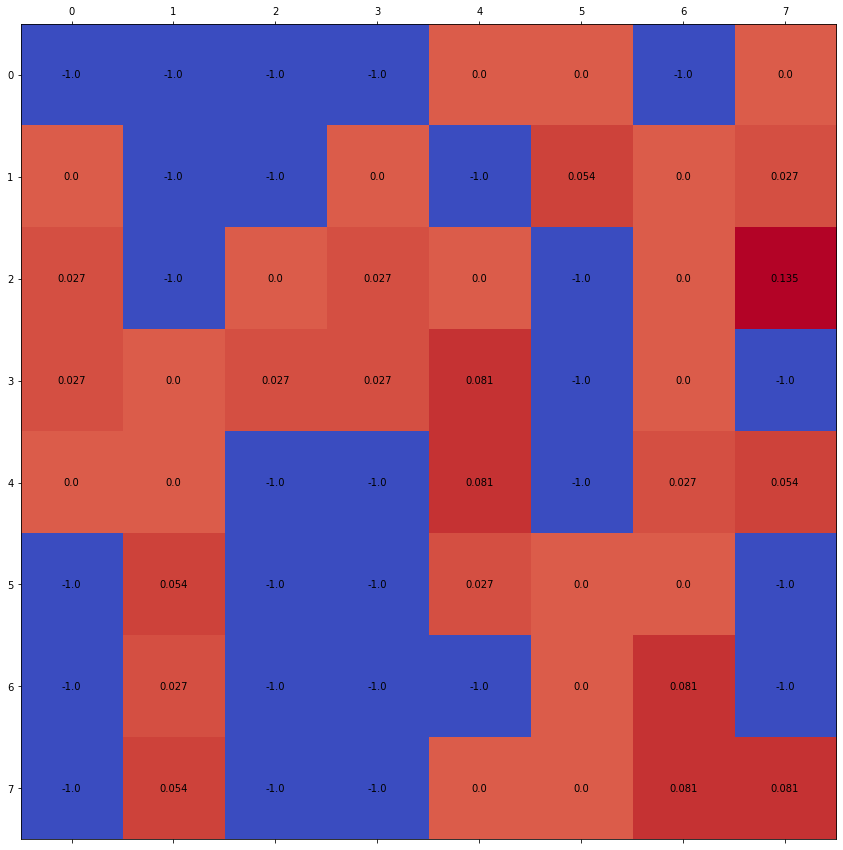

Number of zeros: 23
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.8643153571428572


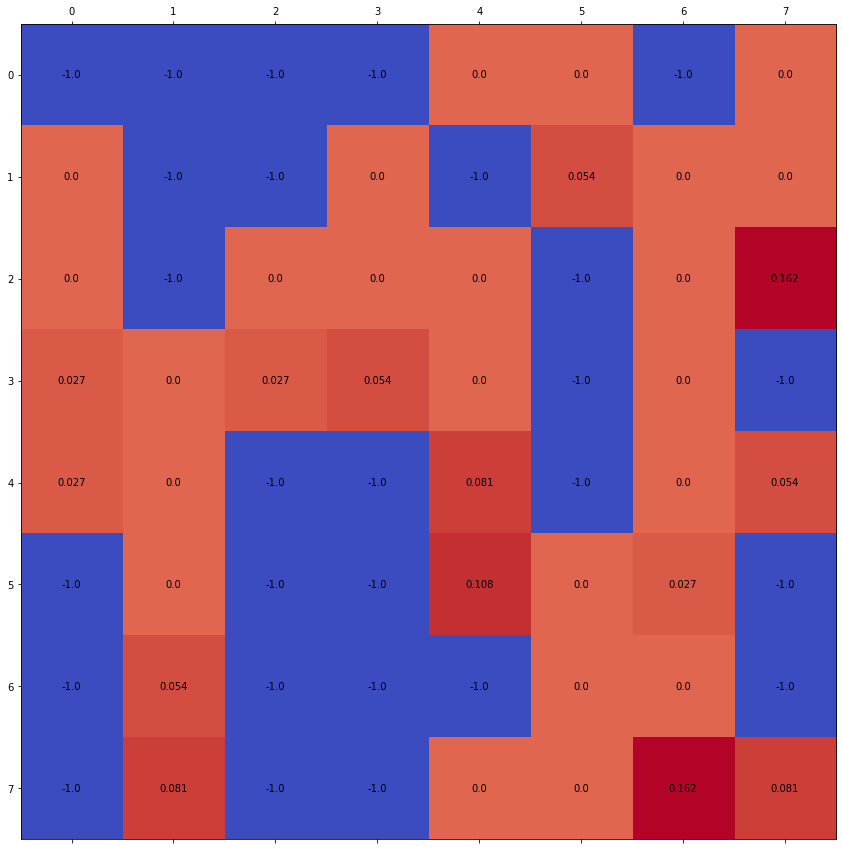

Number of zeros: 26
Action: DOWN Belief Sum: 0.999 MSE: 0.8298288181818182


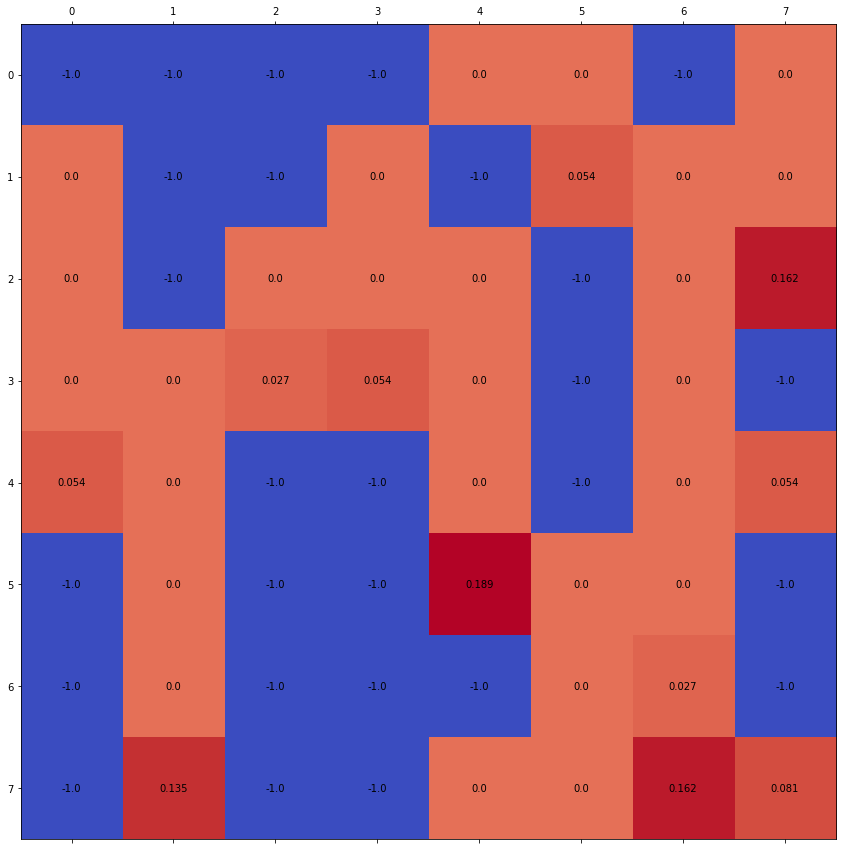

Number of zeros: 27
Action: DOWN Belief Sum: 0.9989999999999999 MSE: 0.8136864999999999


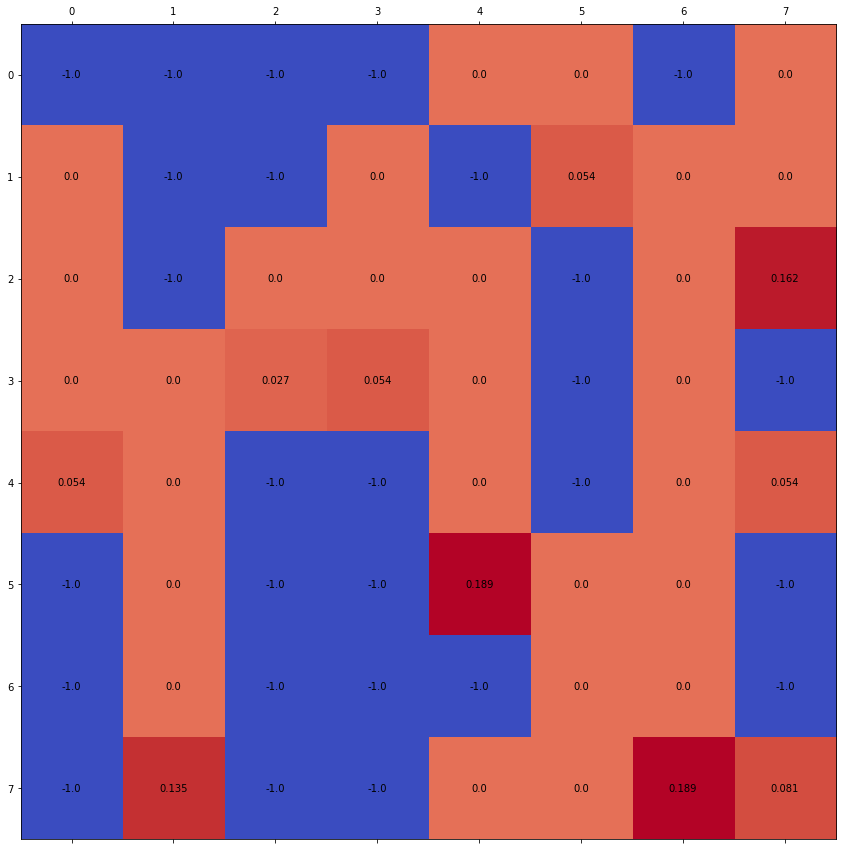

Number of zeros: 28
Action: RIGHT Belief Sum: 0.999 MSE: 0.7963869999999998


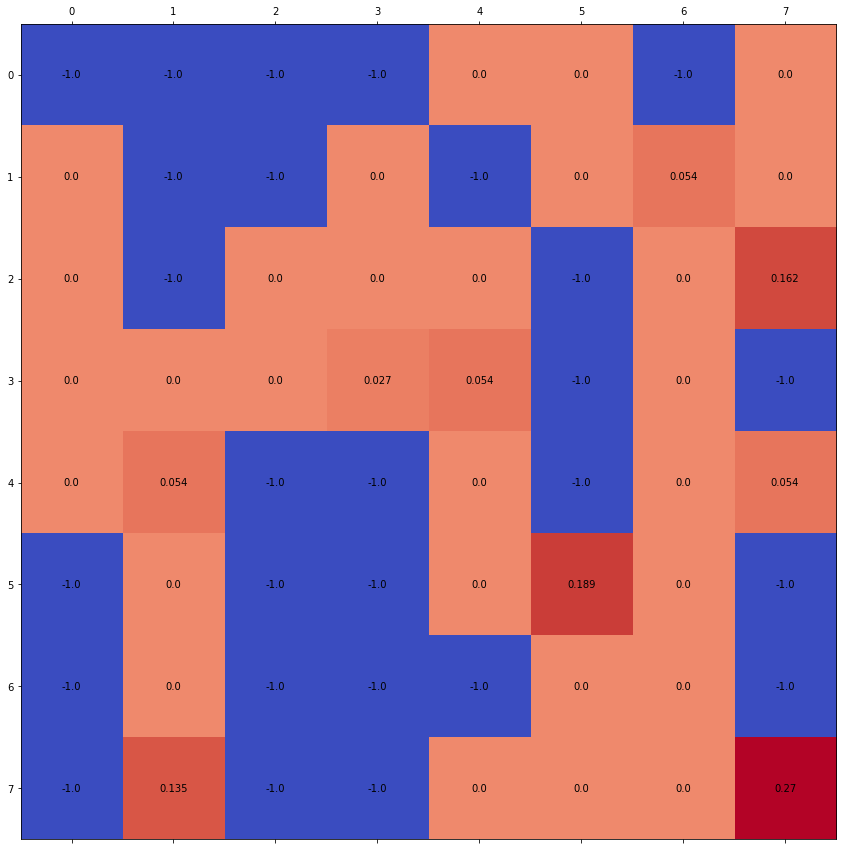

Number of zeros: 29
Action: RIGHT Belief Sum: 0.999 MSE: 0.7712998749999999


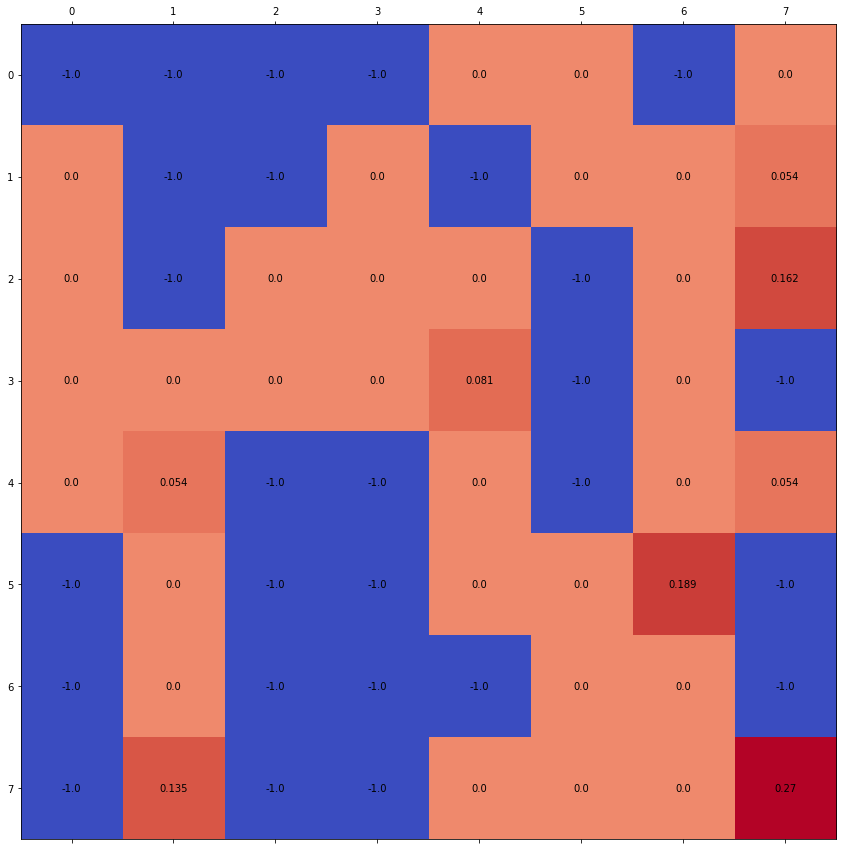

Number of zeros: 30
Action: DOWN Belief Sum: 0.999 MSE: 0.741127857142857


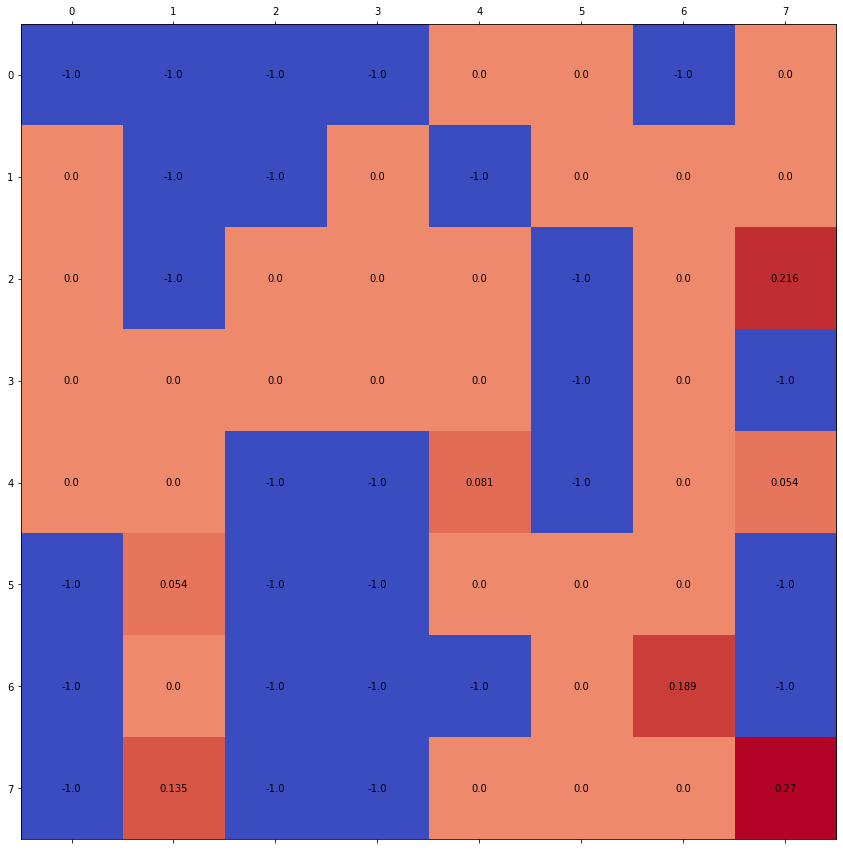

Number of zeros: 30
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.741127857142857


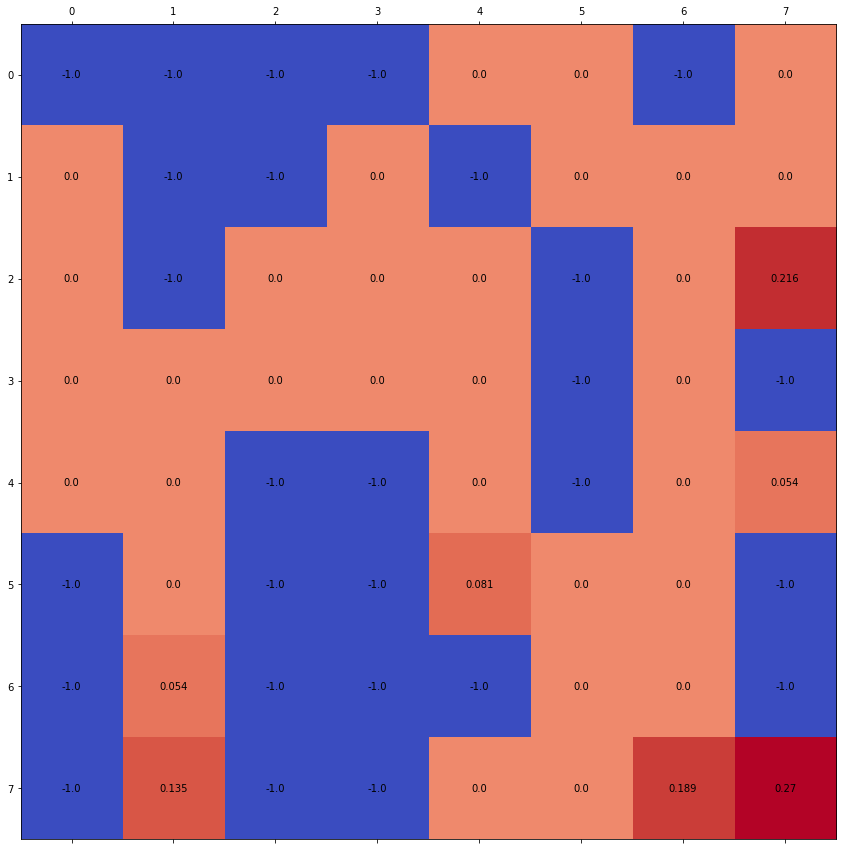

Number of zeros: 31
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.7004125


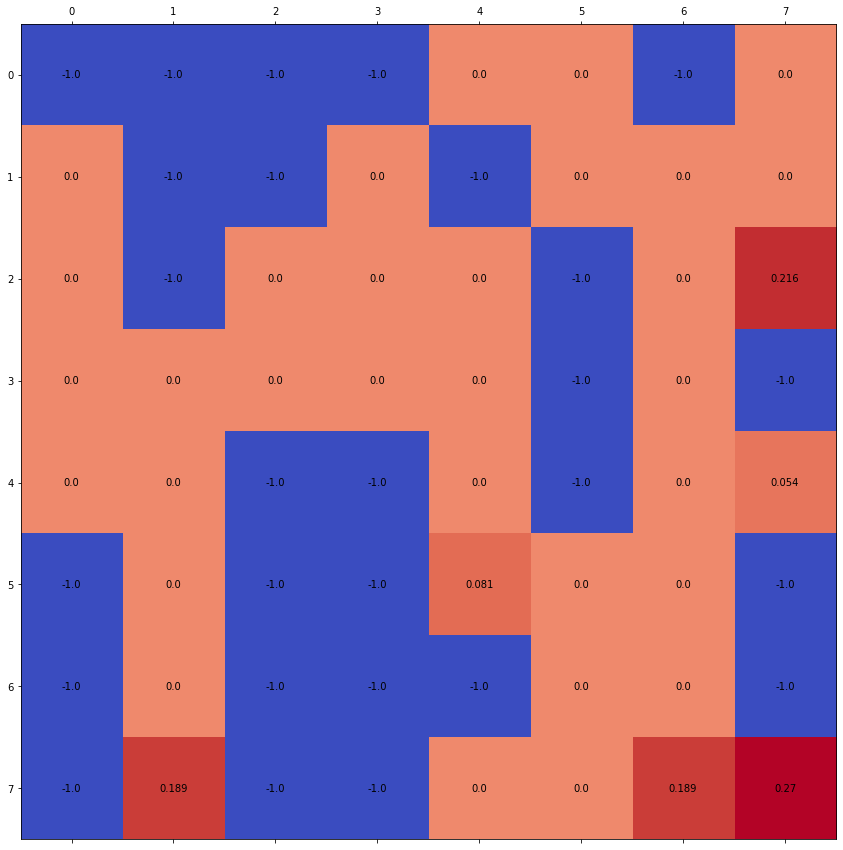

Number of zeros: 32
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.660907


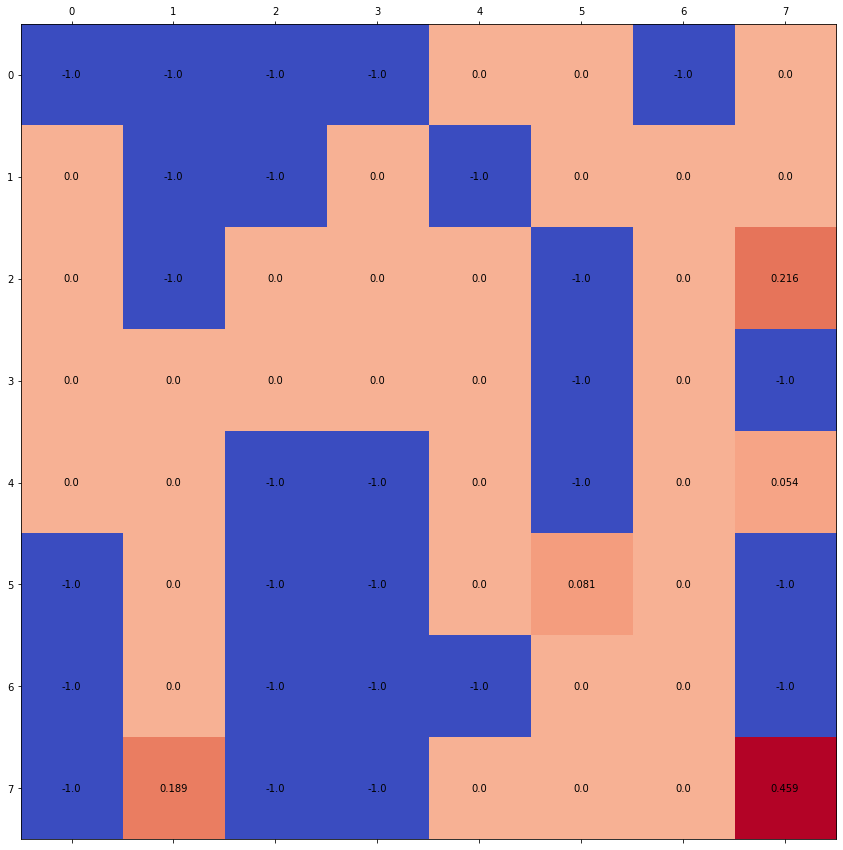

Number of zeros: 32
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.660907


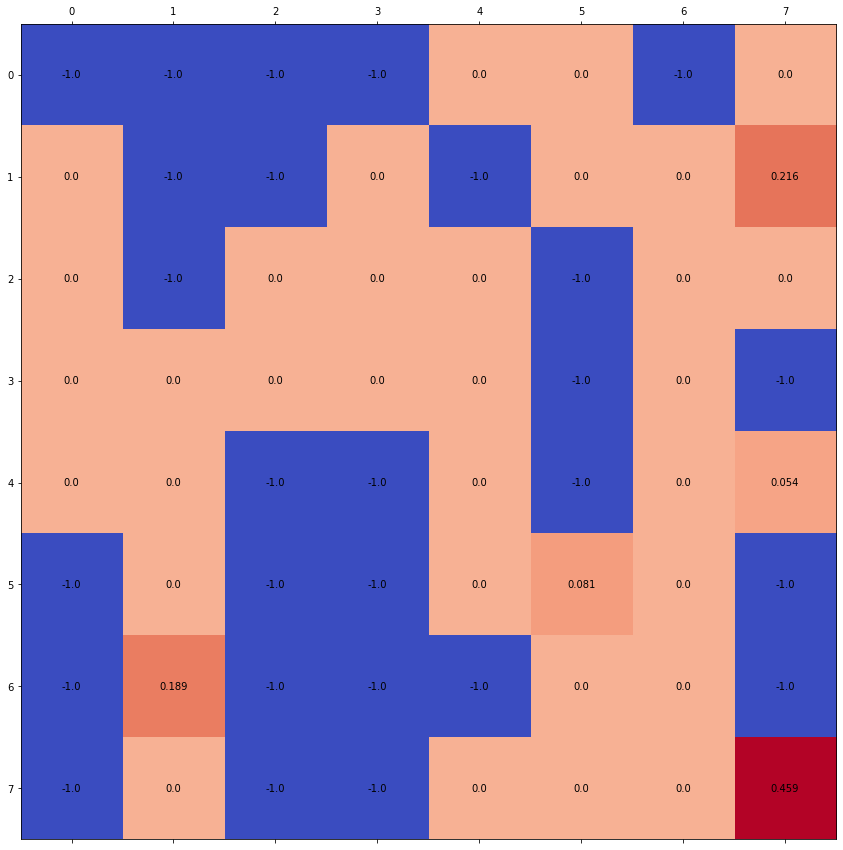

Number of zeros: 32
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.660907


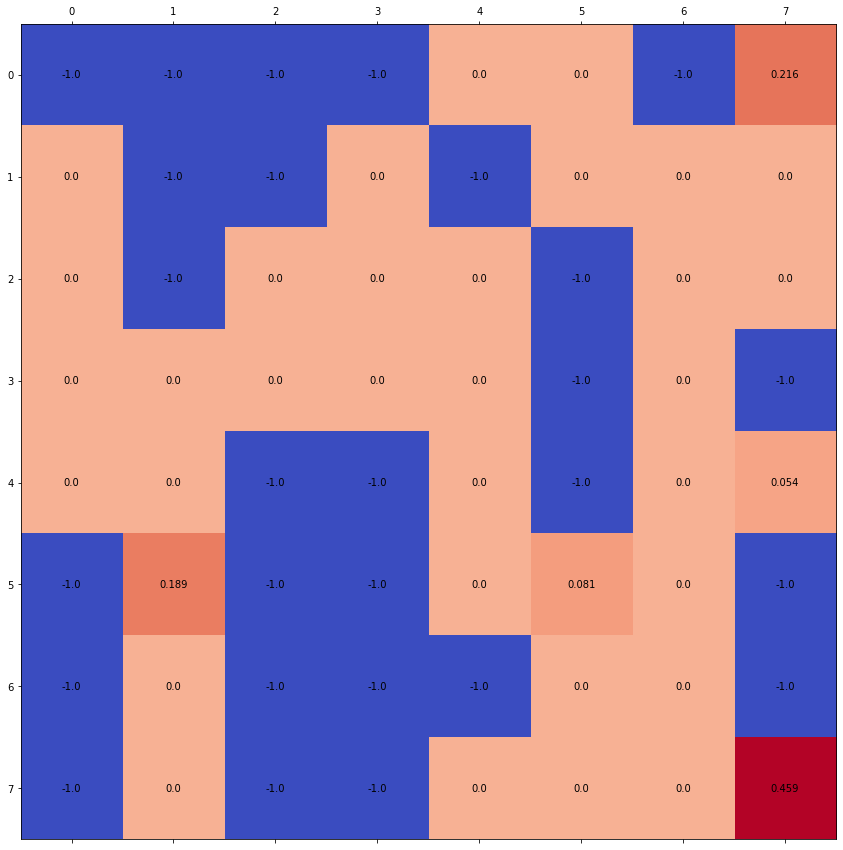

Number of zeros: 32
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.660907


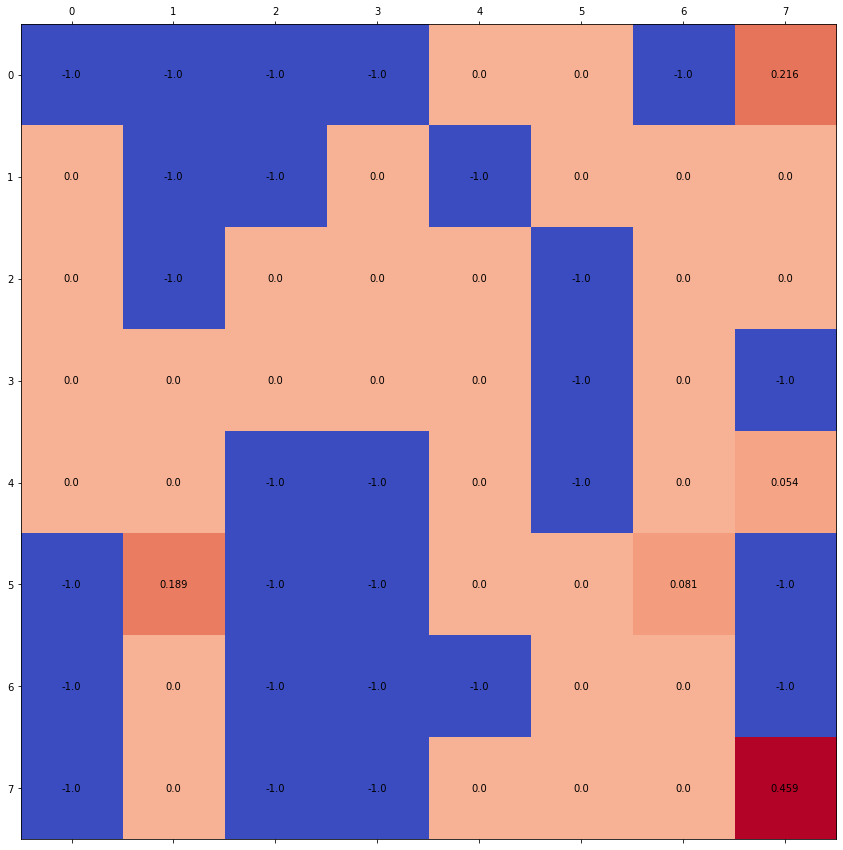

Number of zeros: 32
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.660907


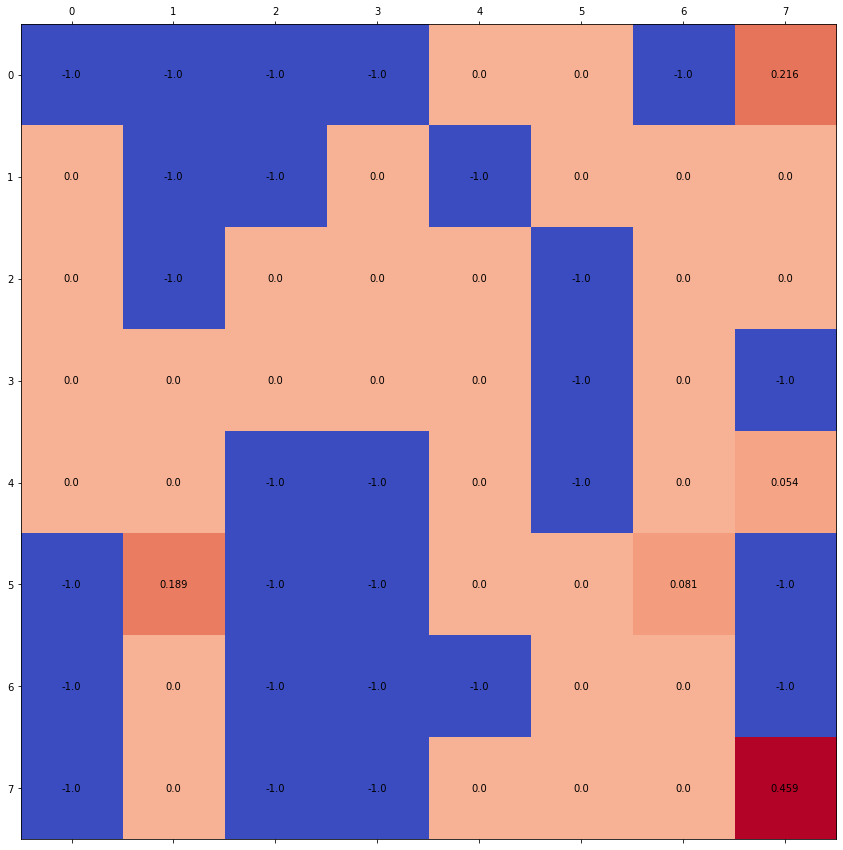

Number of zeros: 32
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.660907


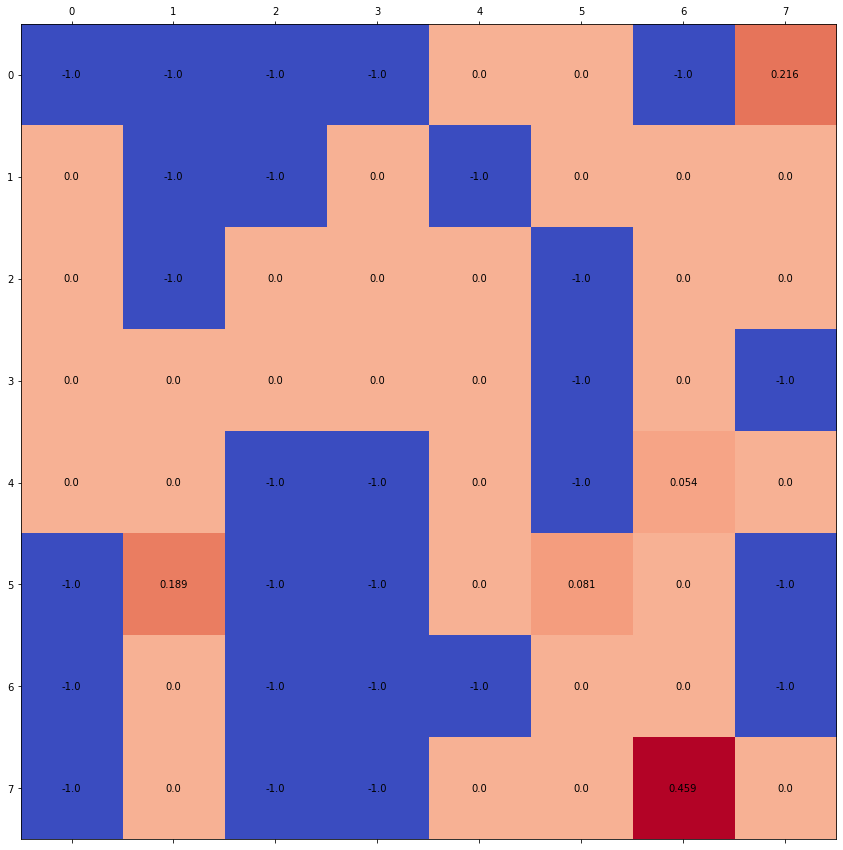

Number of zeros: 32
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.660907


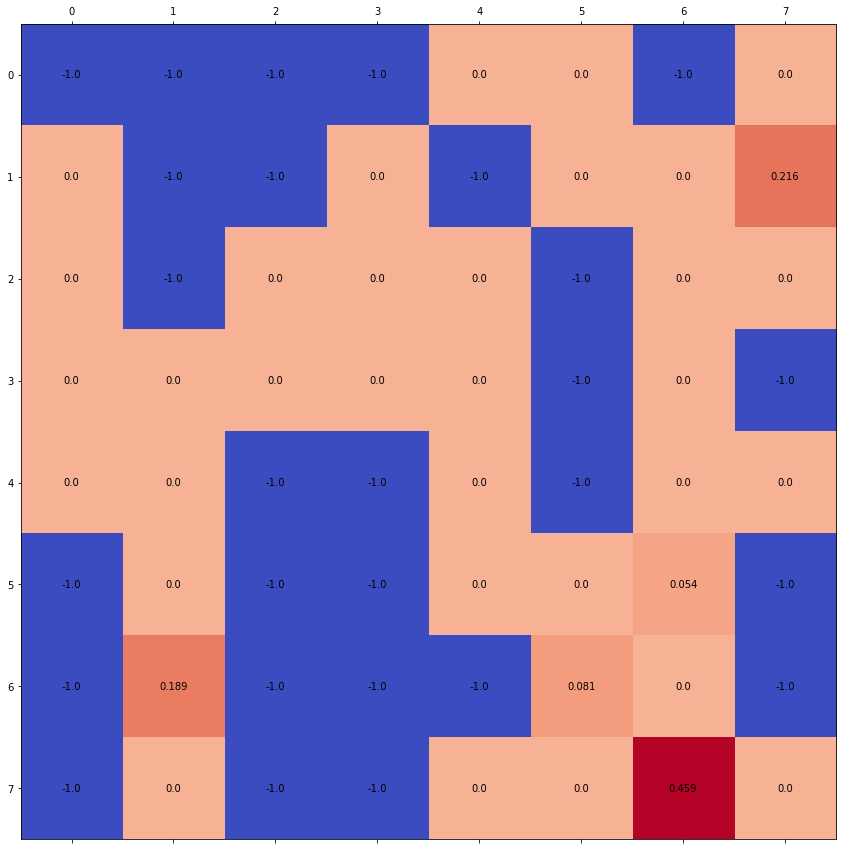

Number of zeros: 32
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.660907


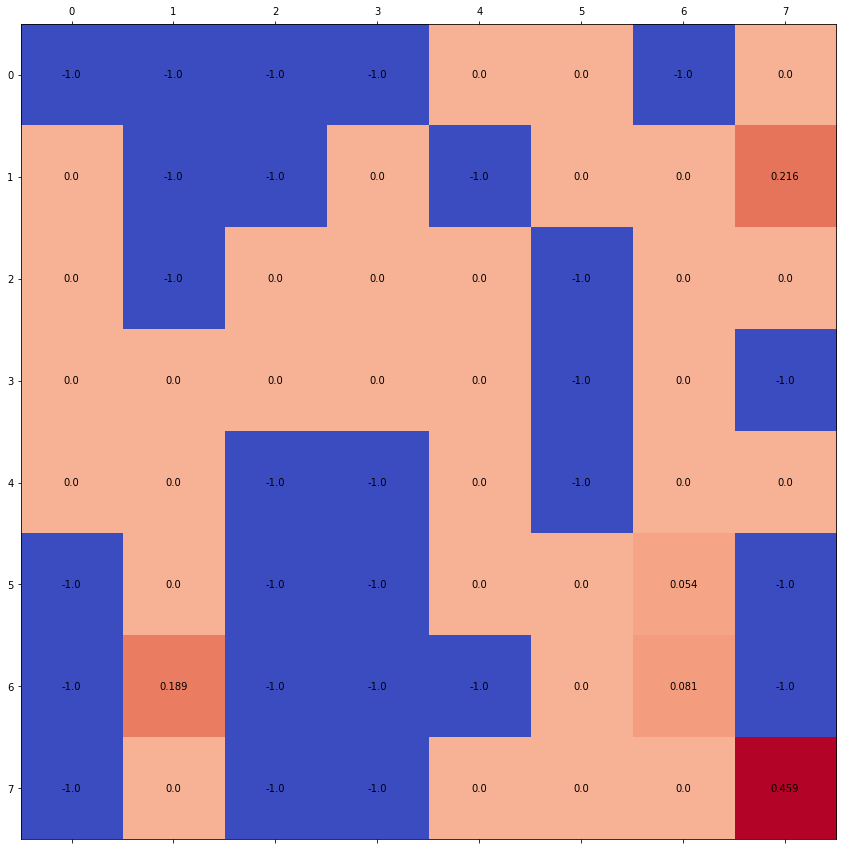

Number of zeros: 32
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.660907


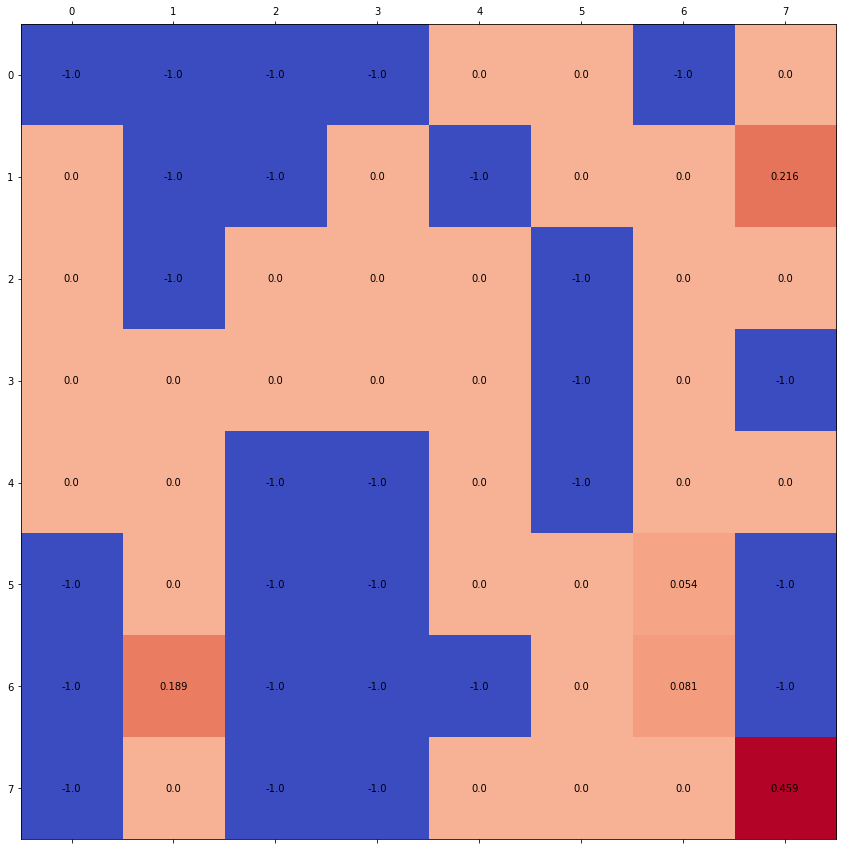

Number of zeros: 32
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.660907


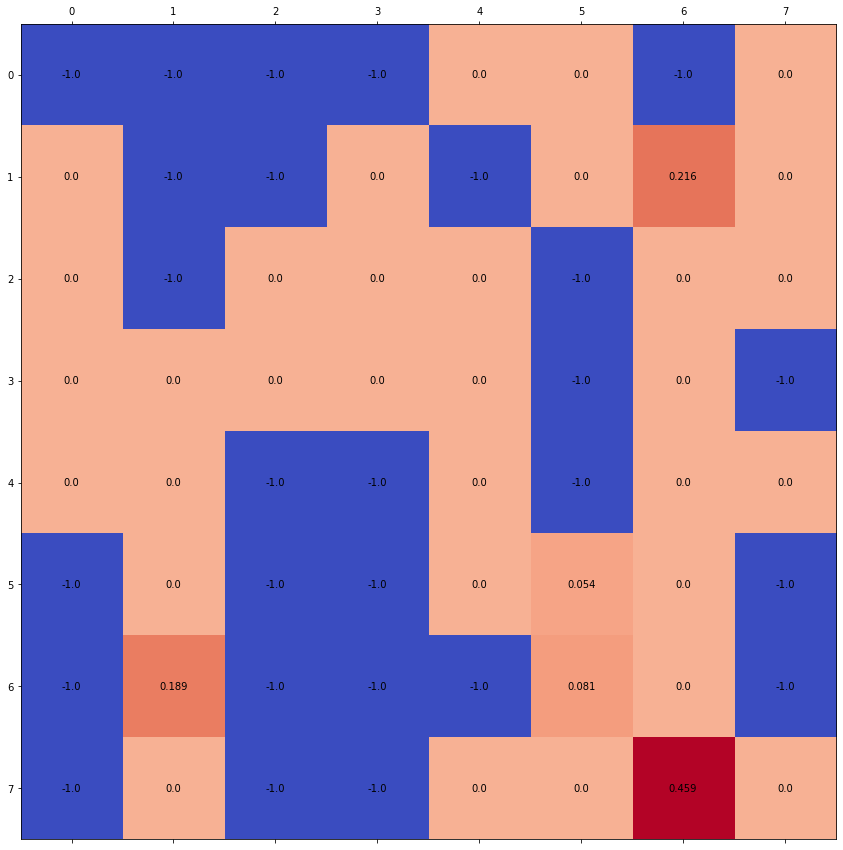

Number of zeros: 33
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.57832075


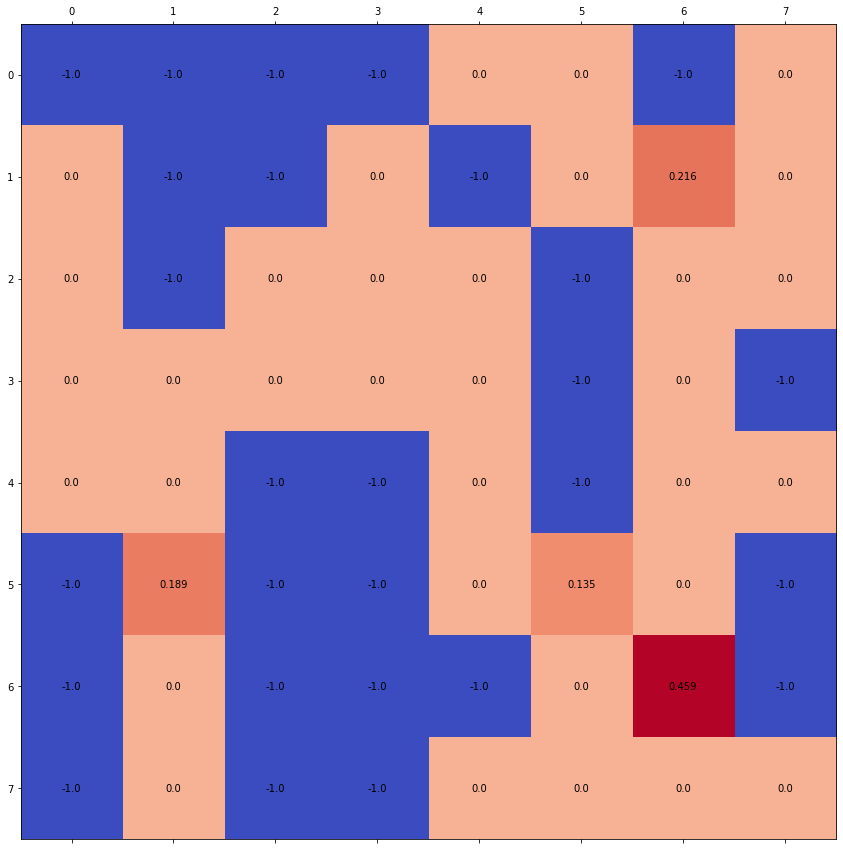

Number of zeros: 33
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.57832075


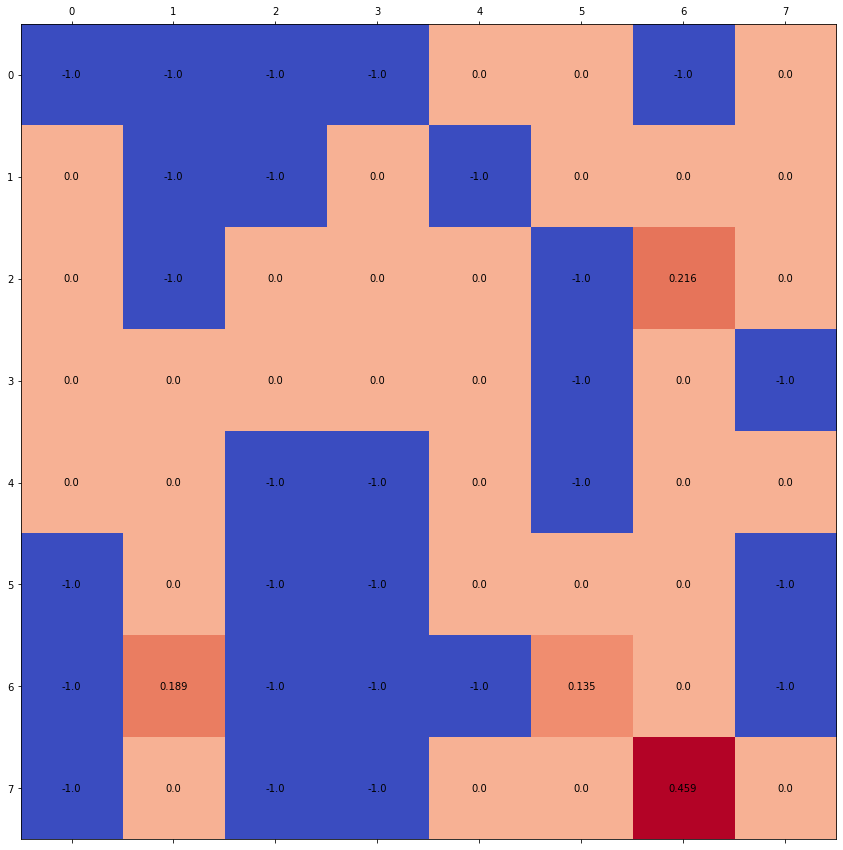

Number of zeros: 33
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.57832075


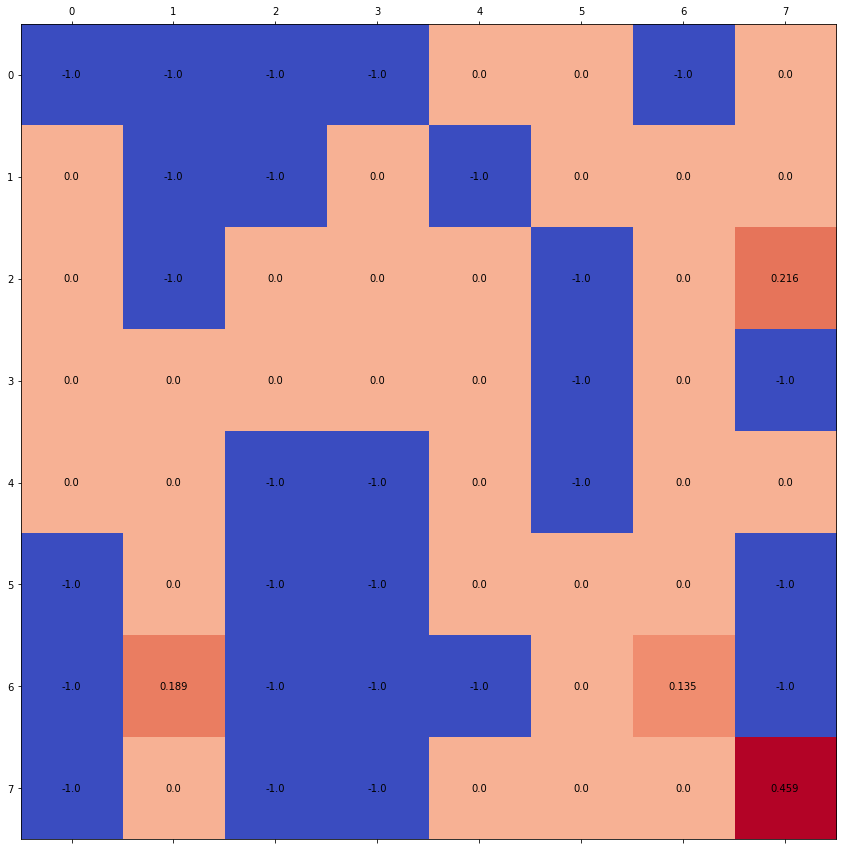

Number of zeros: 33
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.57832075


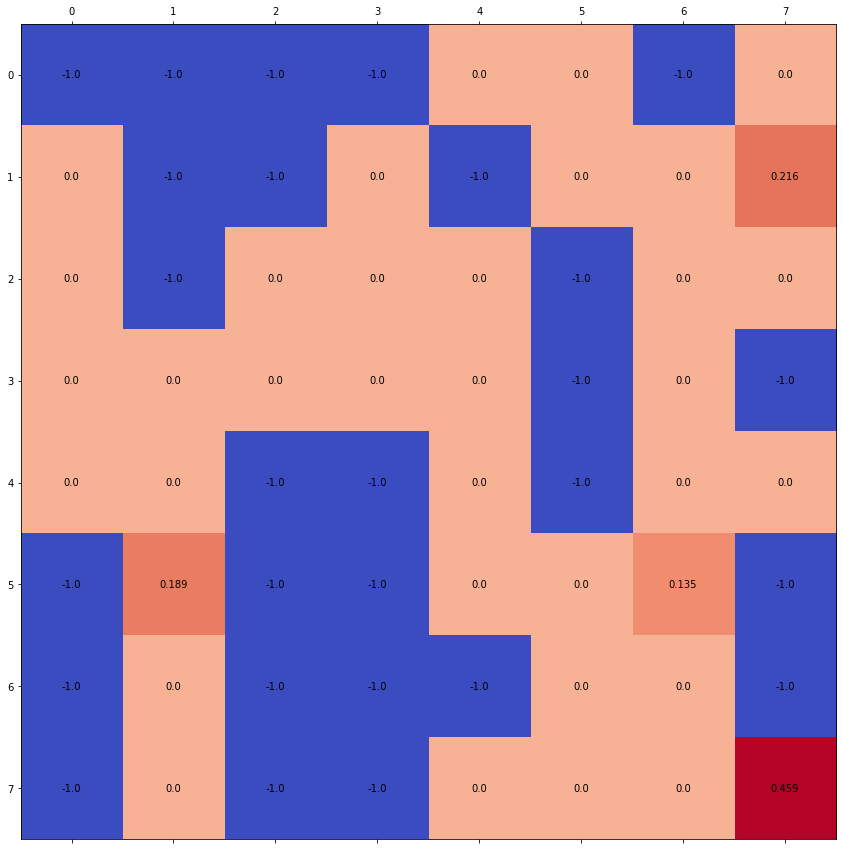

Number of zeros: 33
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.57832075


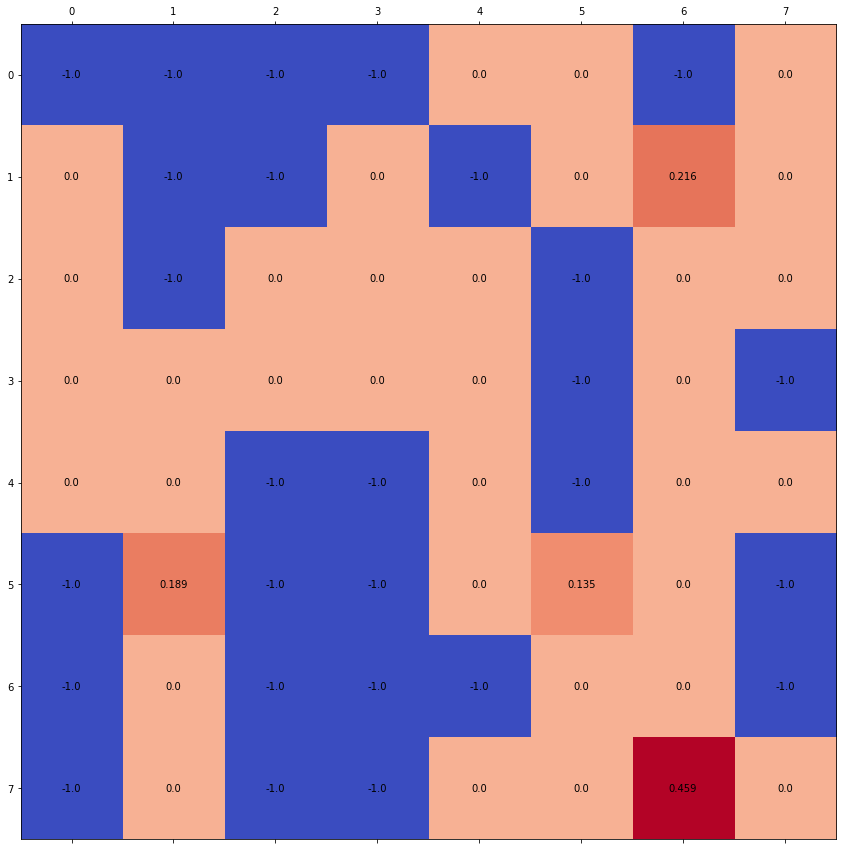

Number of zeros: 33
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.57832075


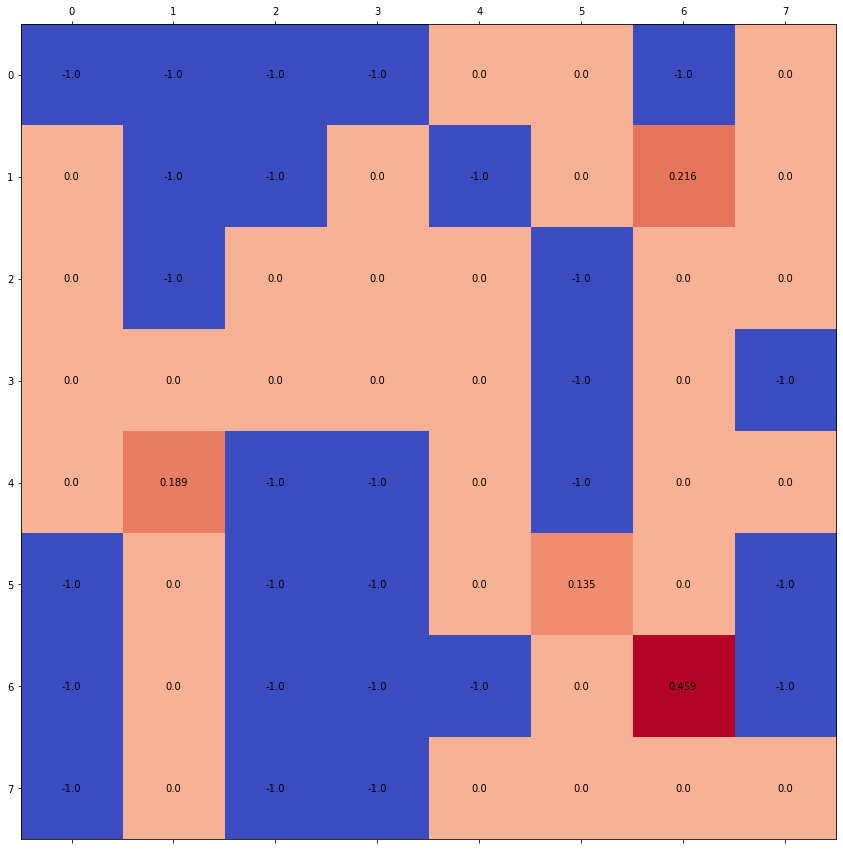

Number of zeros: 33
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.57832075


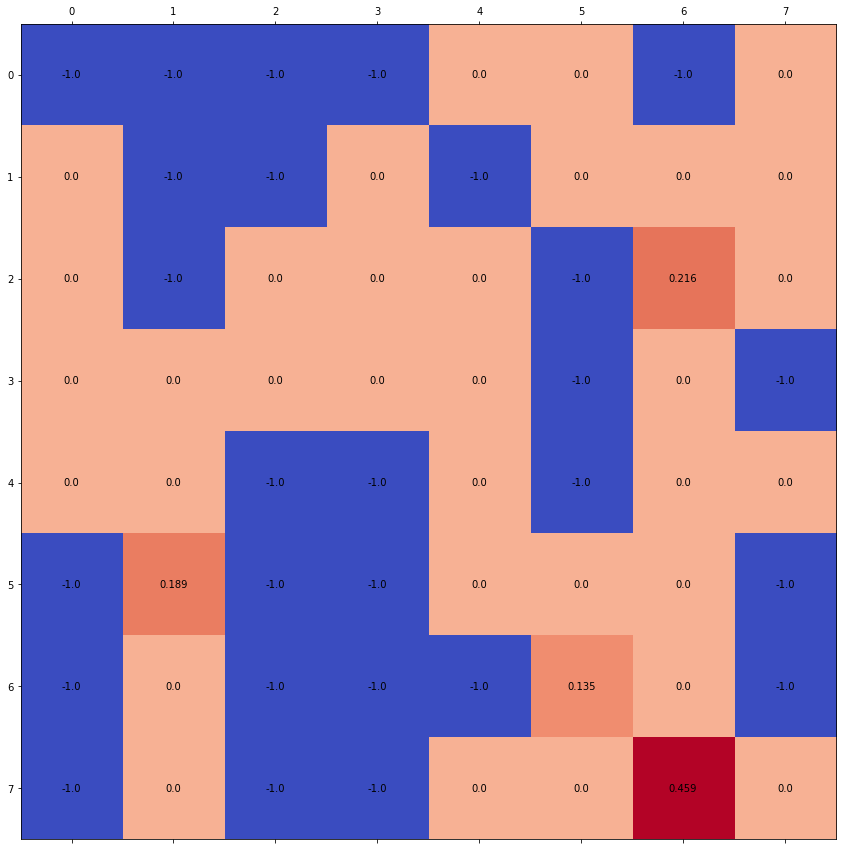

Number of zeros: 33
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.57832075


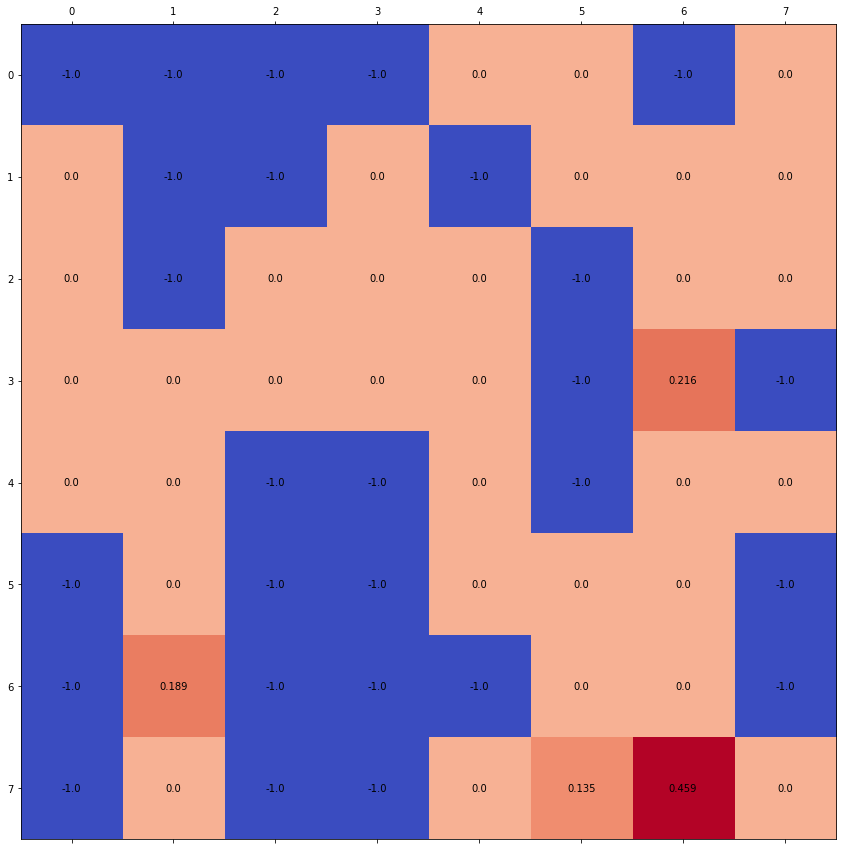

Number of zeros: 33
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.57832075


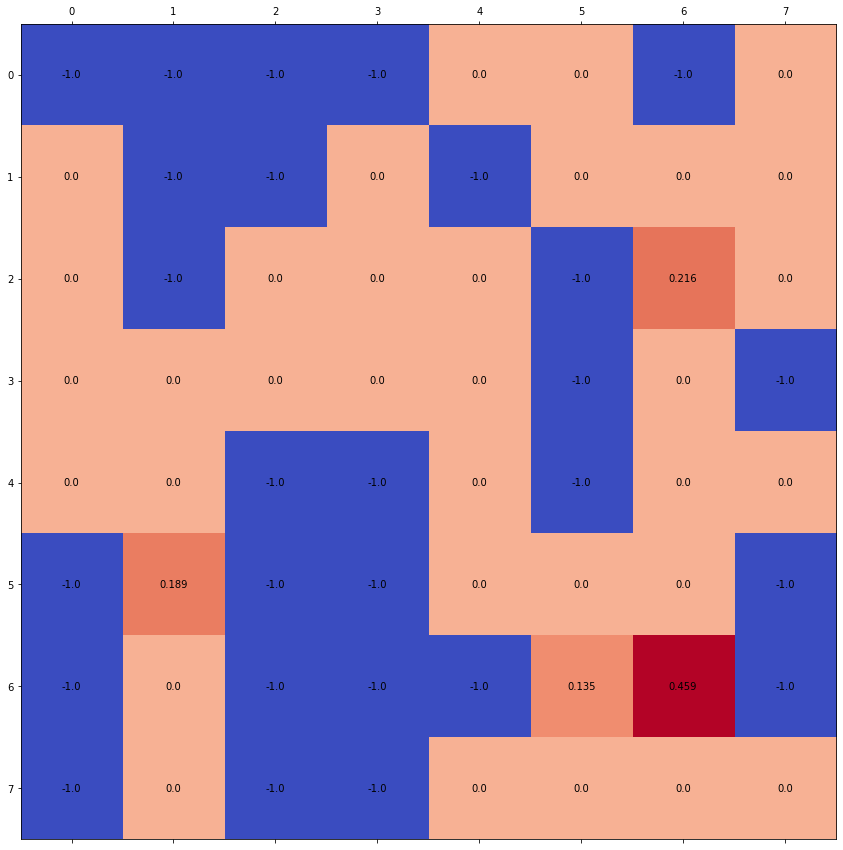

Number of zeros: 34
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.479071


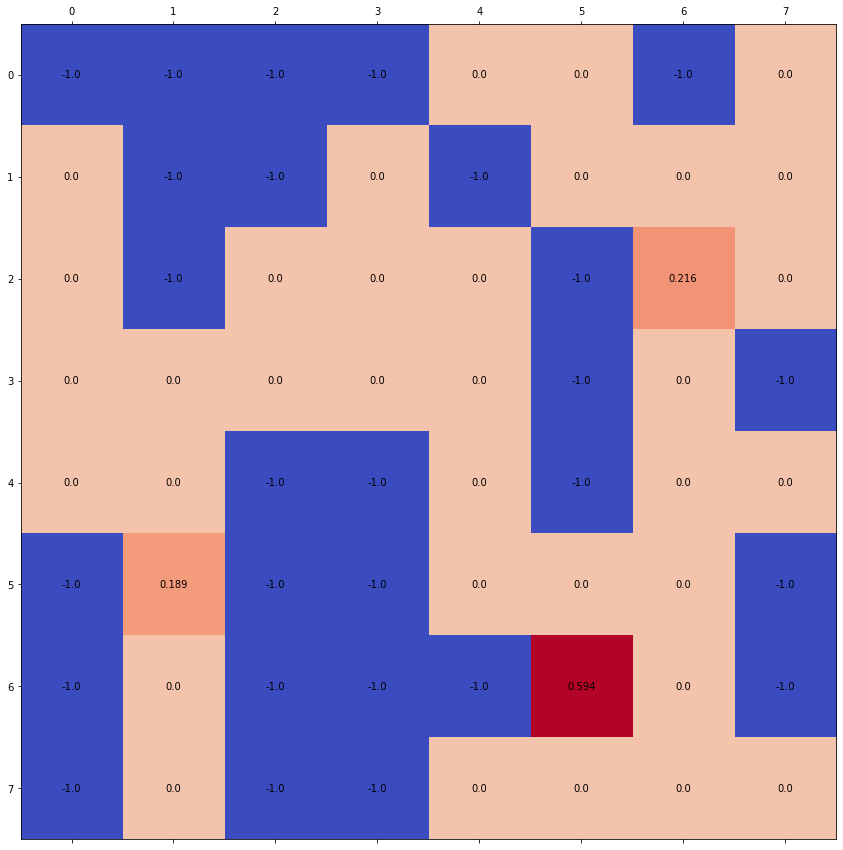

Number of zeros: 34
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.479071


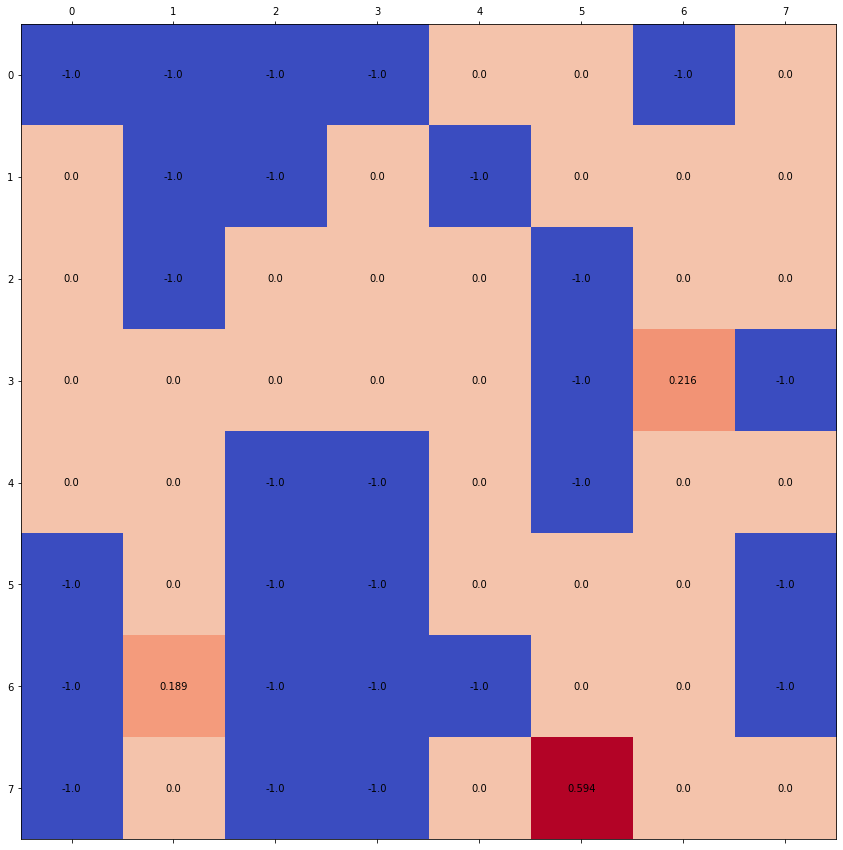

Number of zeros: 34
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.479071


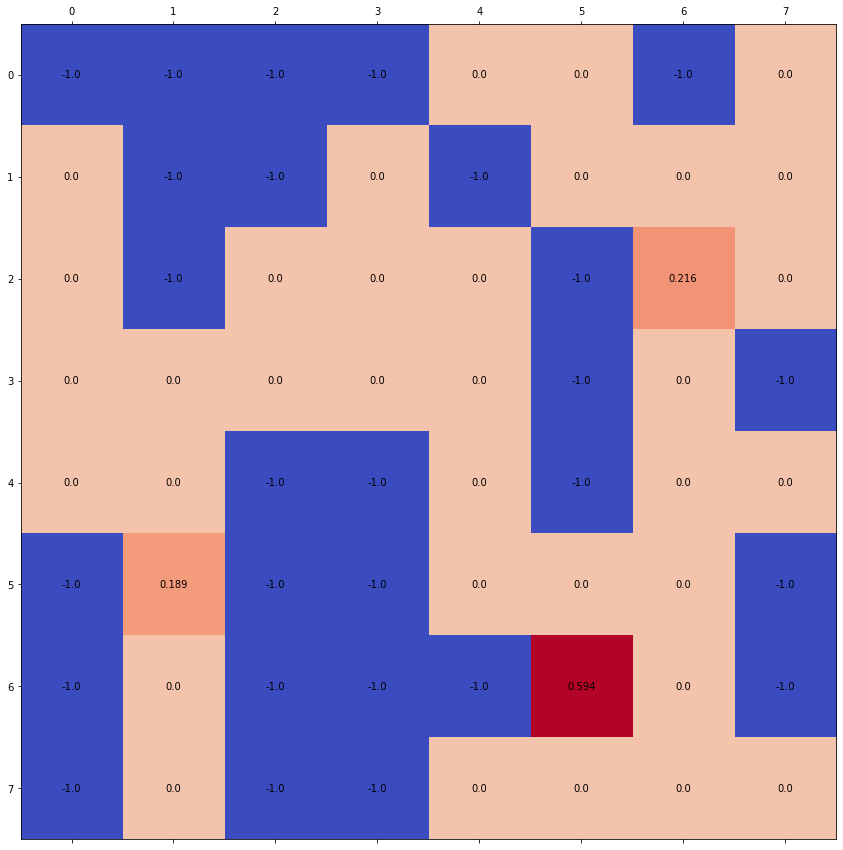

Number of zeros: 34
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.479071


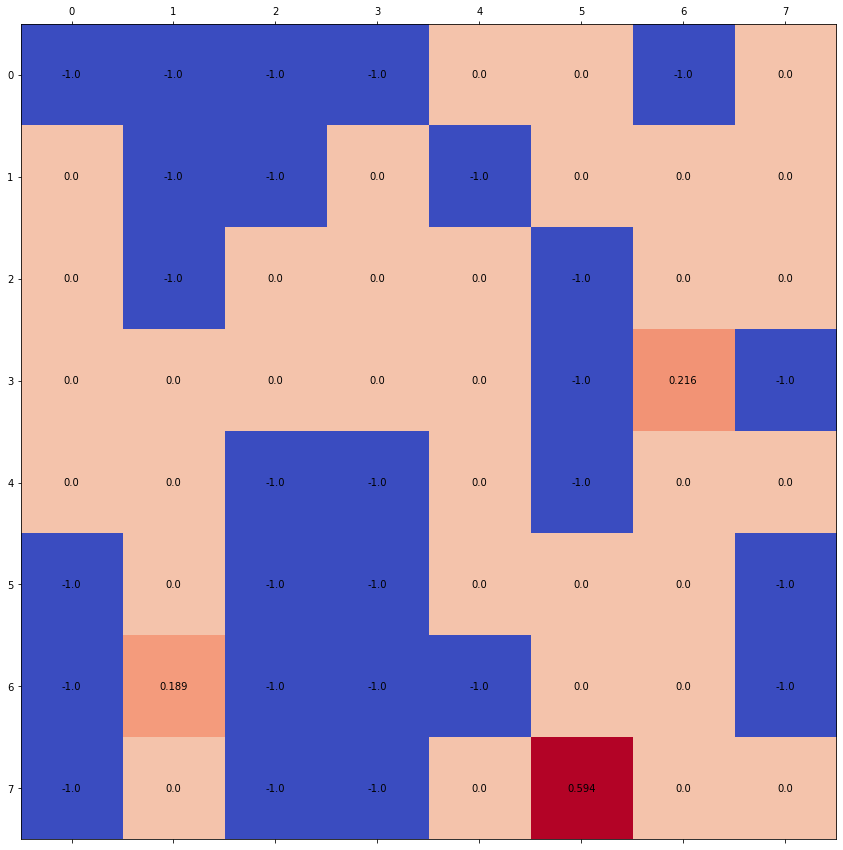

Number of zeros: 34
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.479071


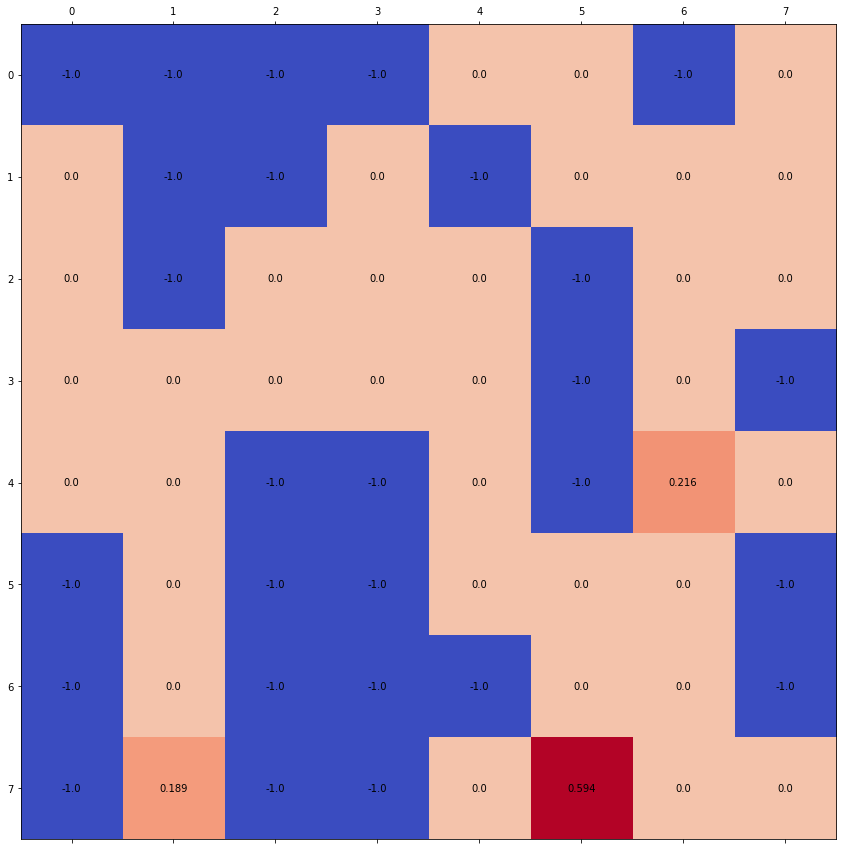

Number of zeros: 34
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.479071


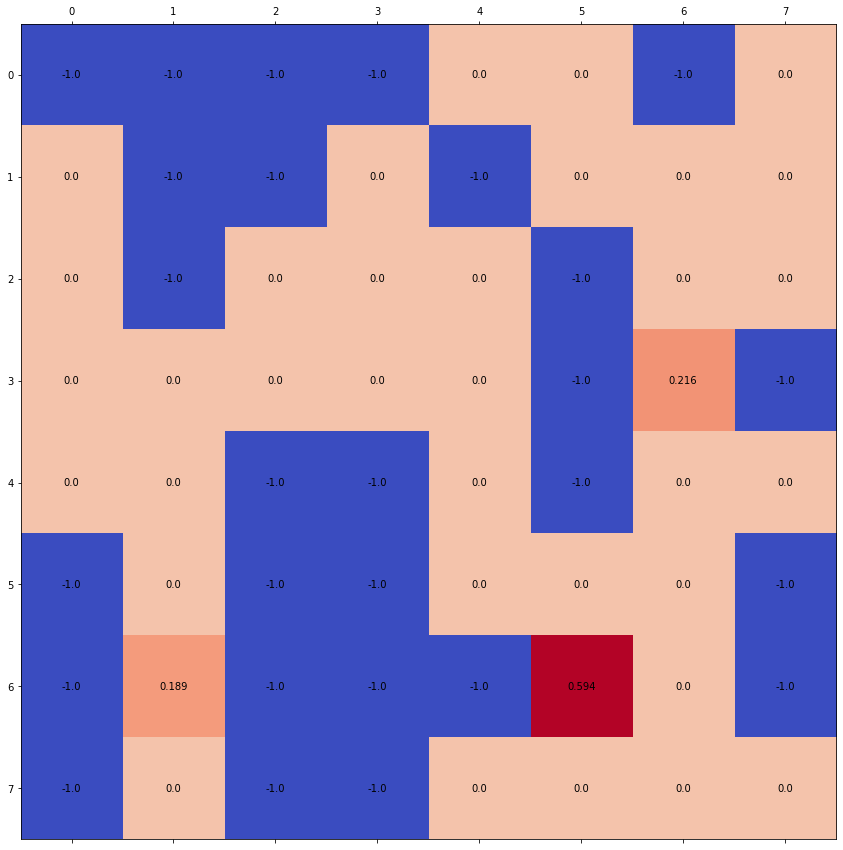

Number of zeros: 34
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.479071


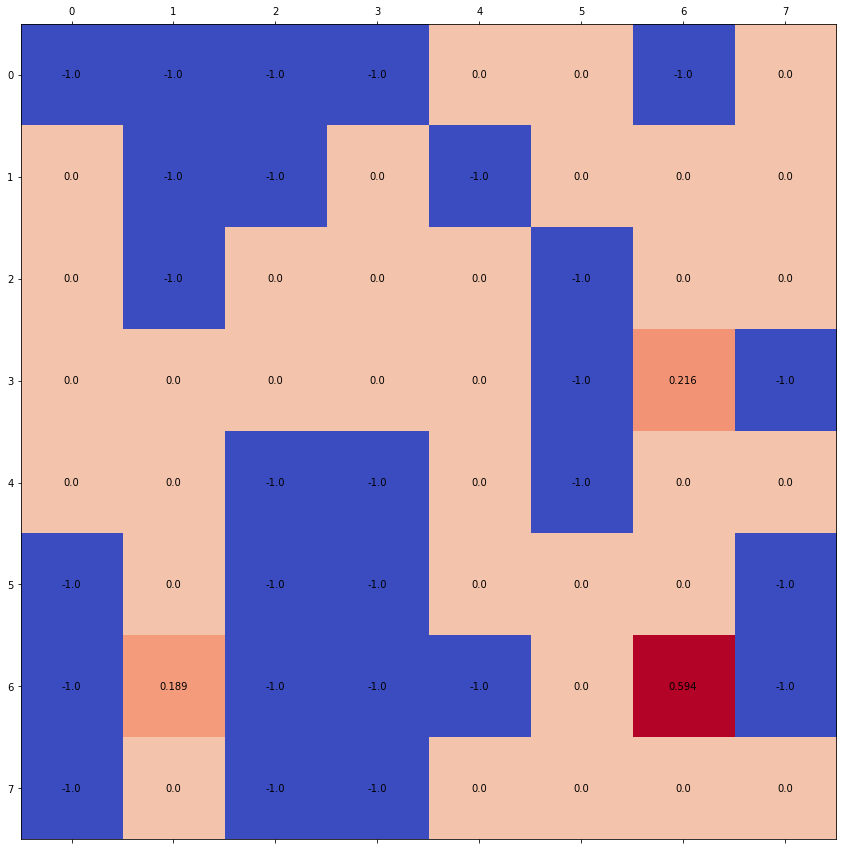

Number of zeros: 34
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.479071


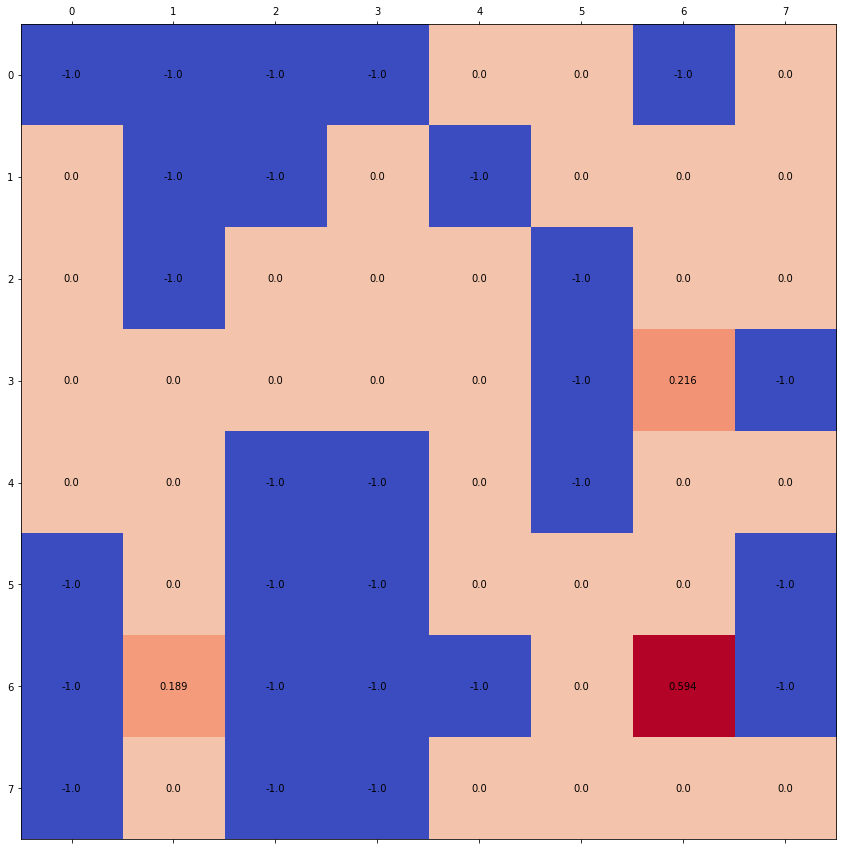

Number of zeros: 34
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.479071


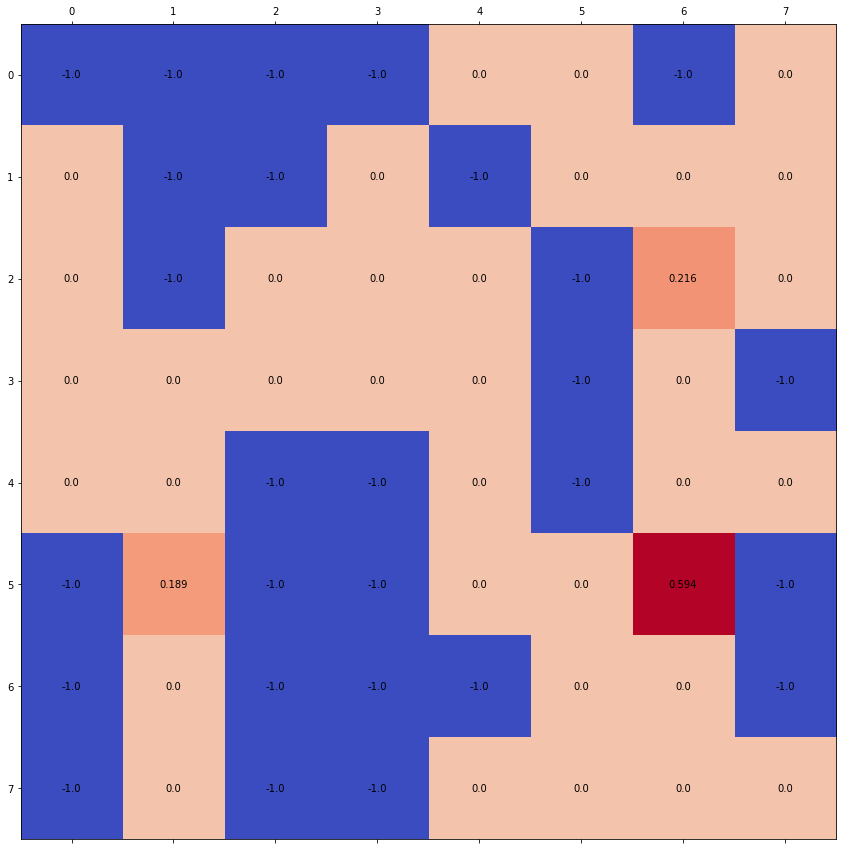

Number of zeros: 34
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.479071


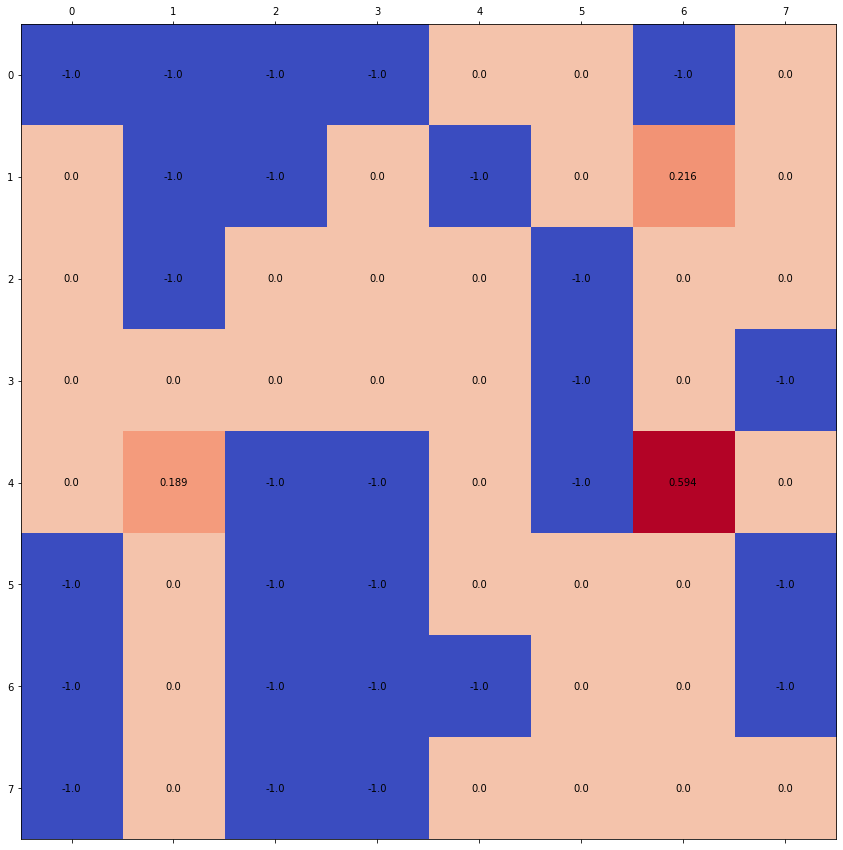

Number of zeros: 34
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.479071


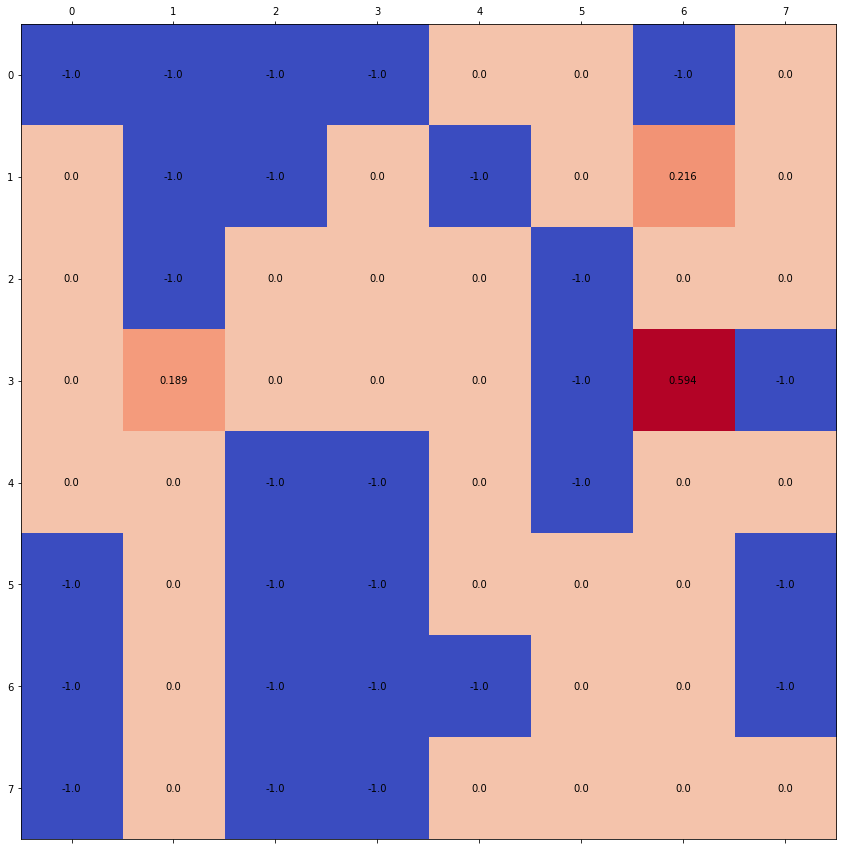

Number of zeros: 34
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.479071


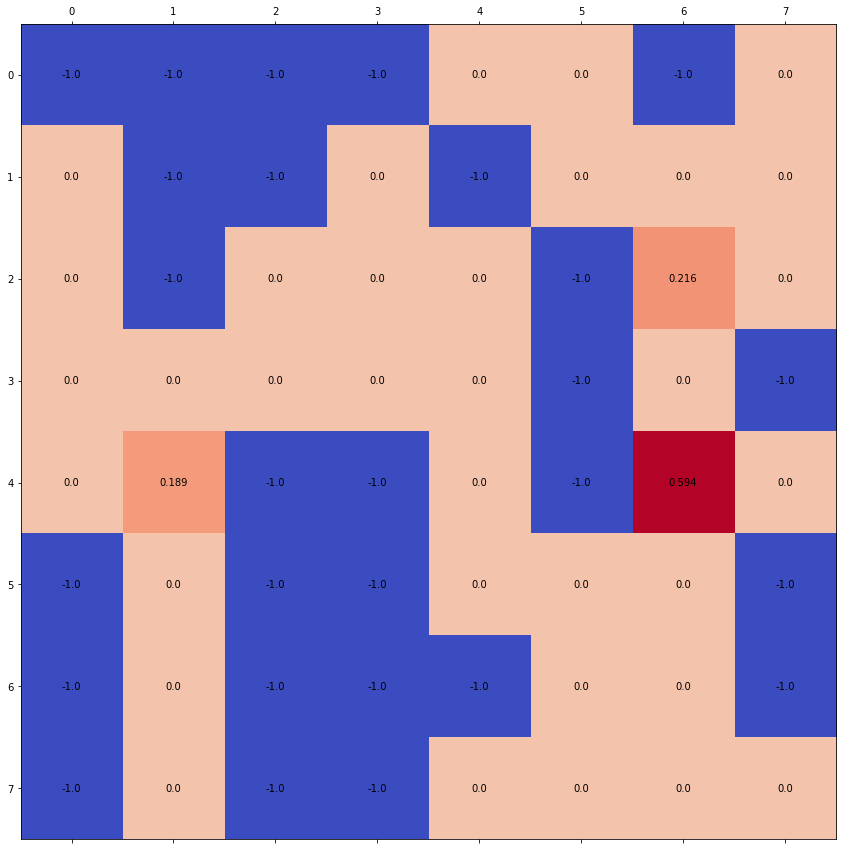

Number of zeros: 34
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.479071


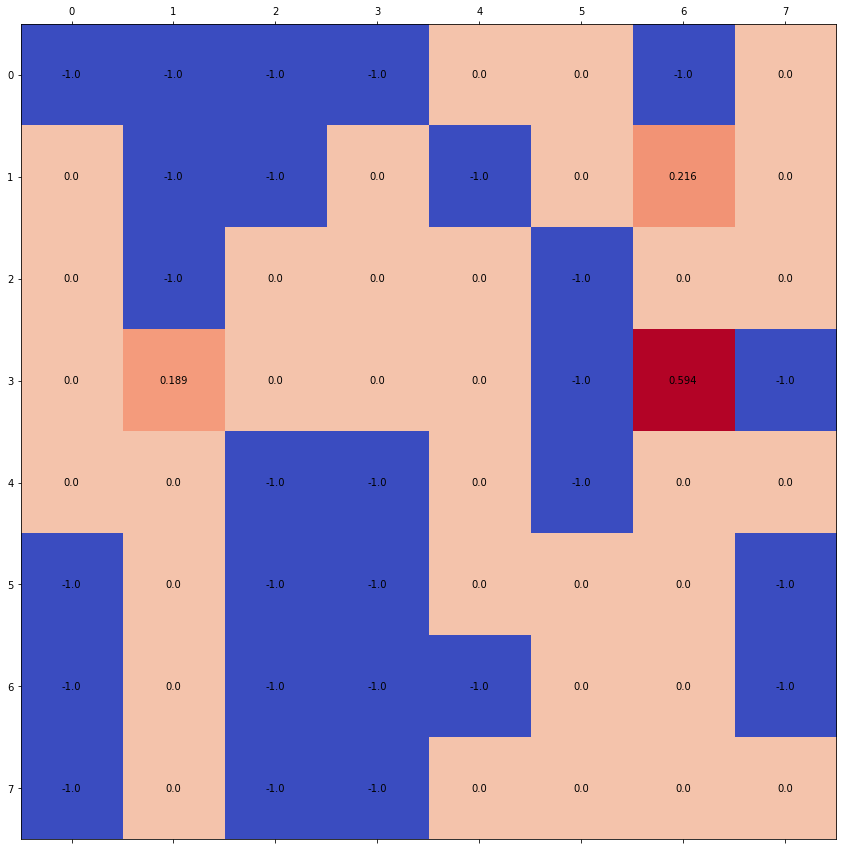

Number of zeros: 34
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.47907099999999997


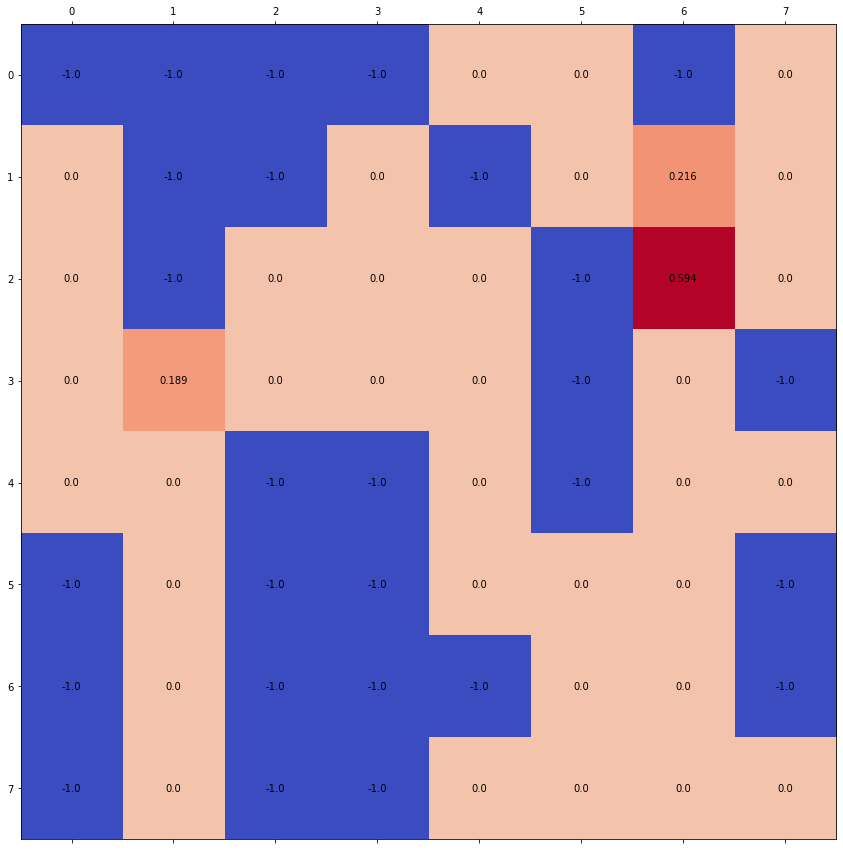

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


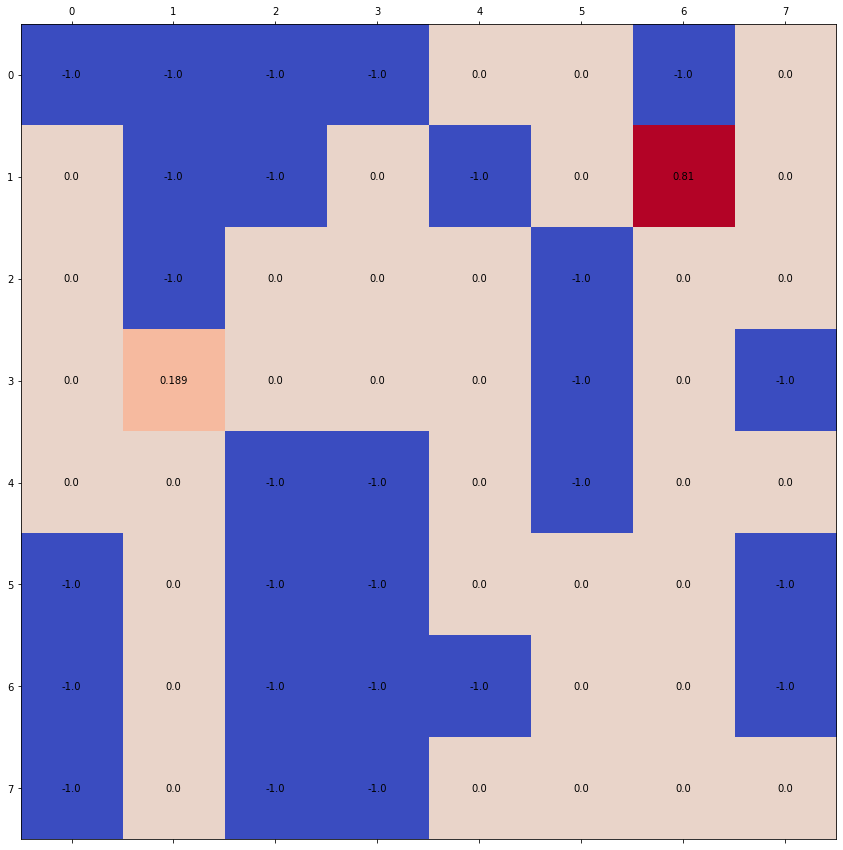

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


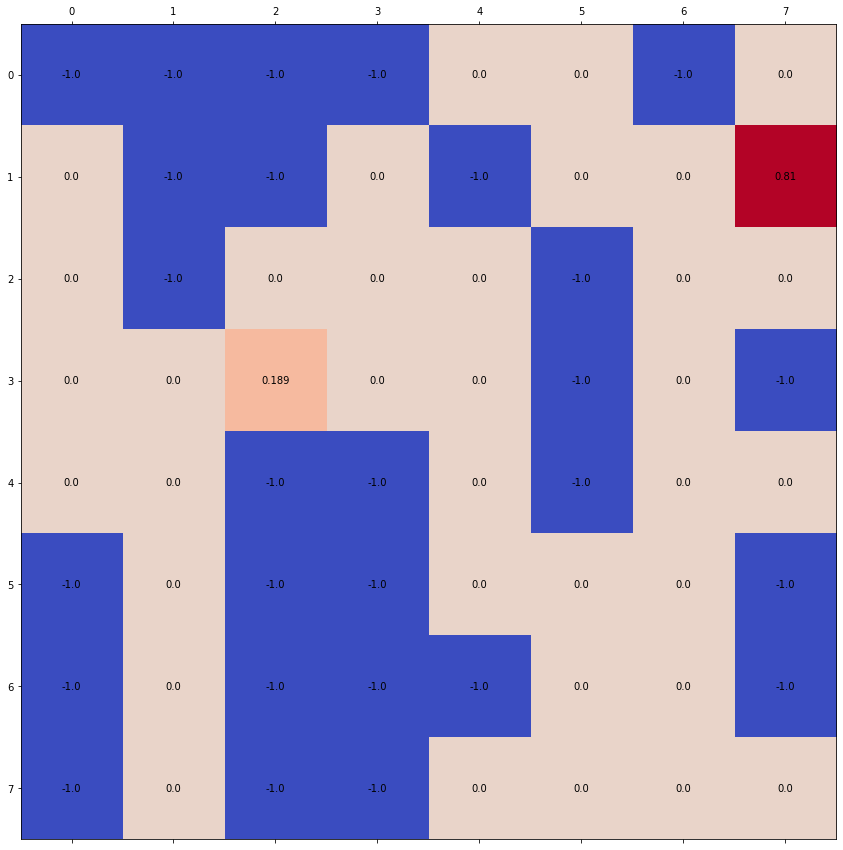

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


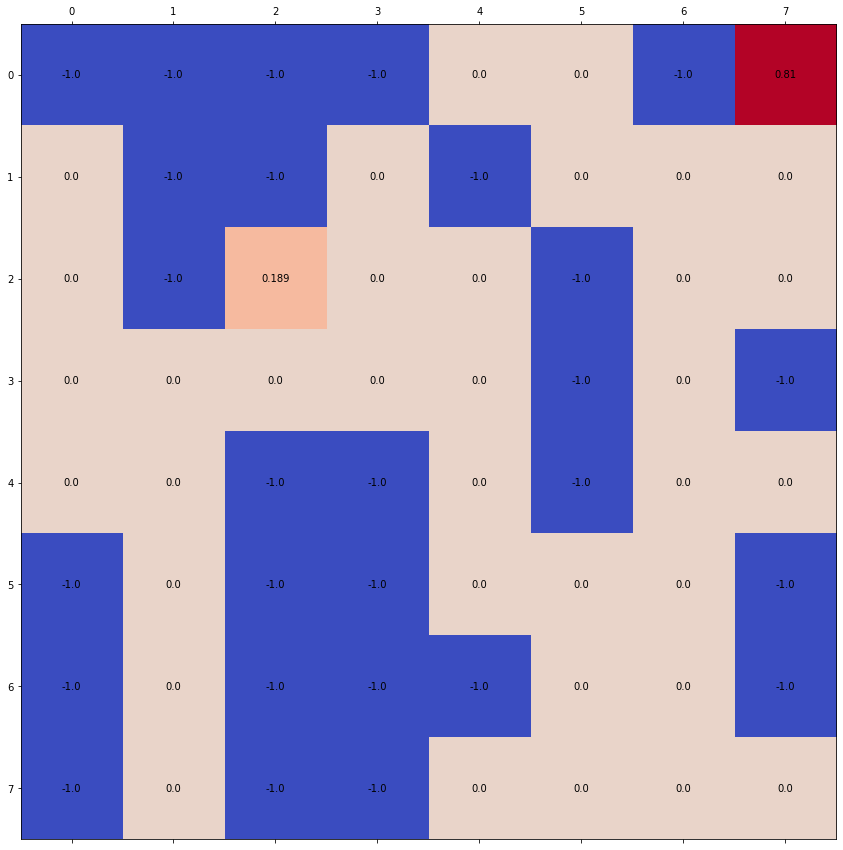

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


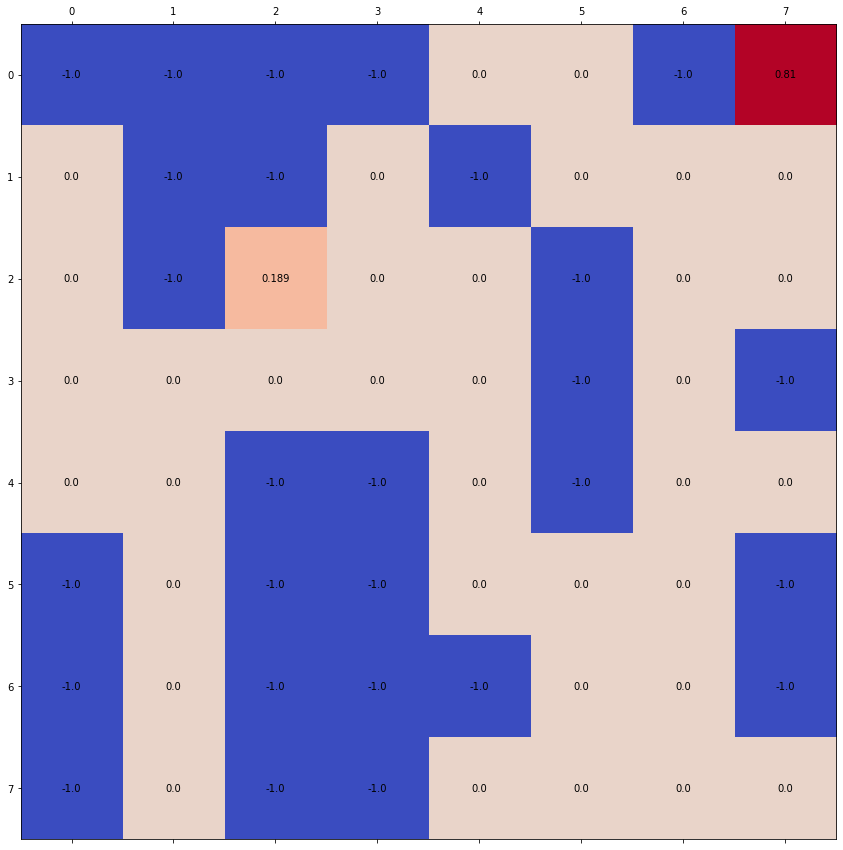

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


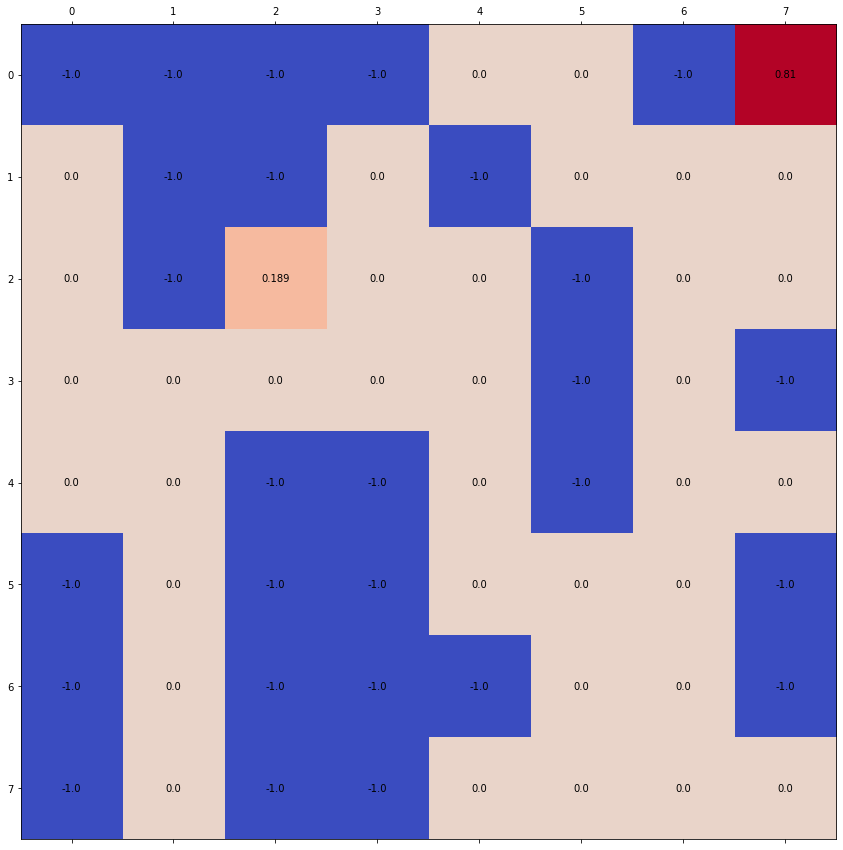

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


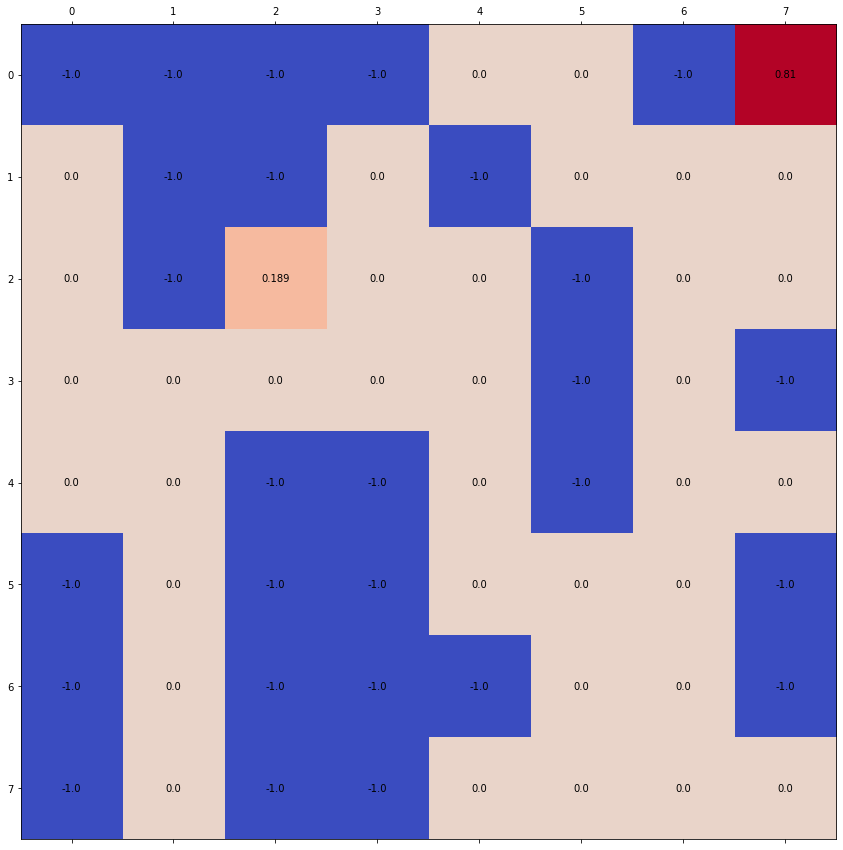

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


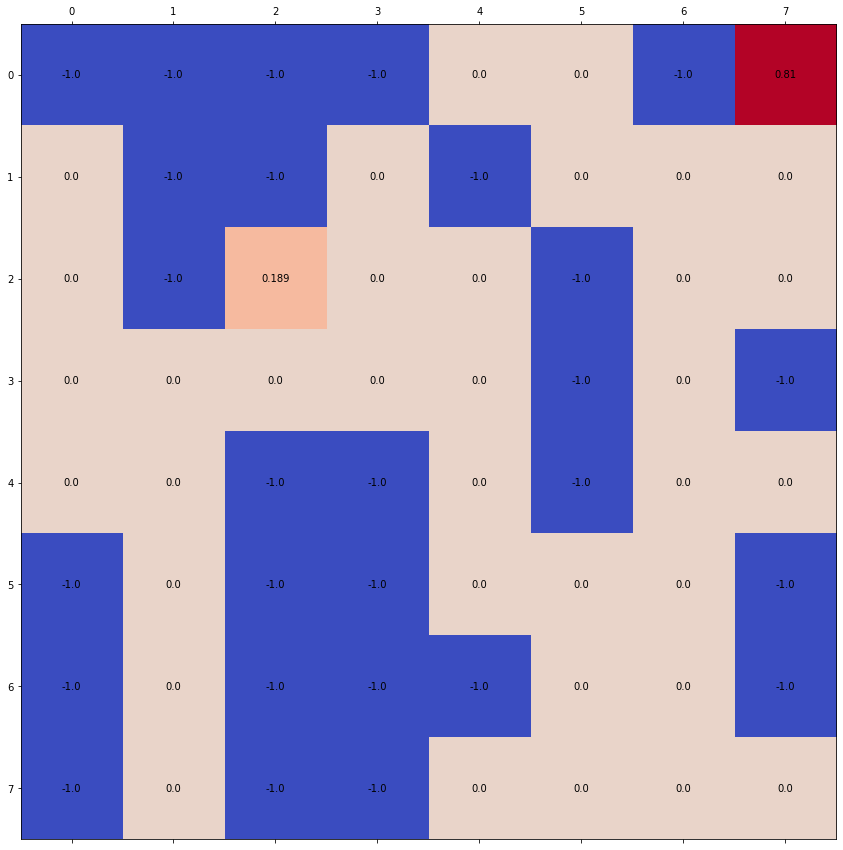

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


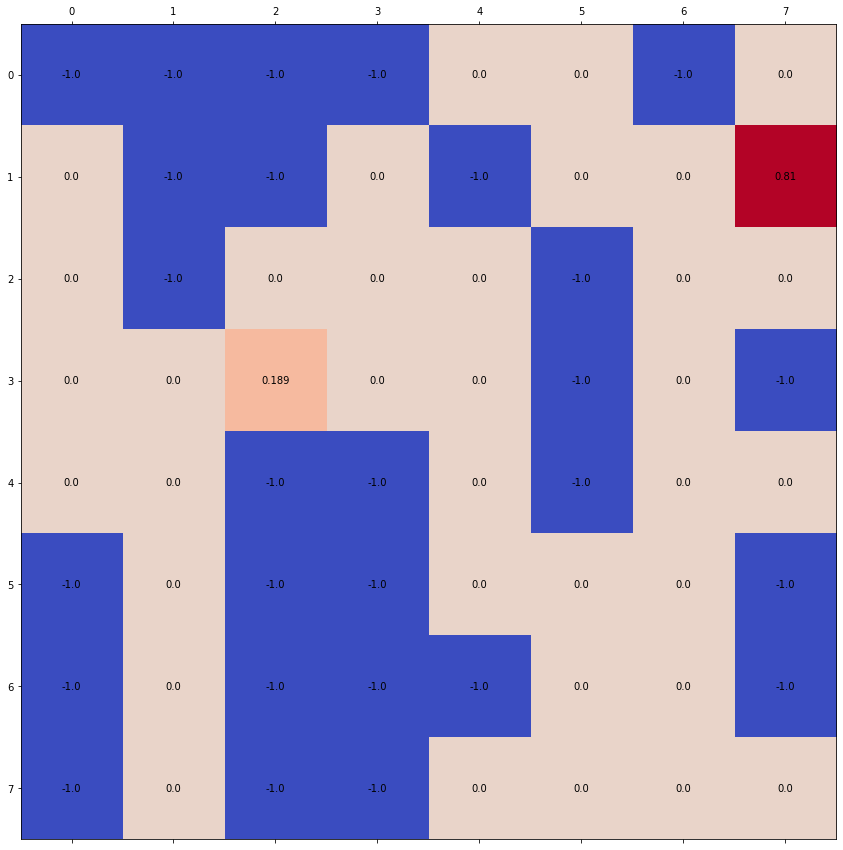

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


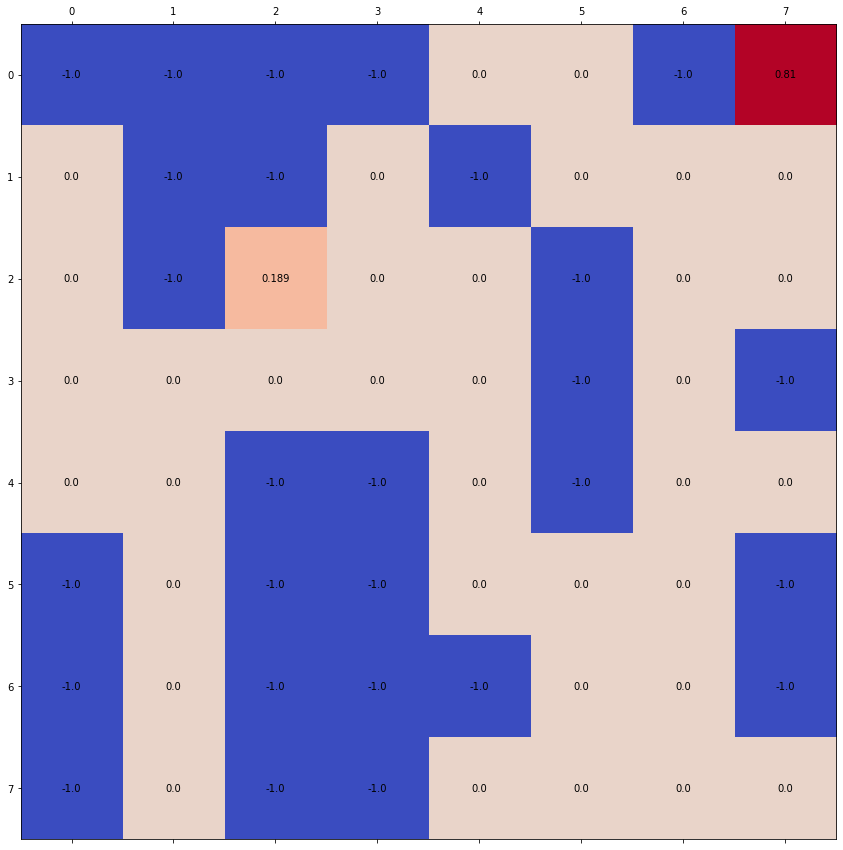

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


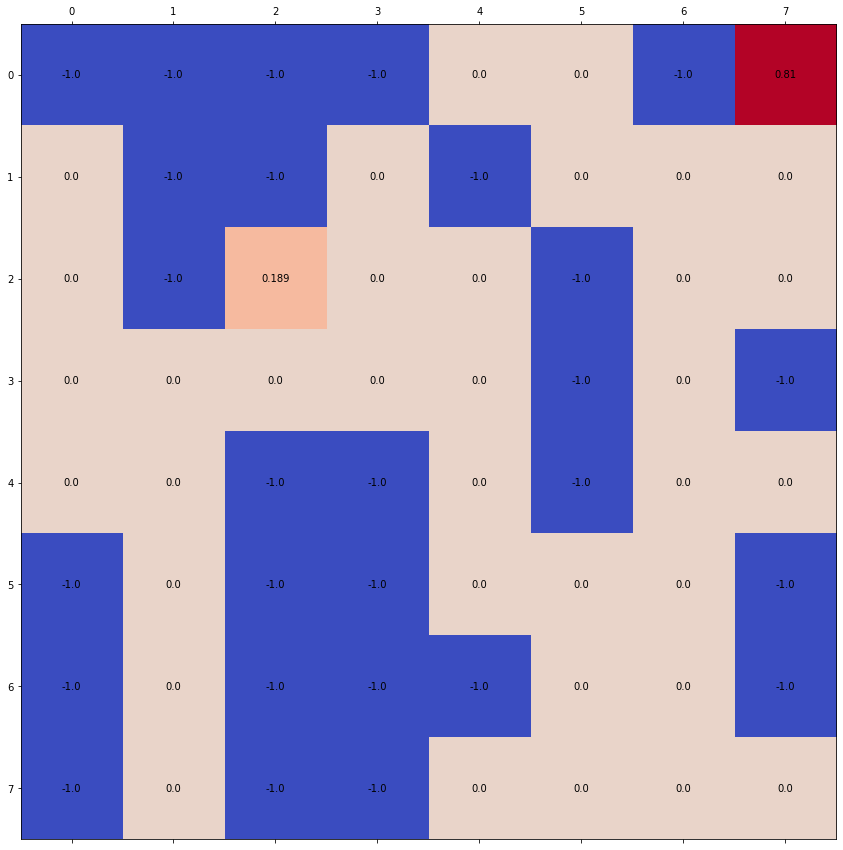

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


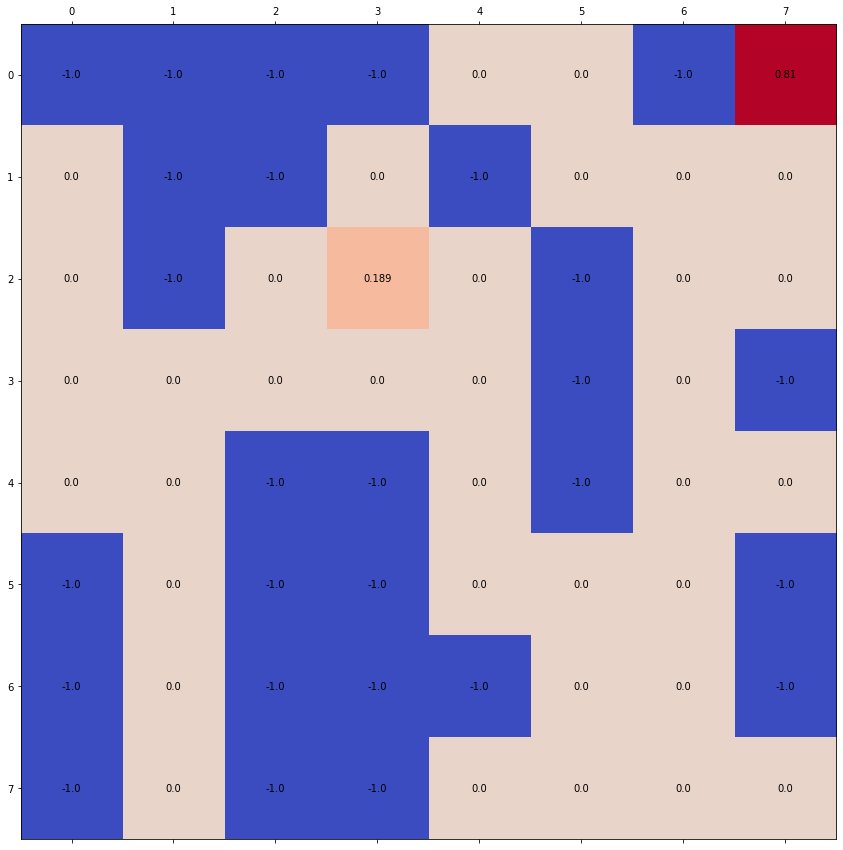

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


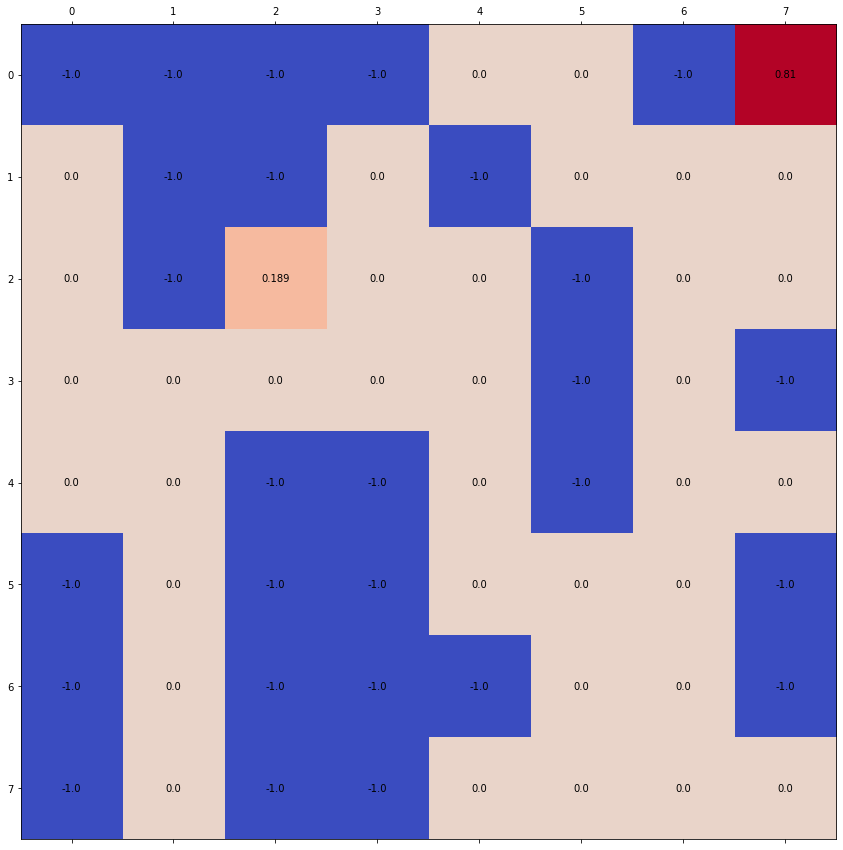

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


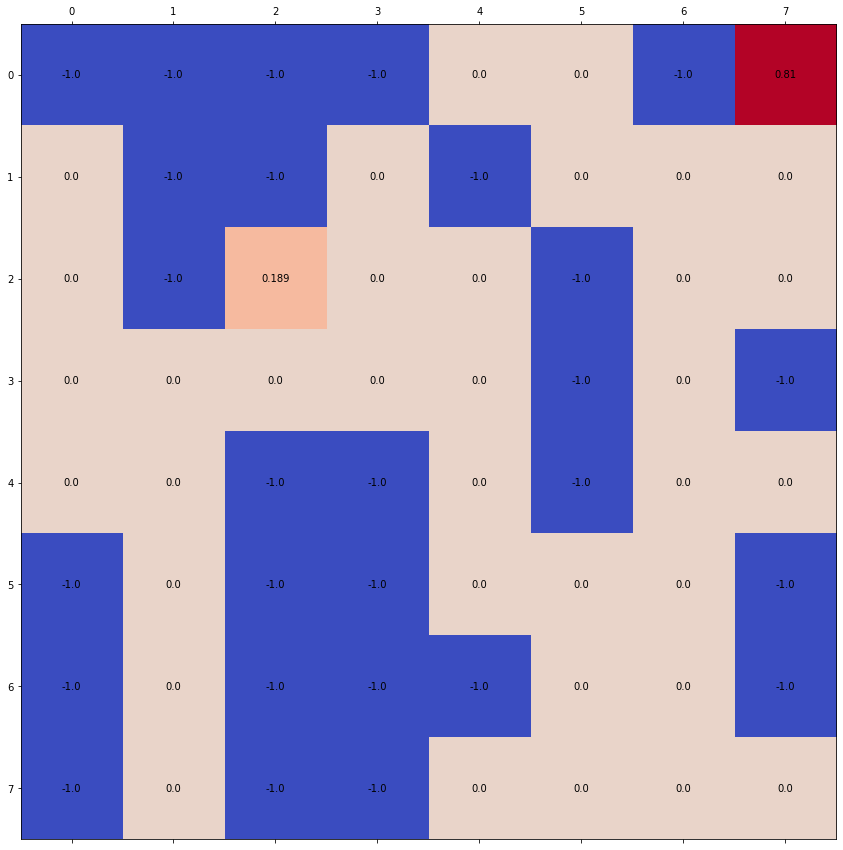

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


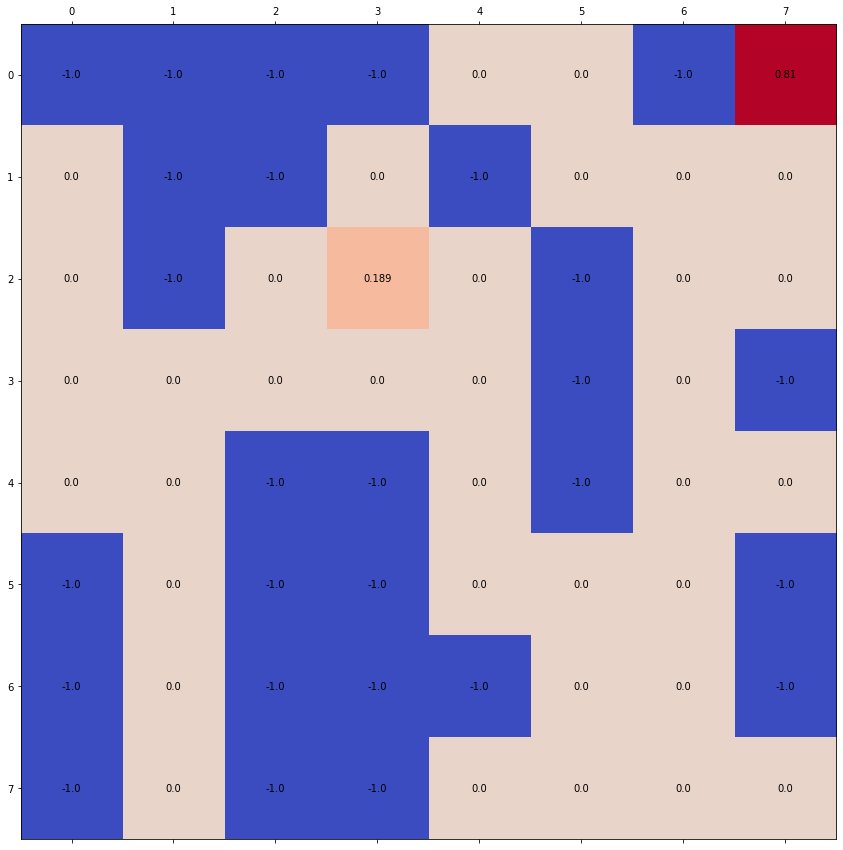

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


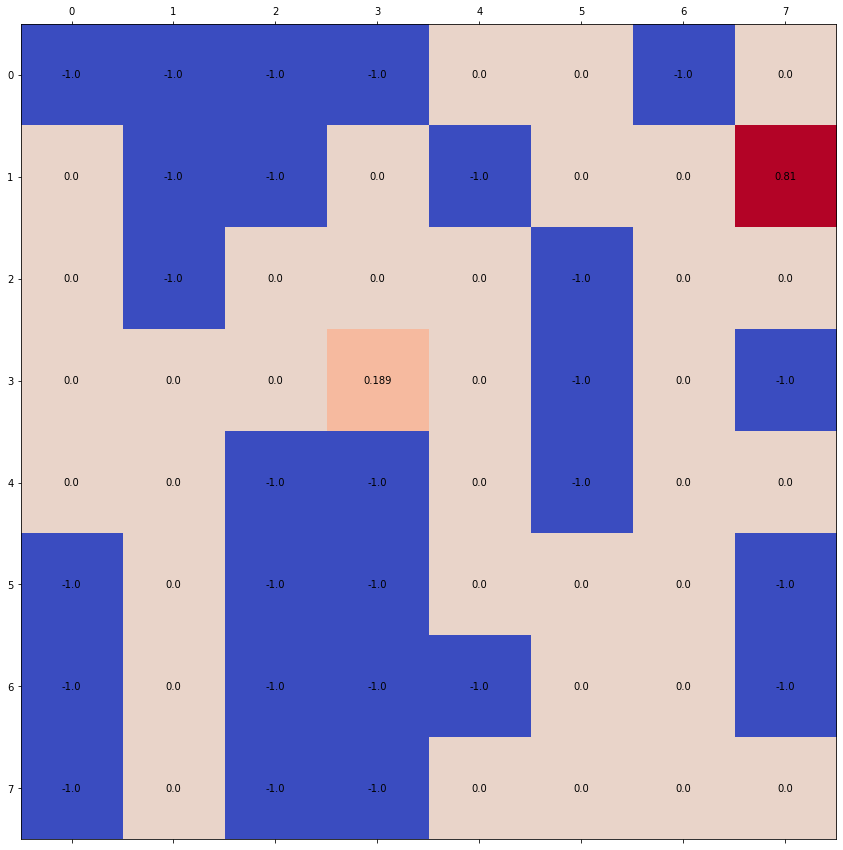

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


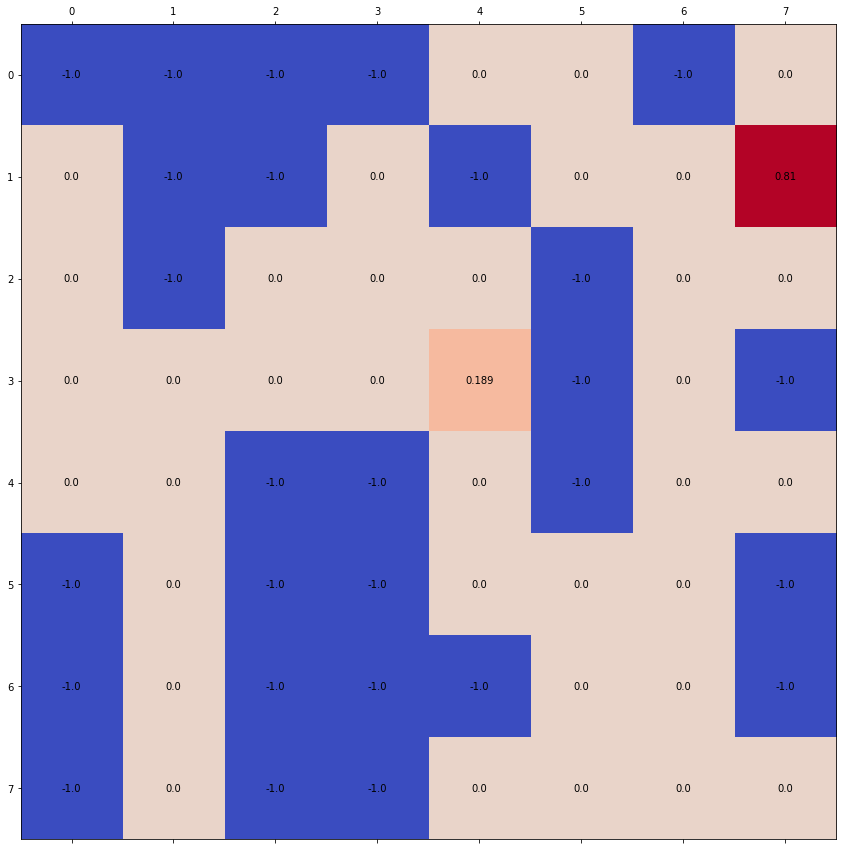

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


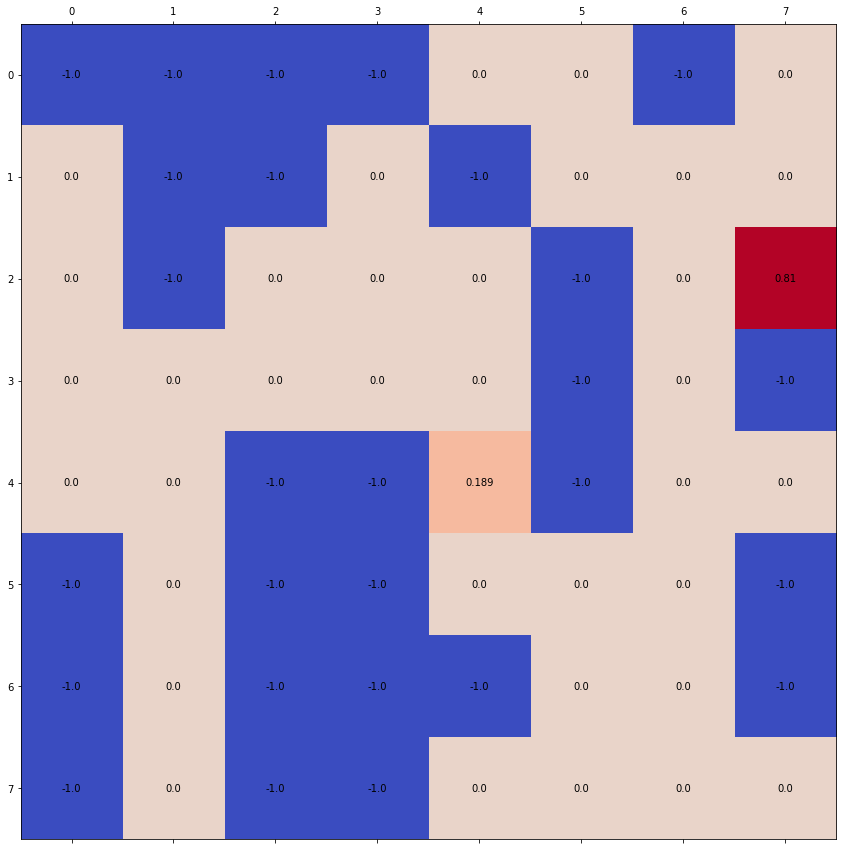

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


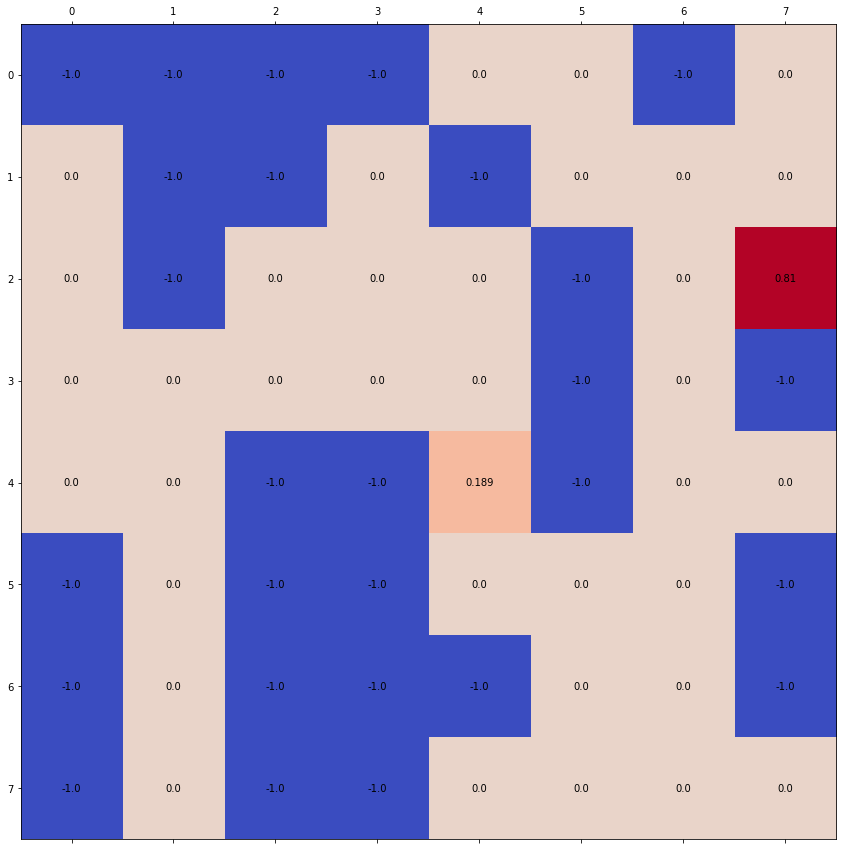

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


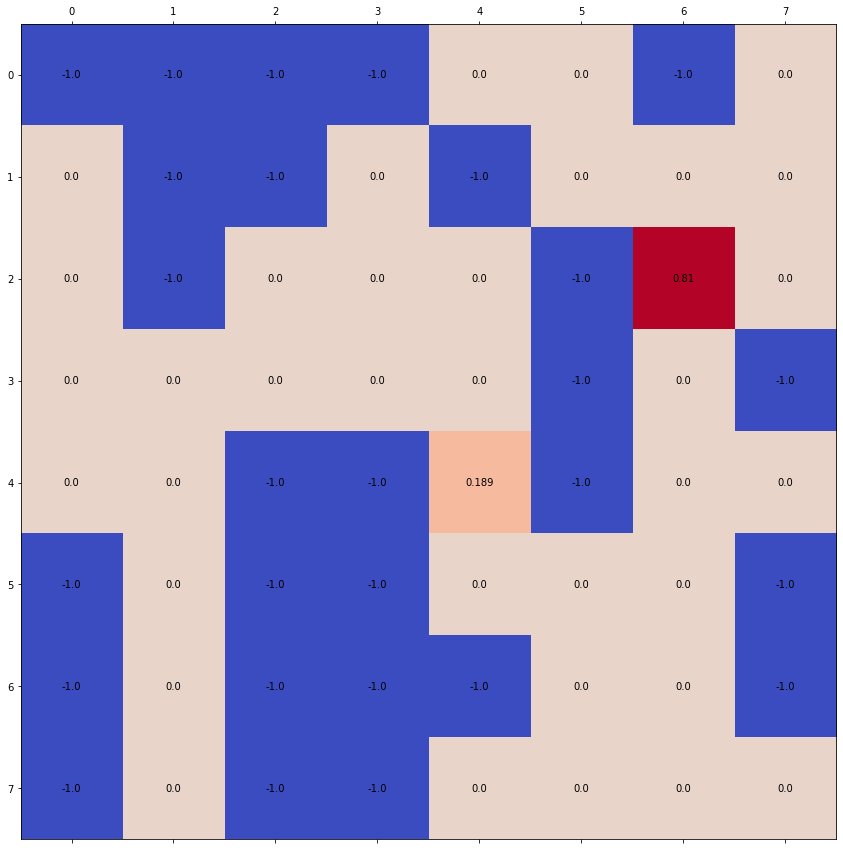

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


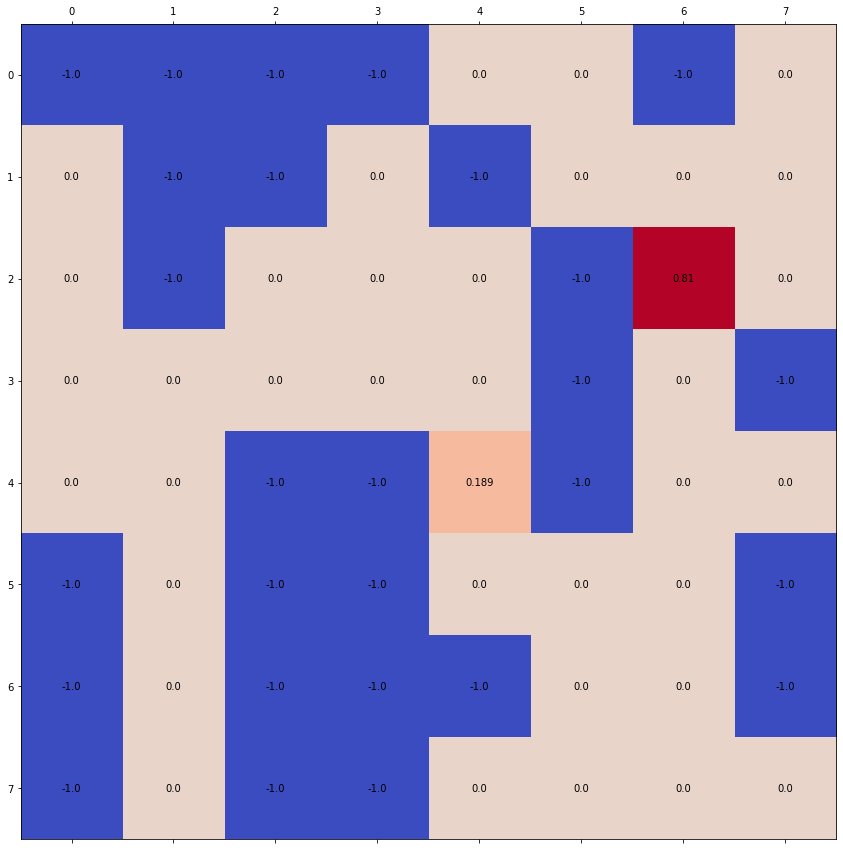

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


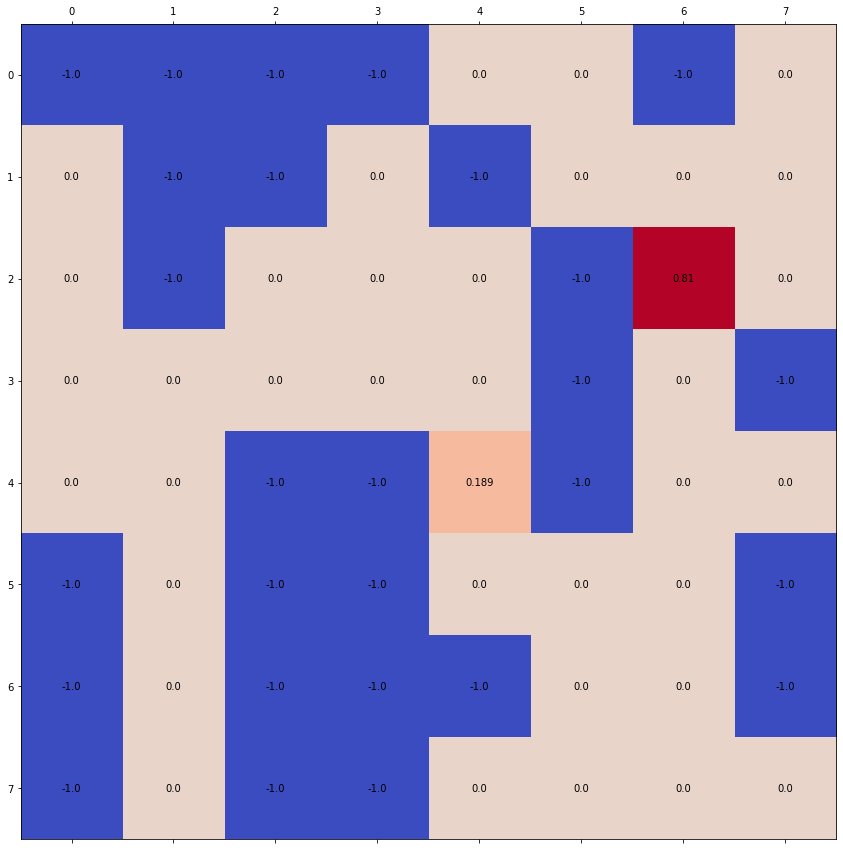

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


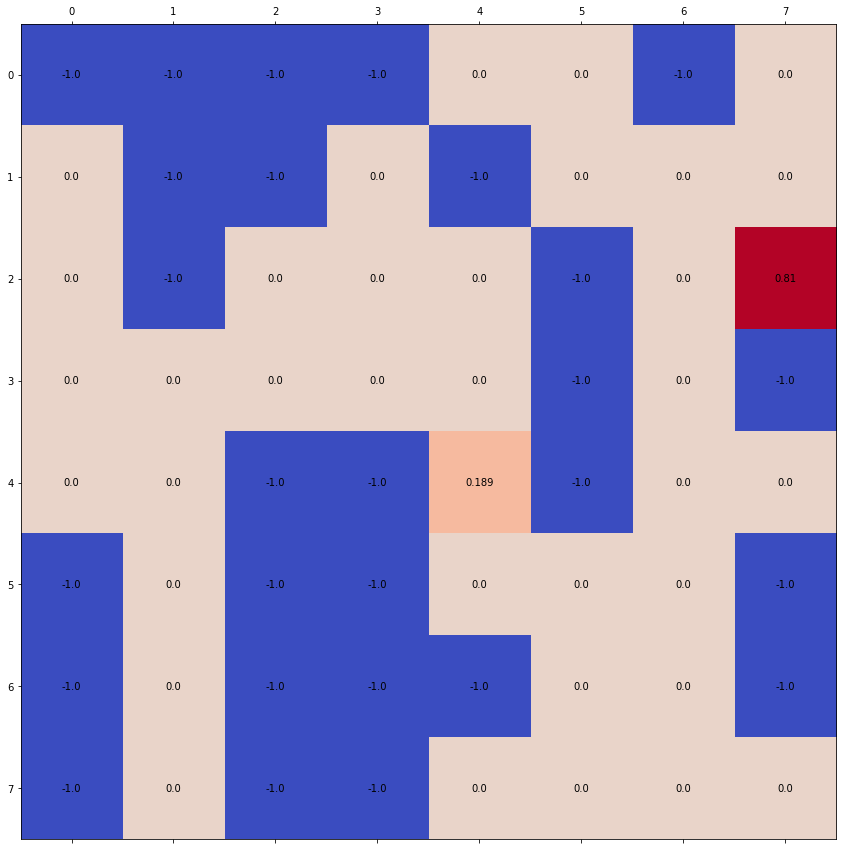

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


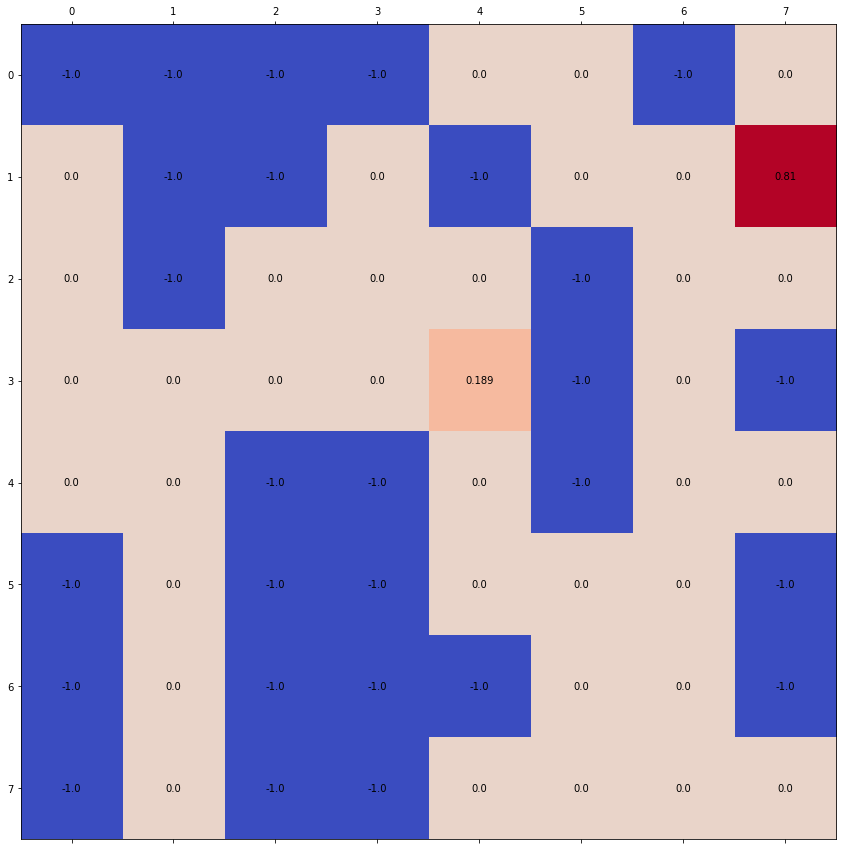

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


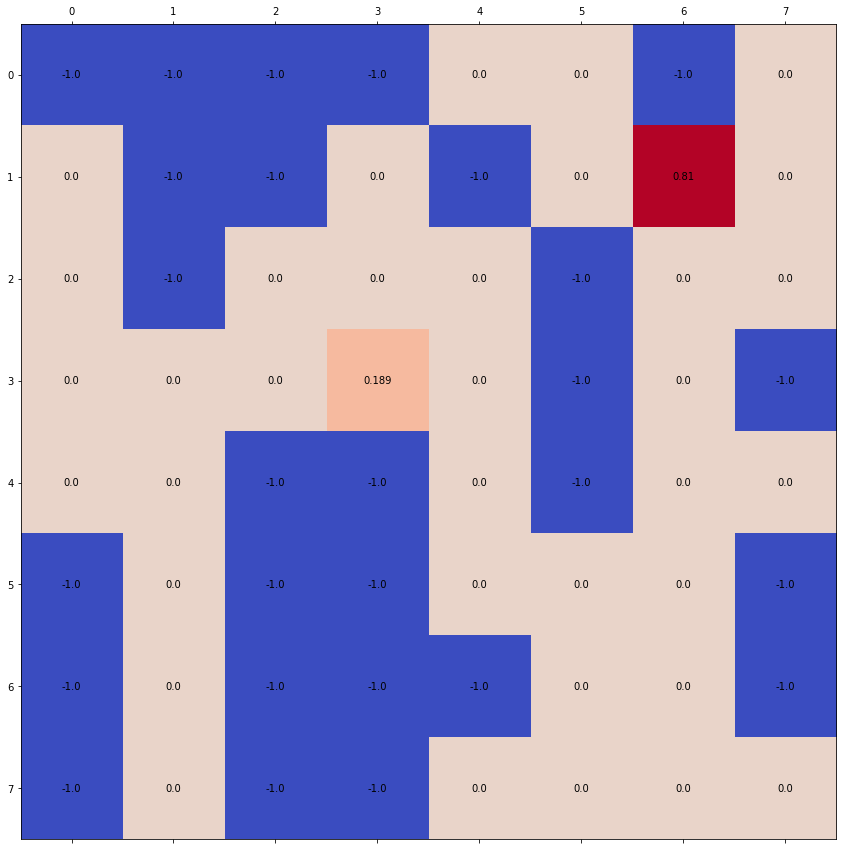

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


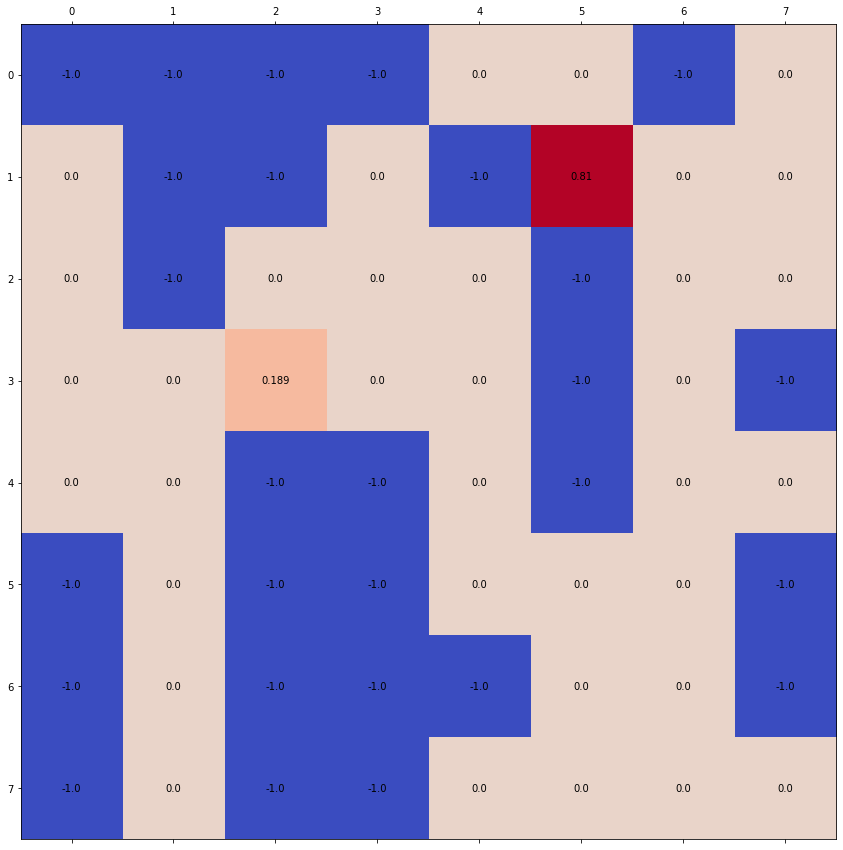

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


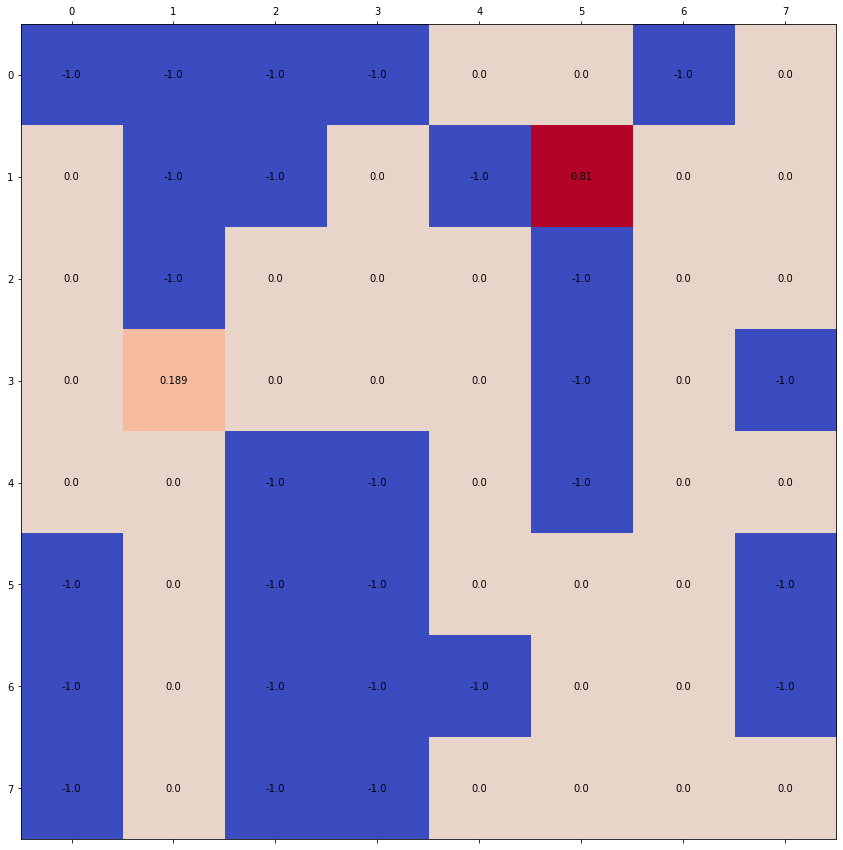

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


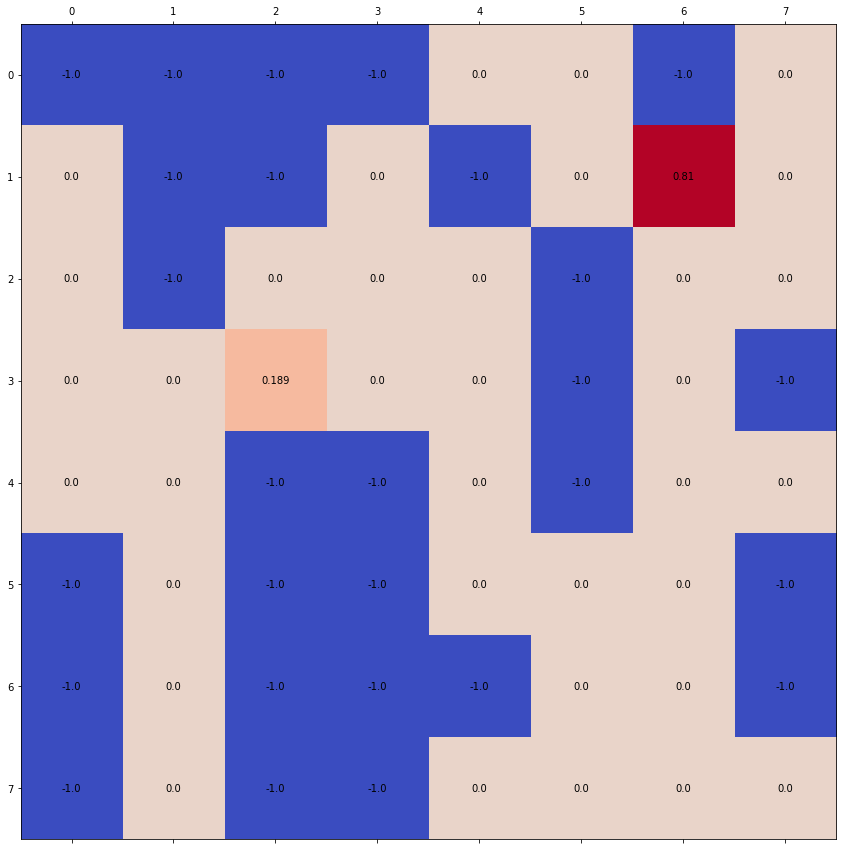

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


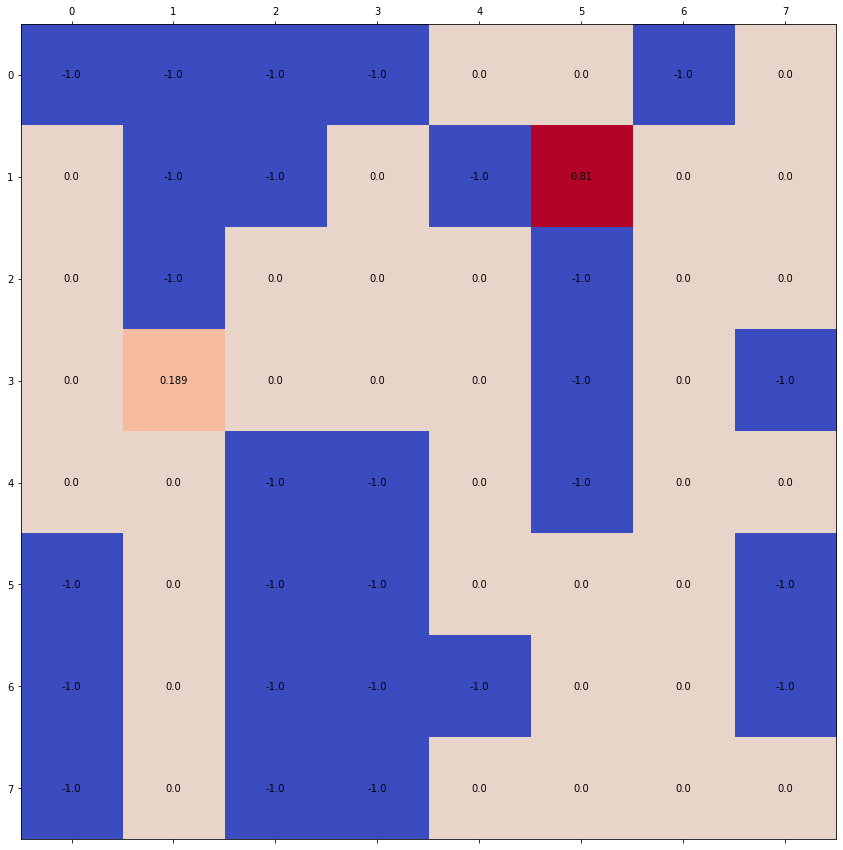

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


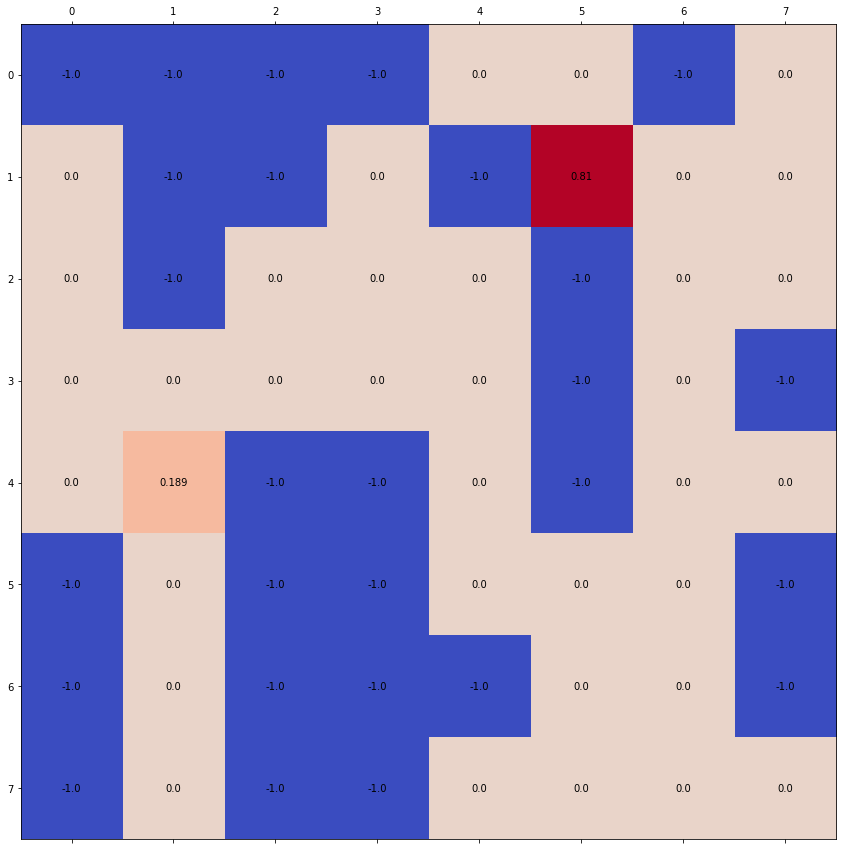

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


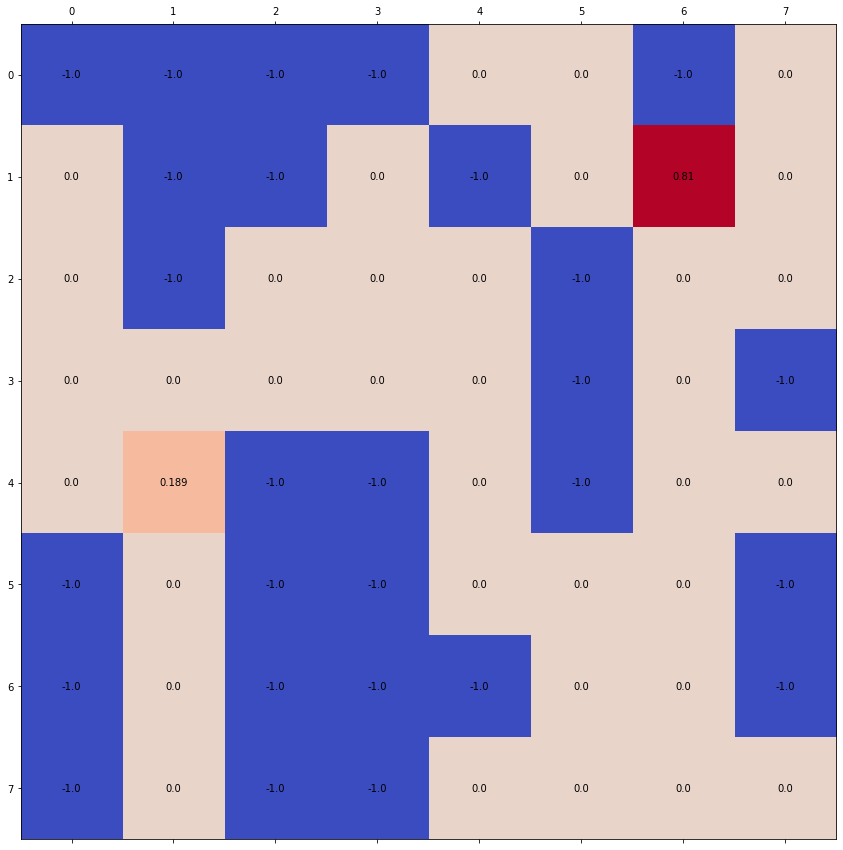

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


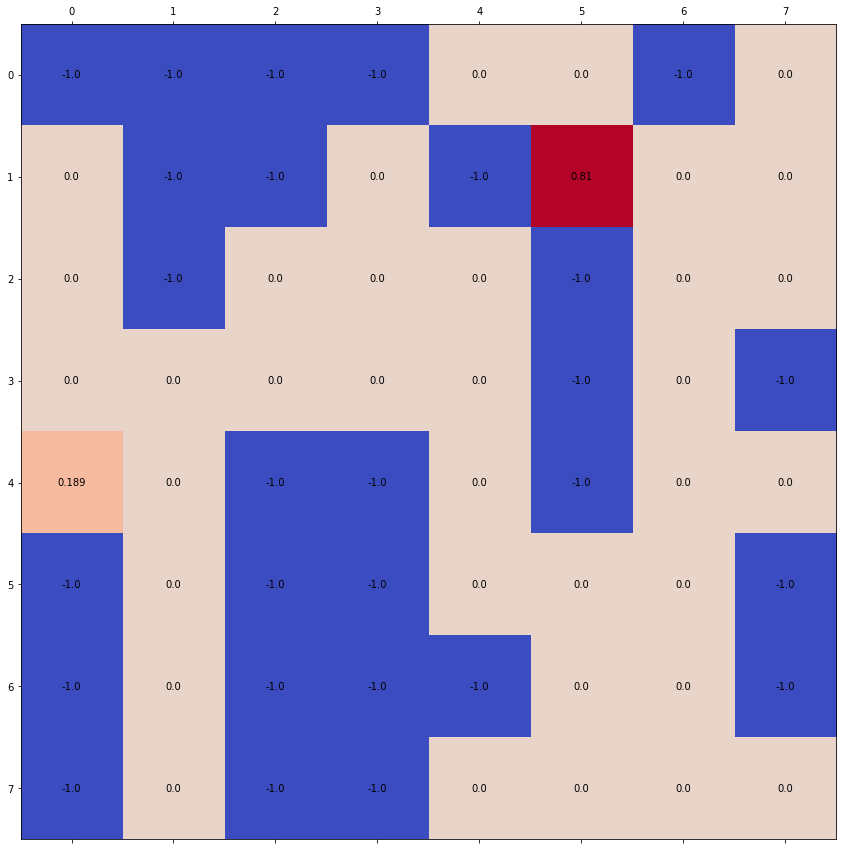

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


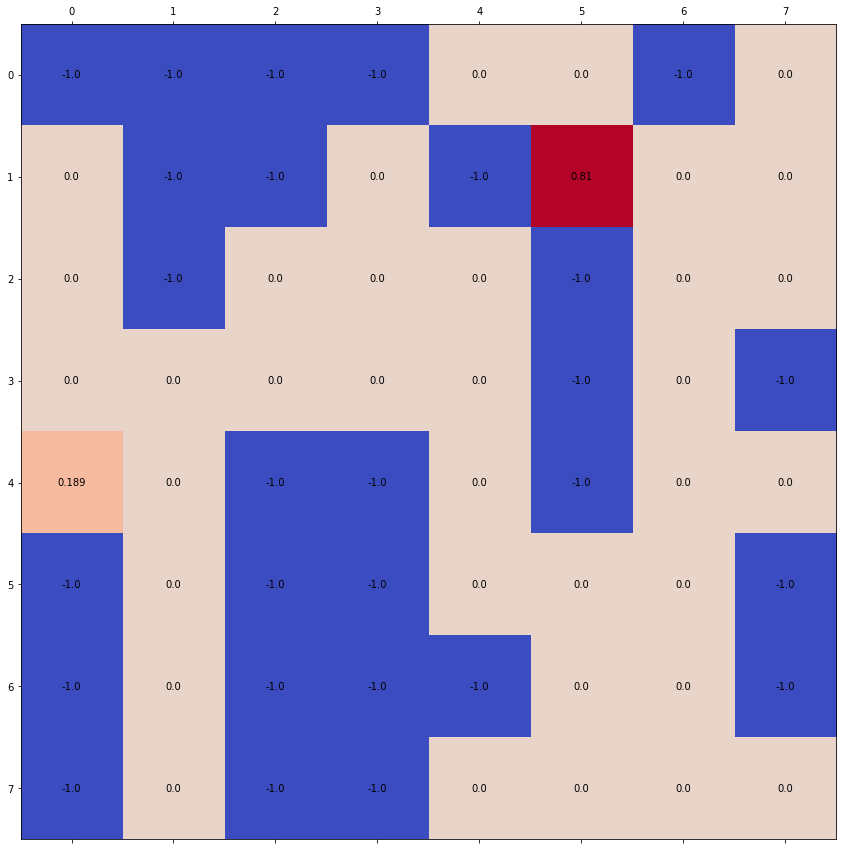

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


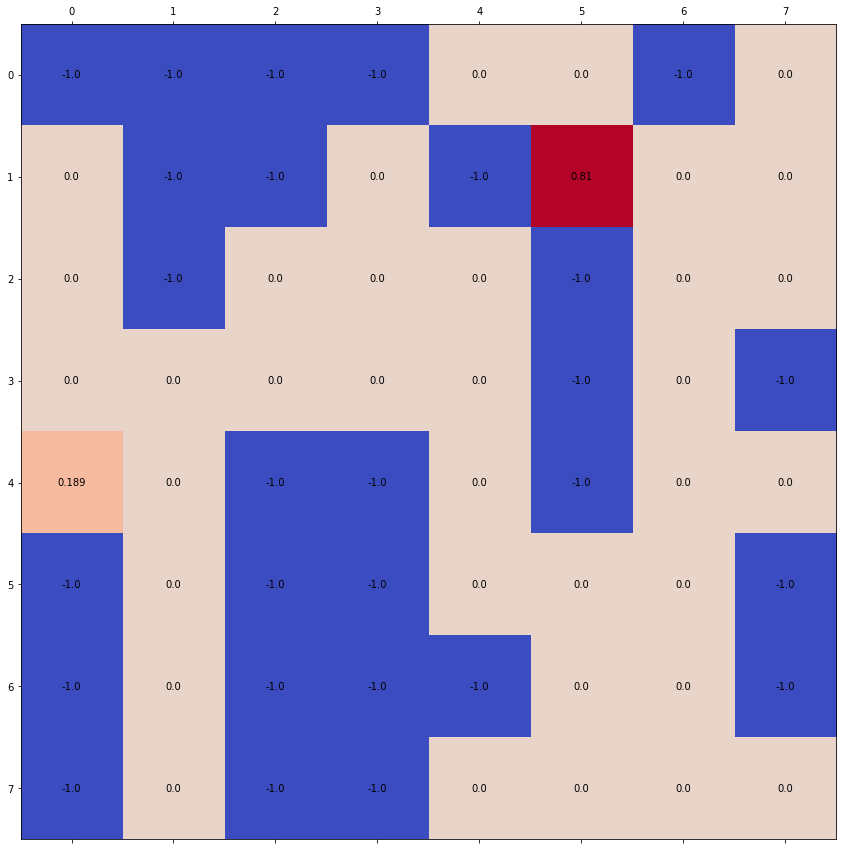

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


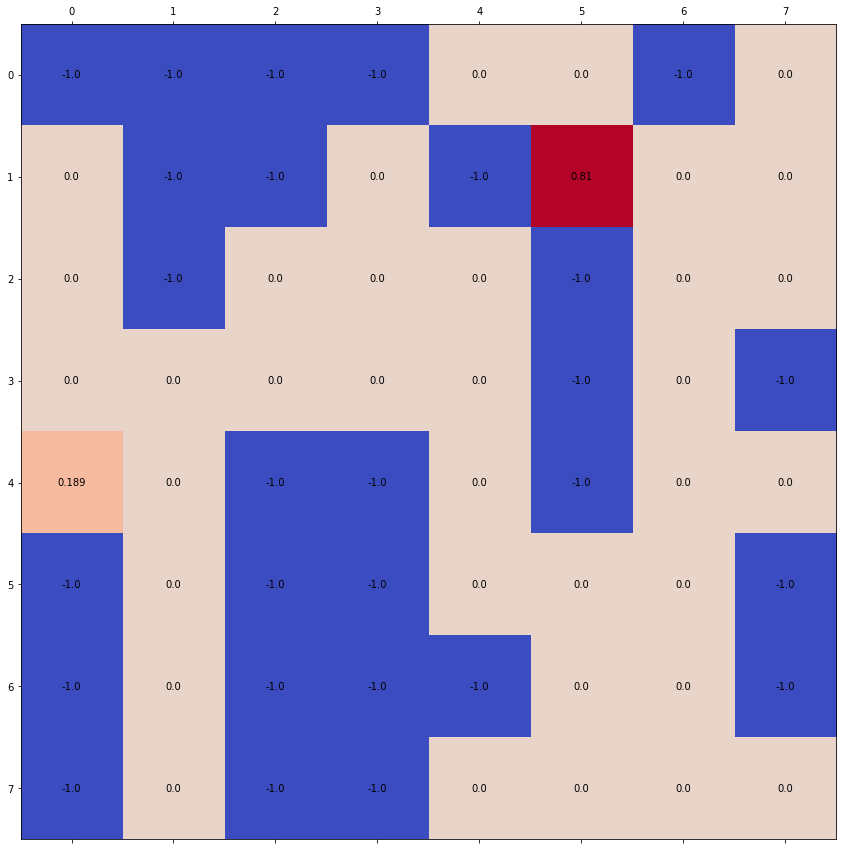

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


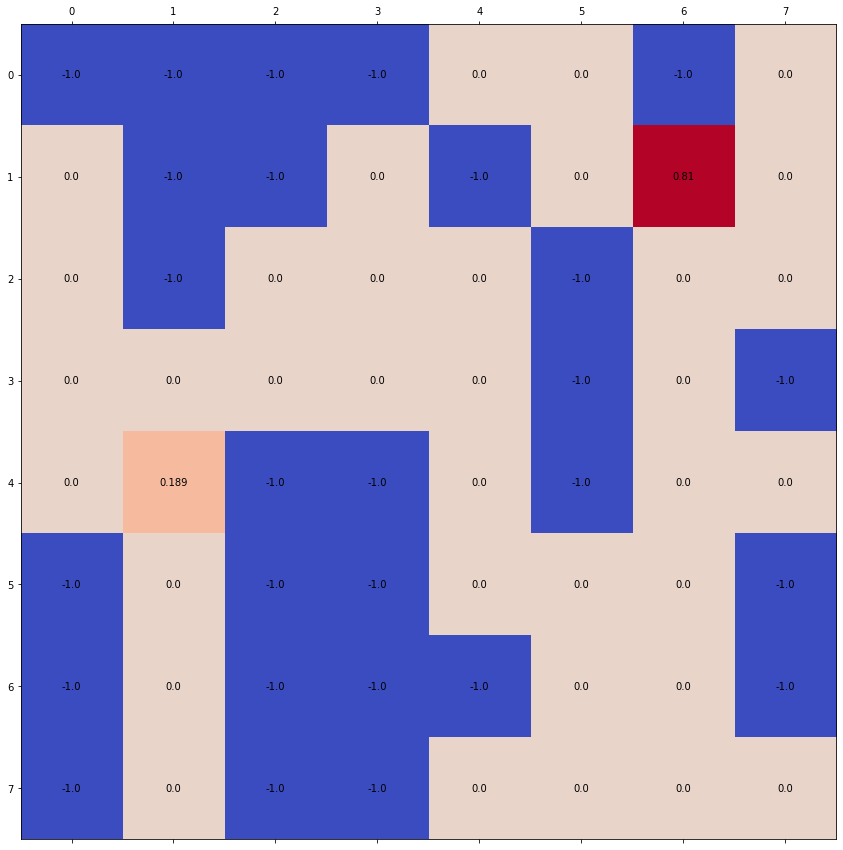

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


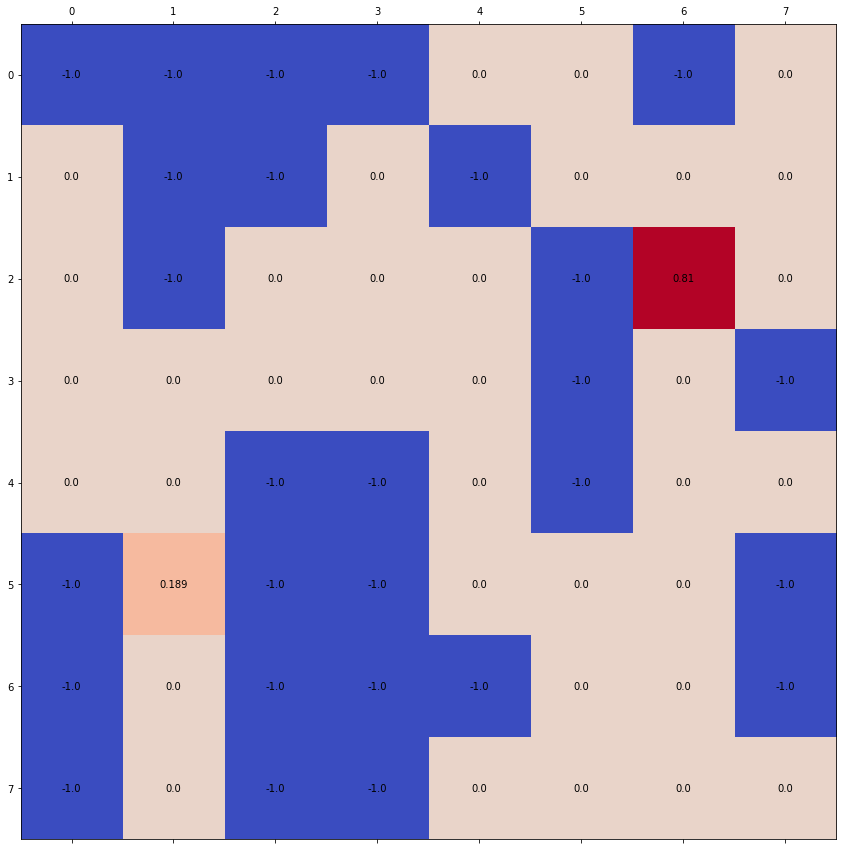

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


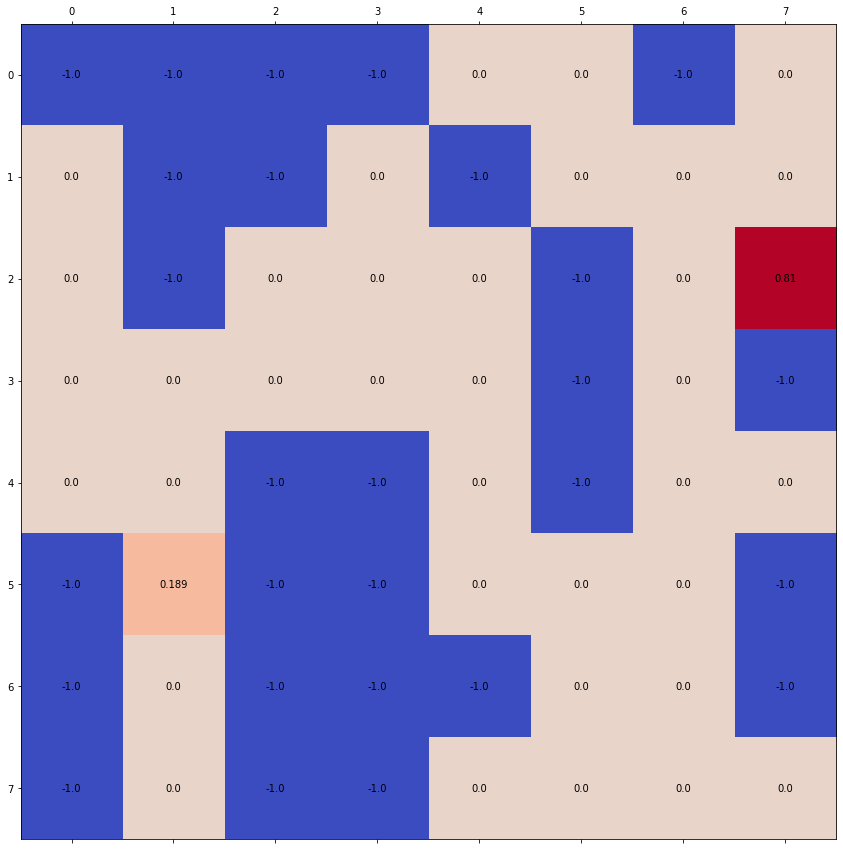

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


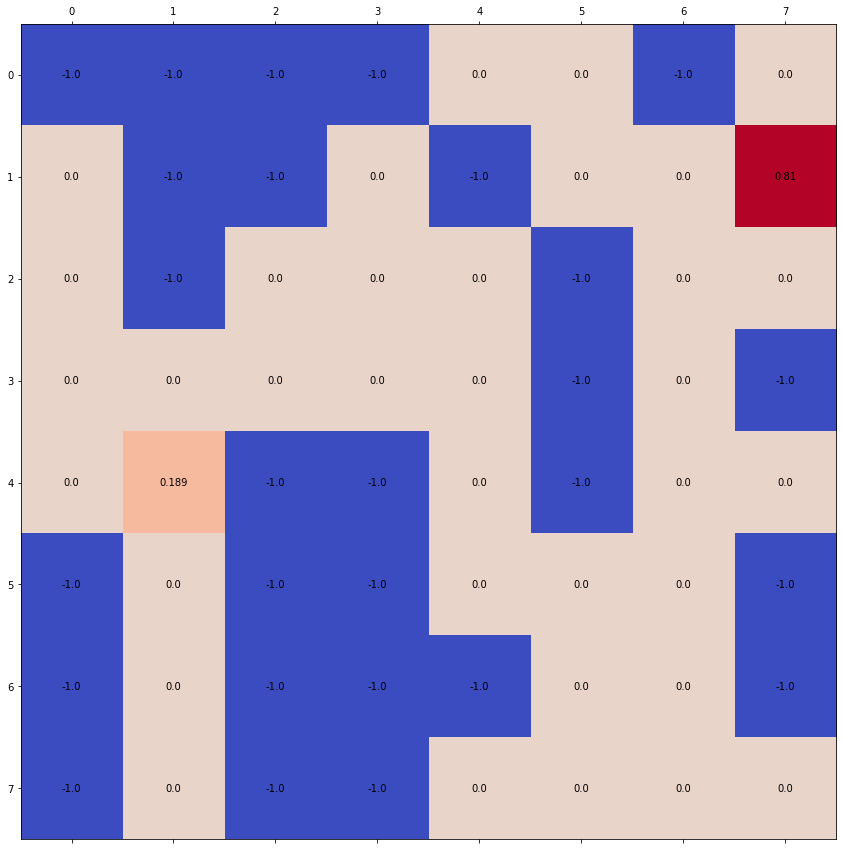

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


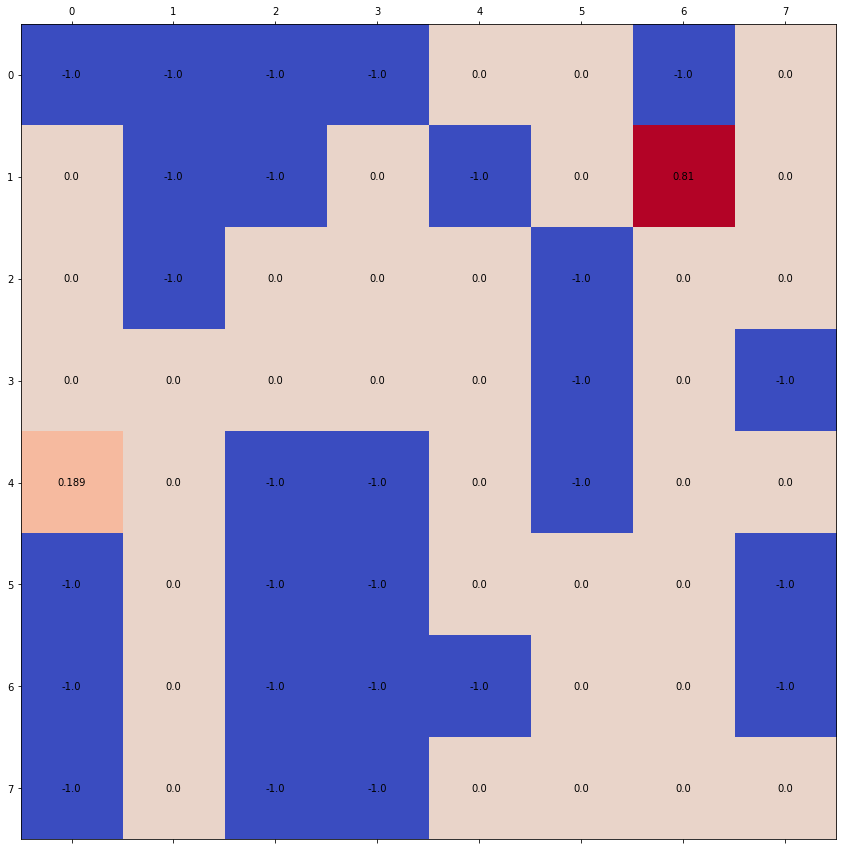

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


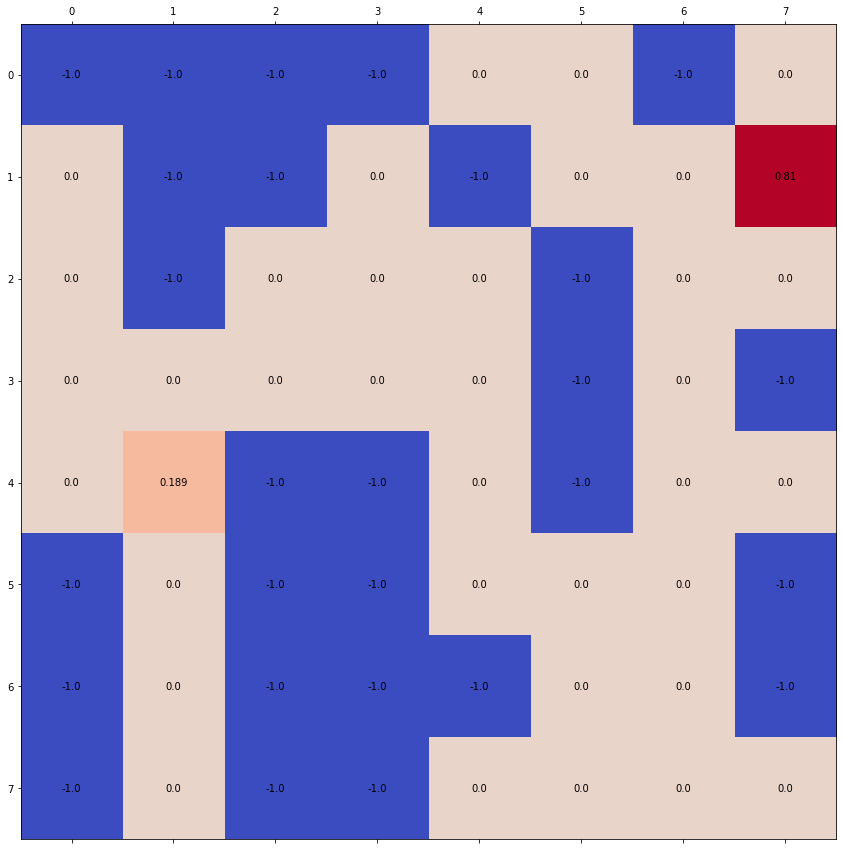

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


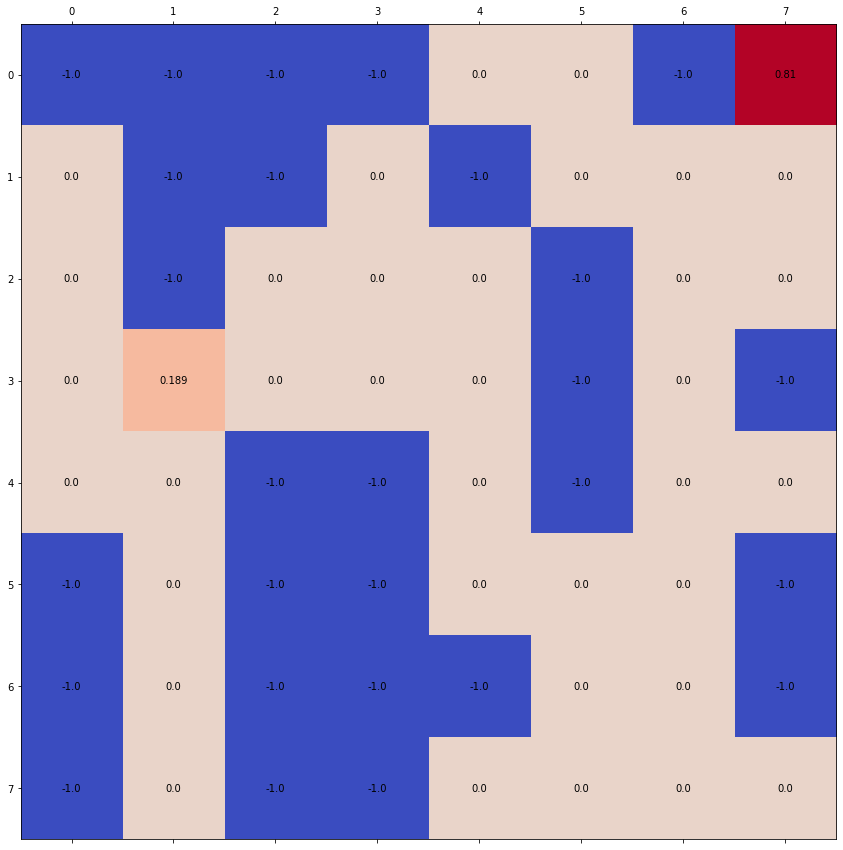

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


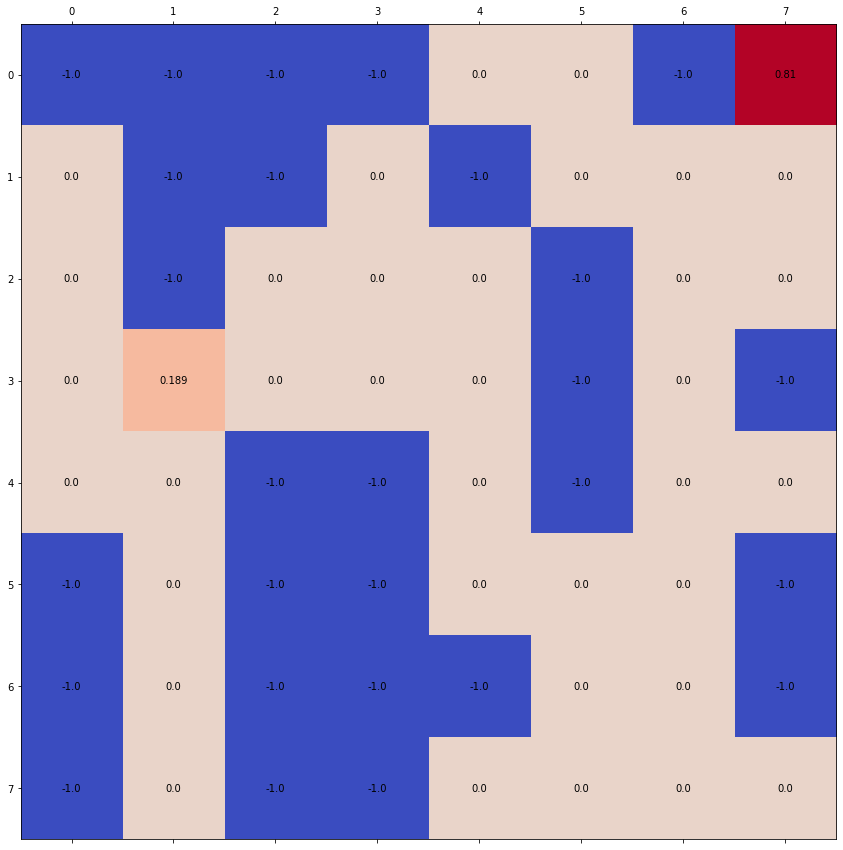

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


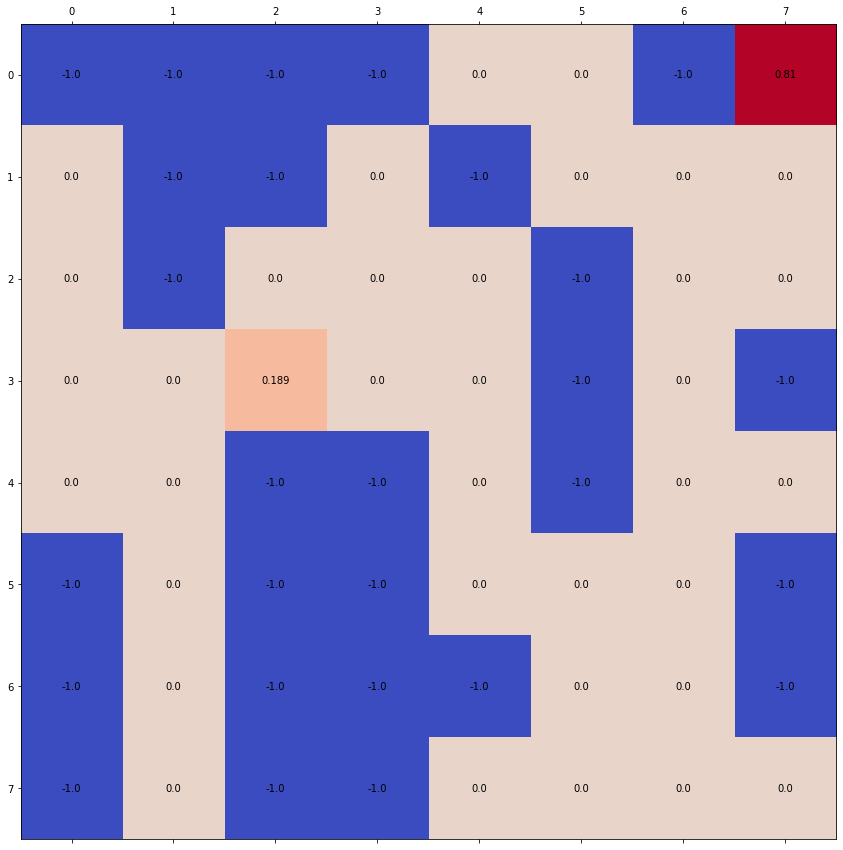

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


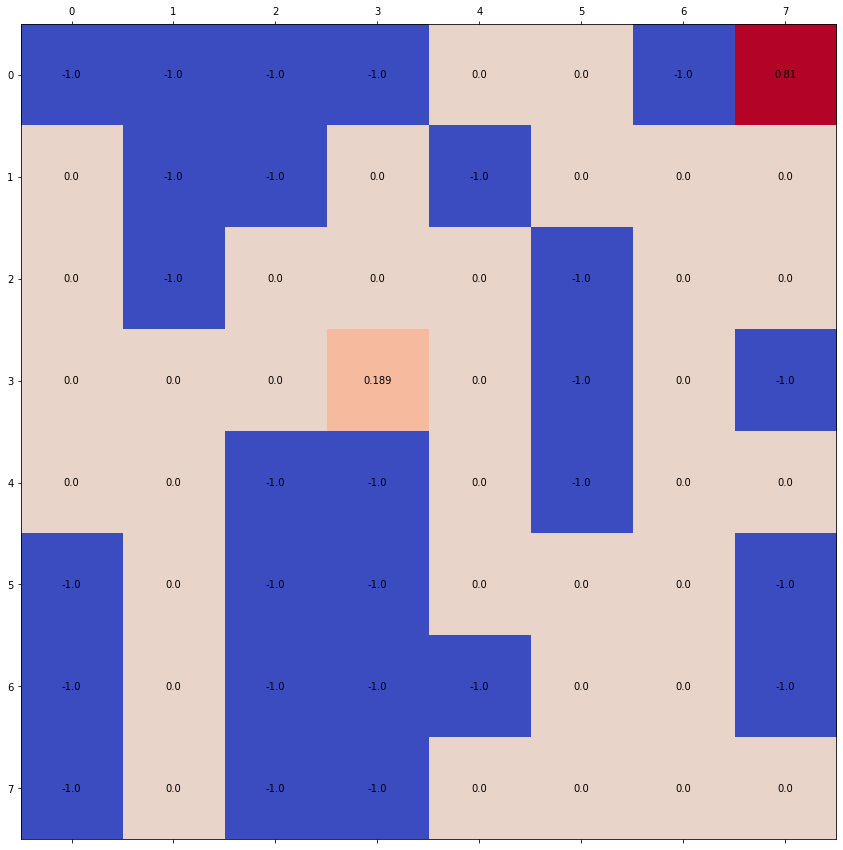

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


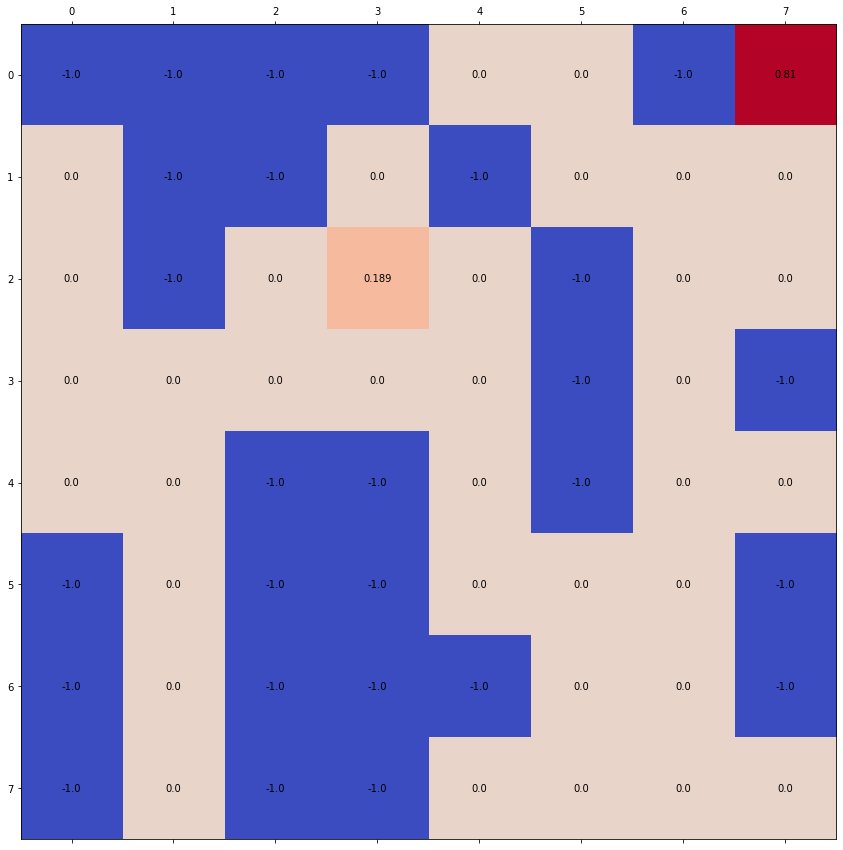

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


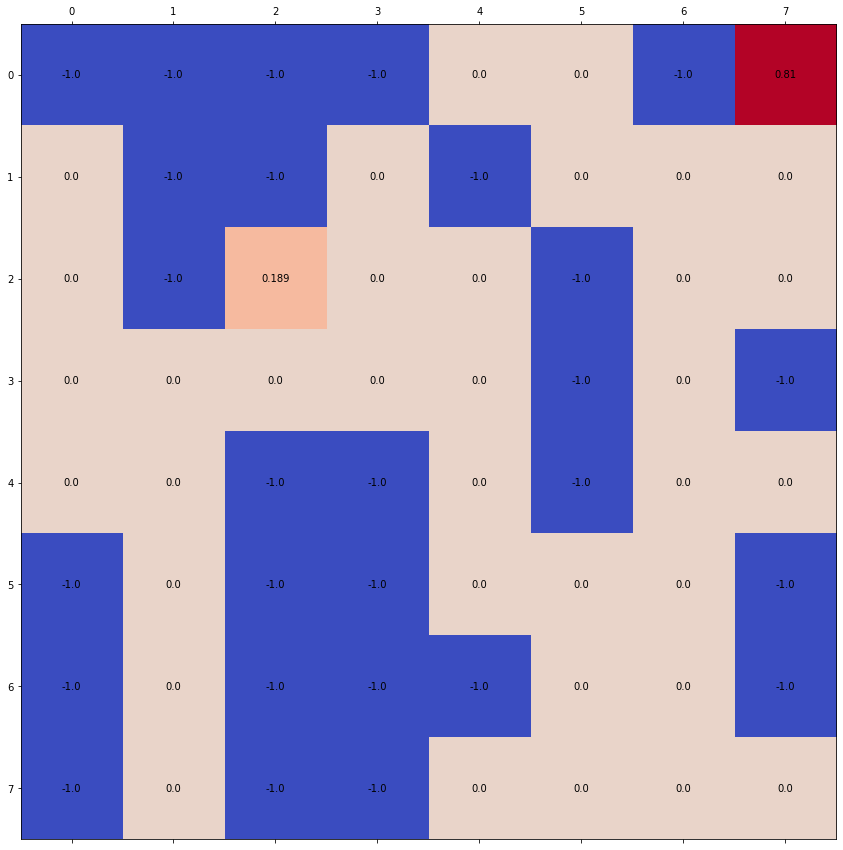

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


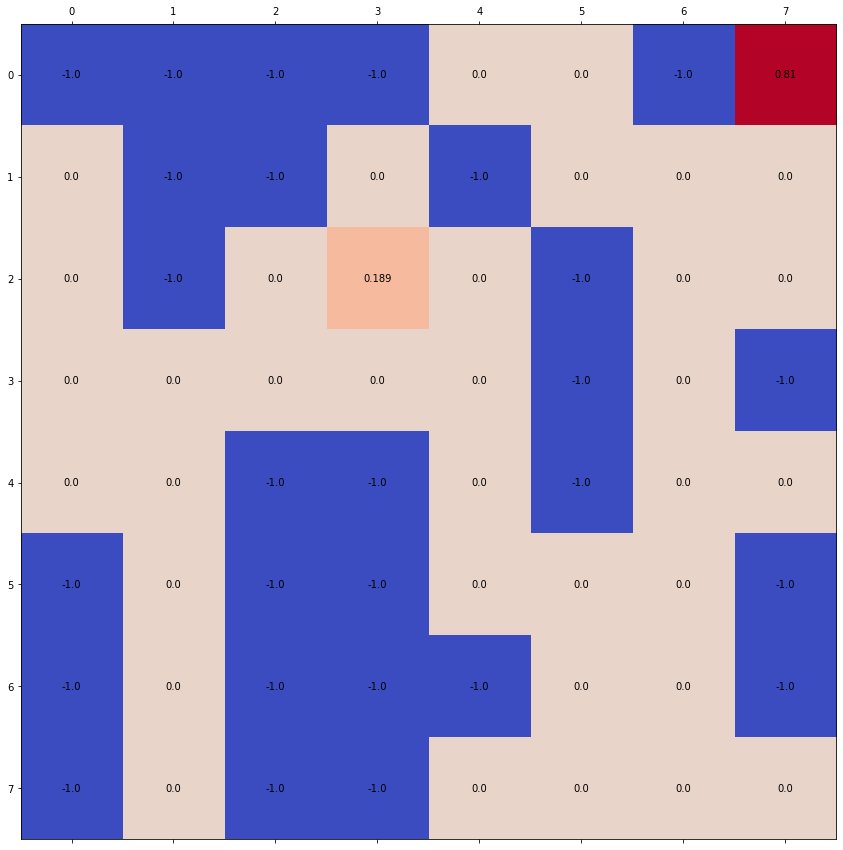

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


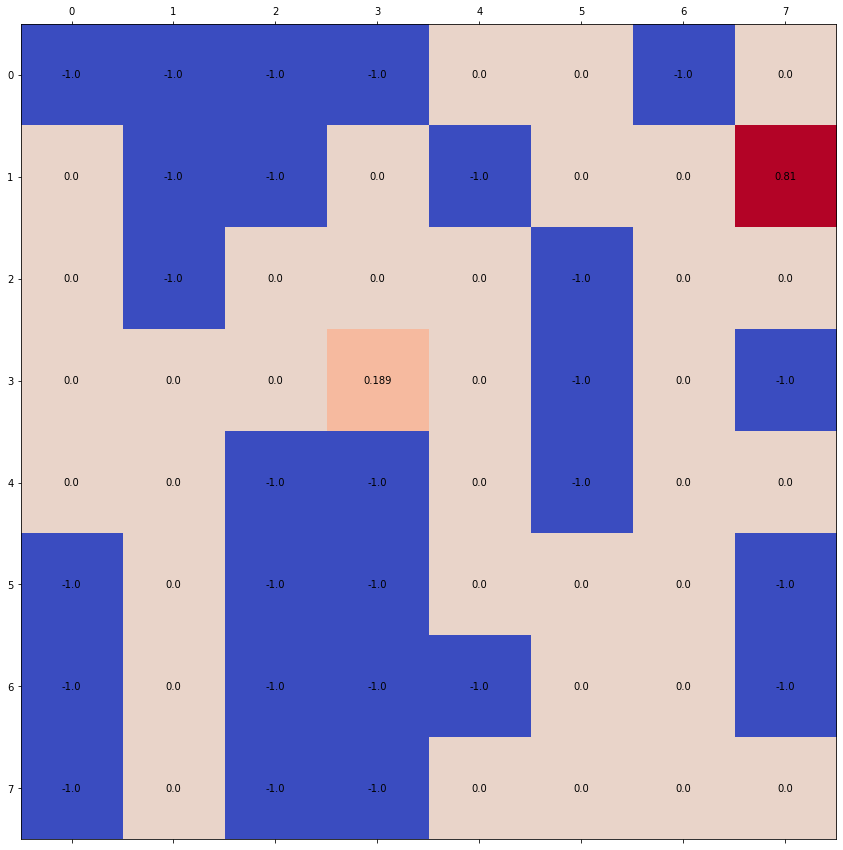

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


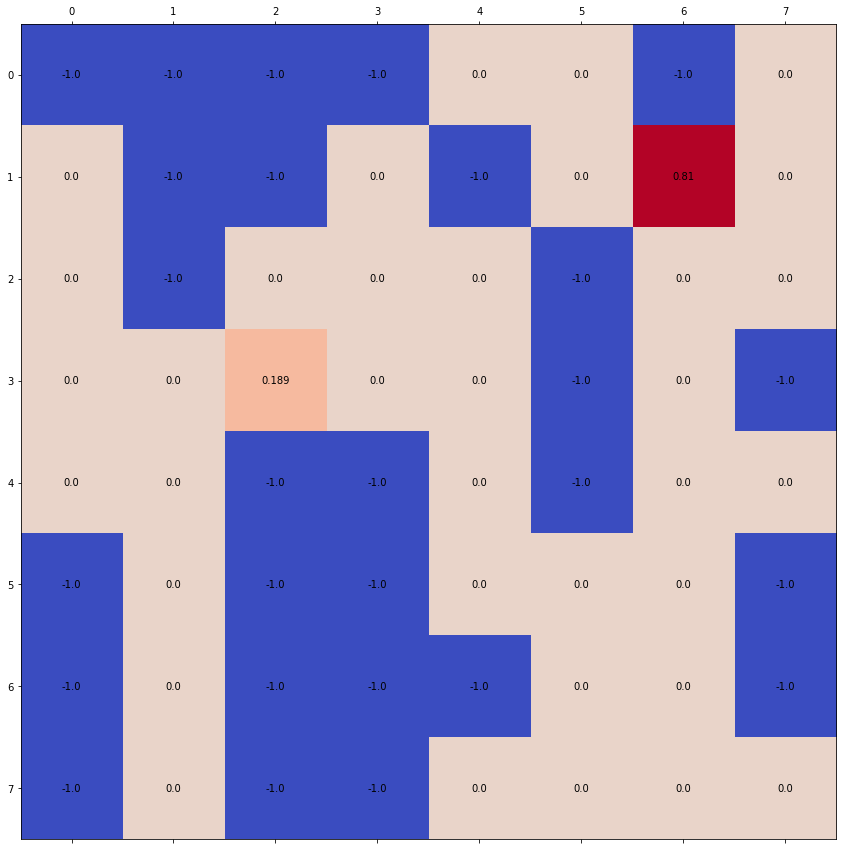

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


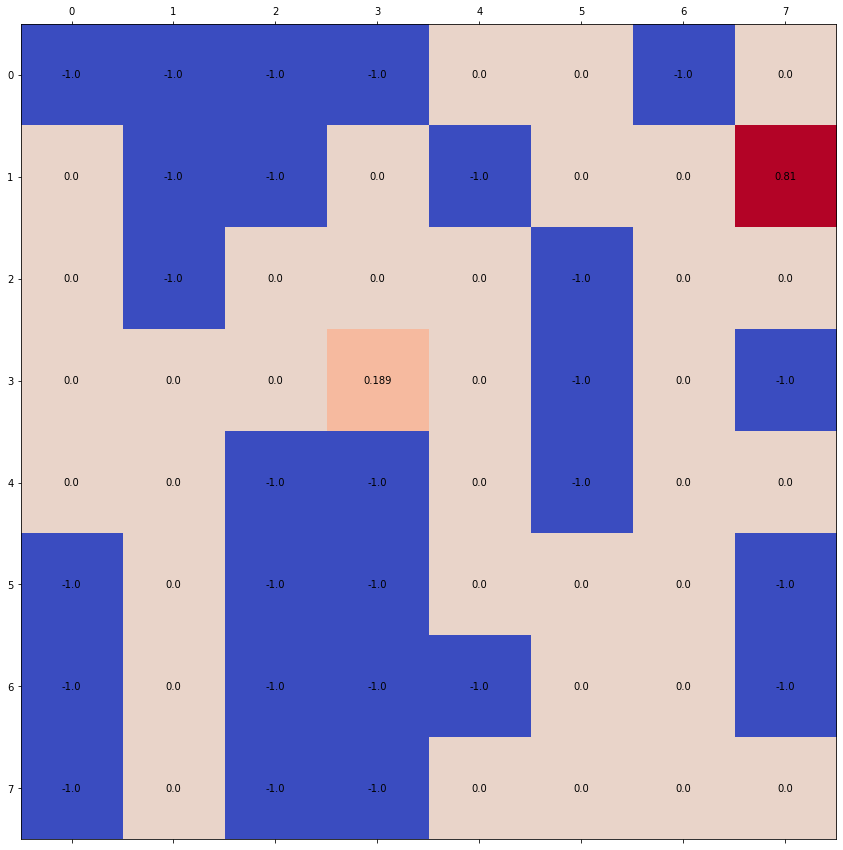

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


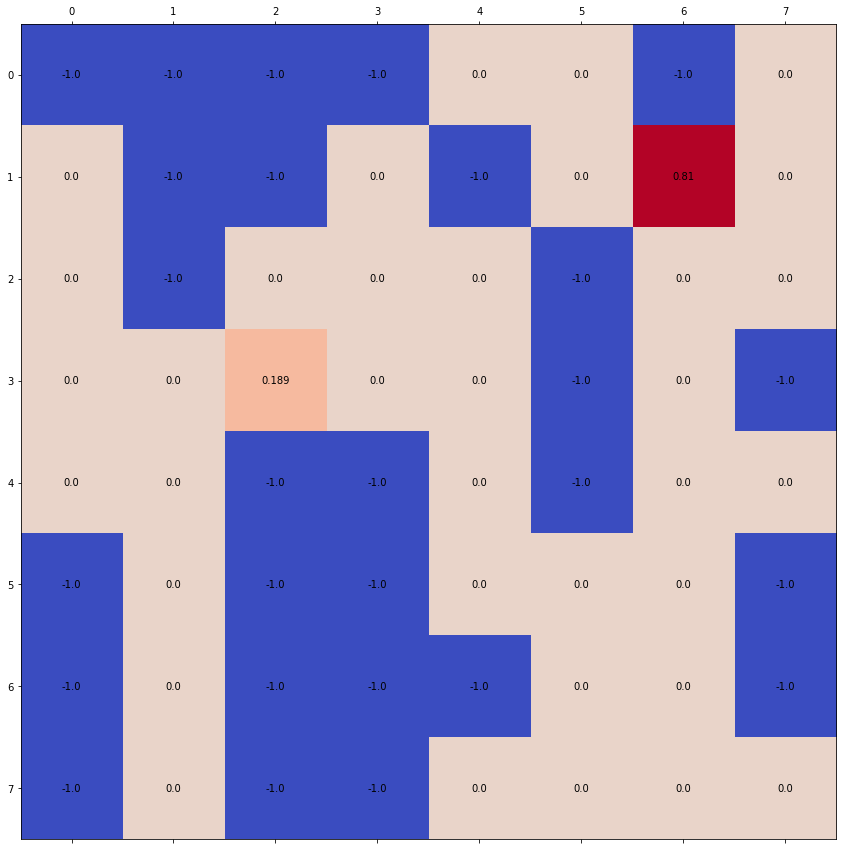

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


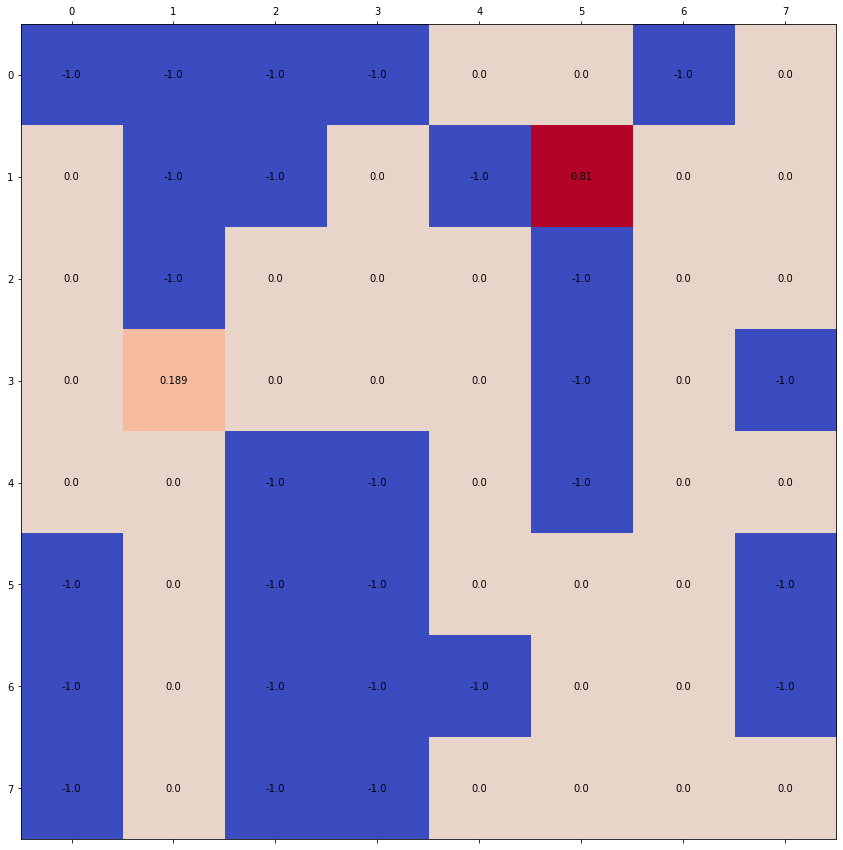

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


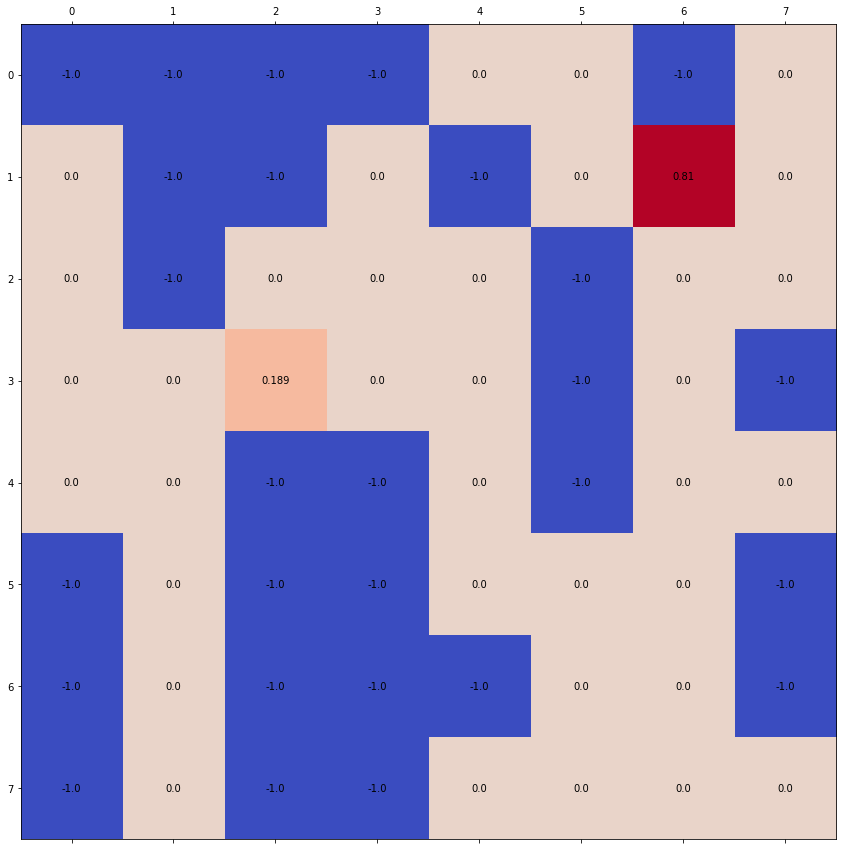

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


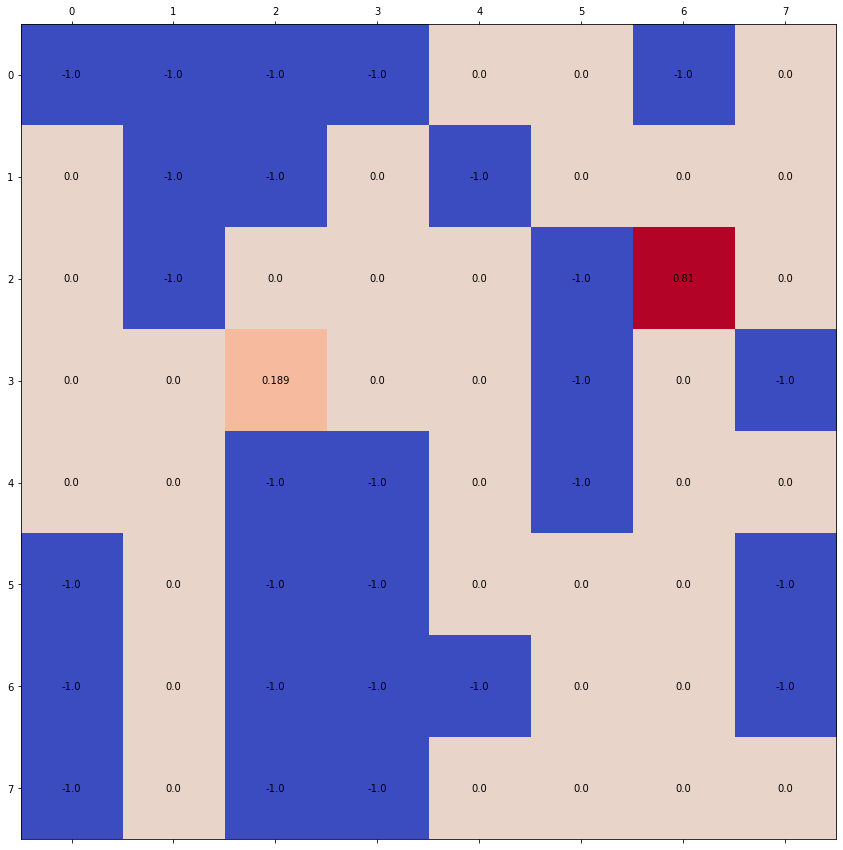

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


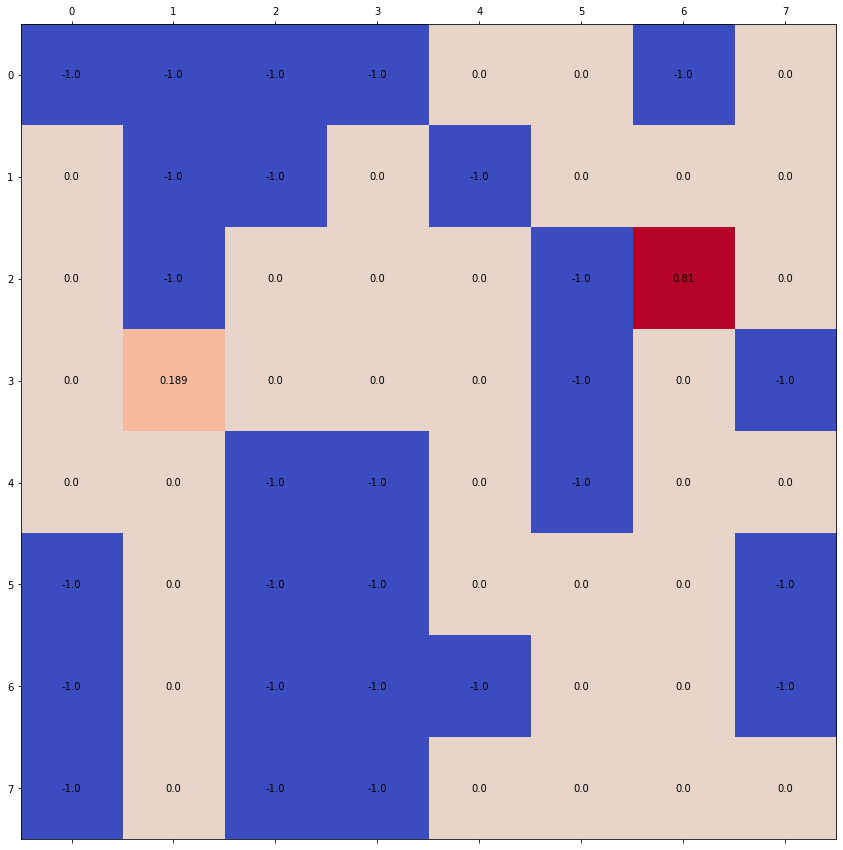

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


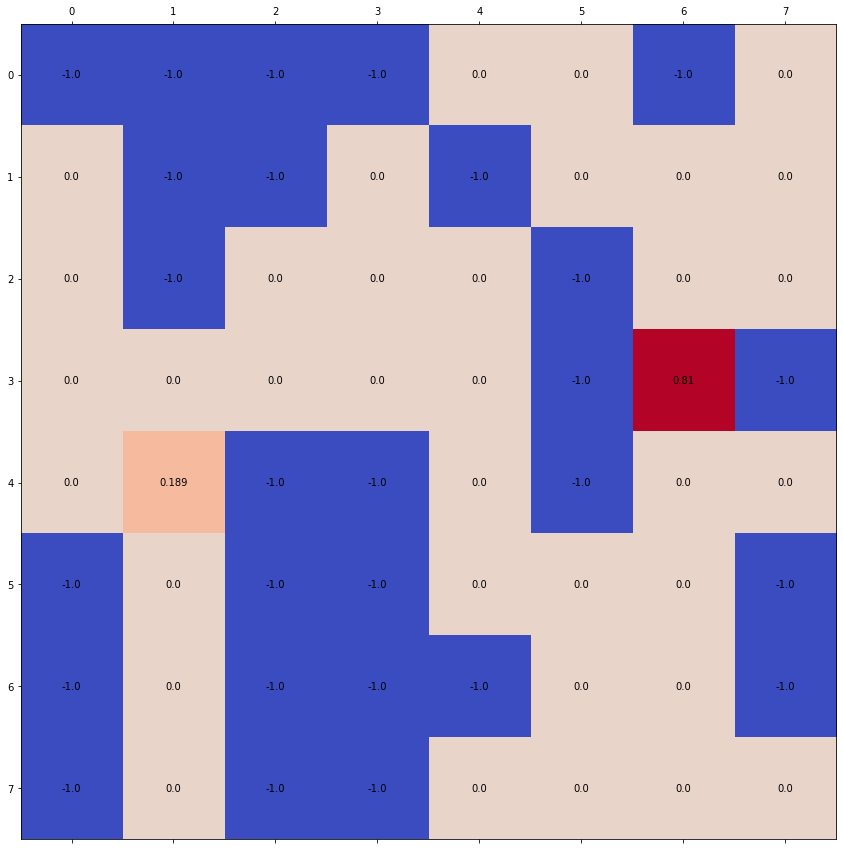

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


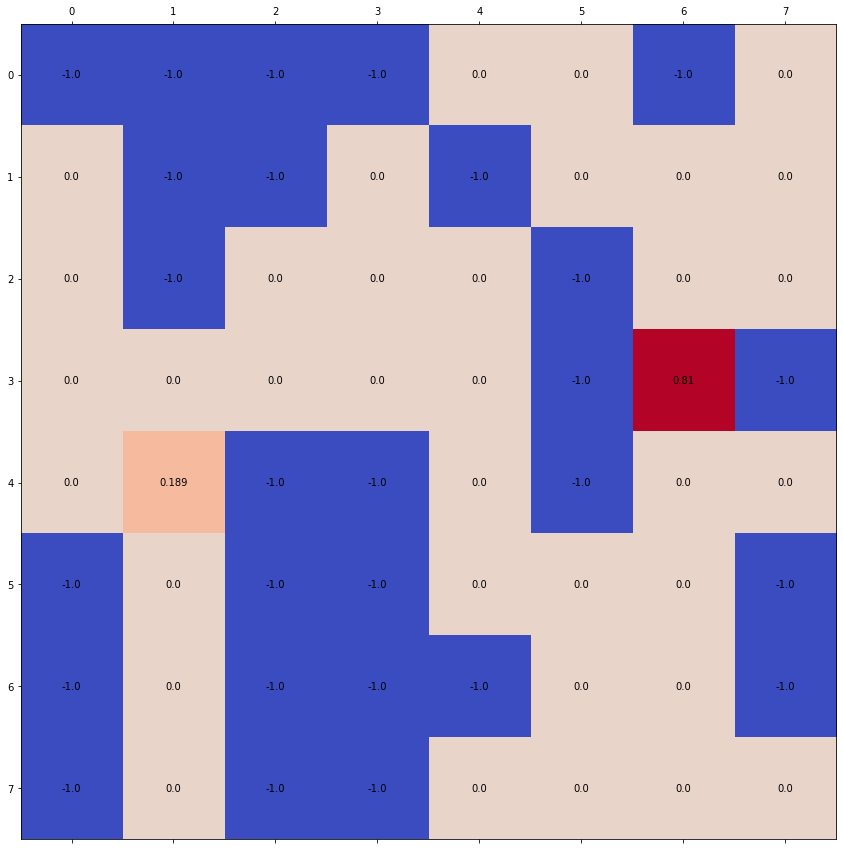

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


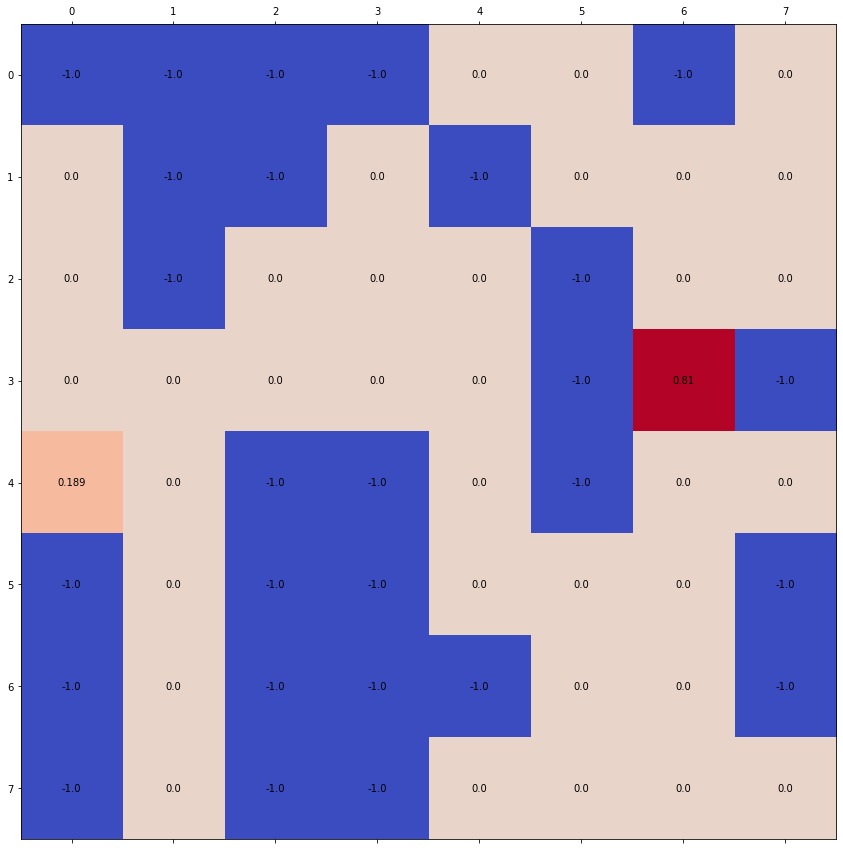

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


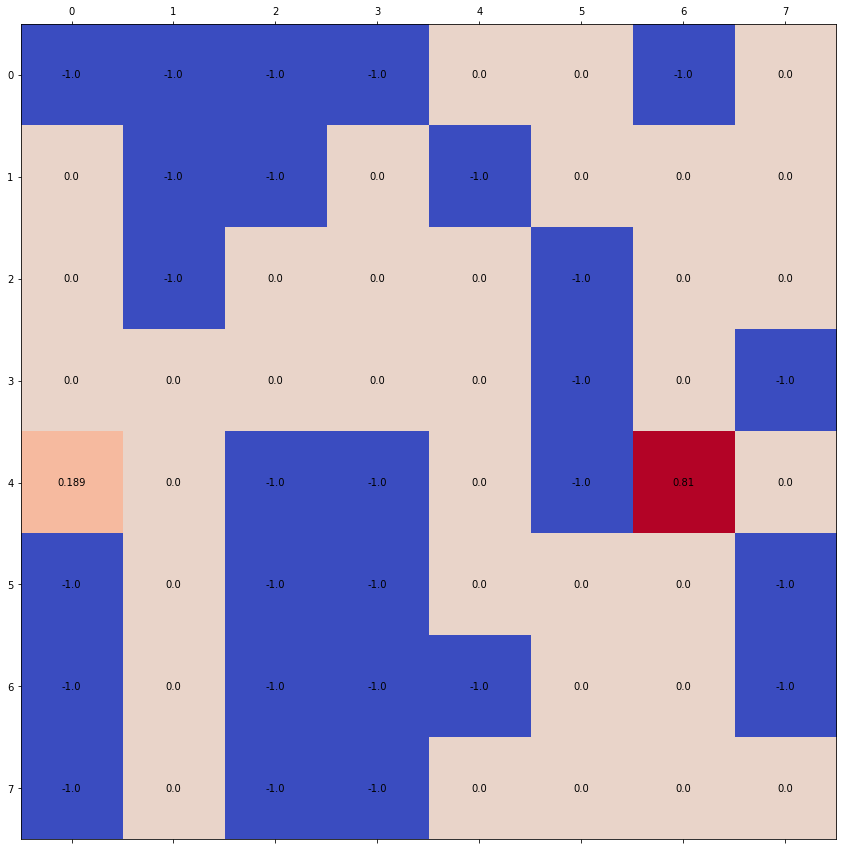

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


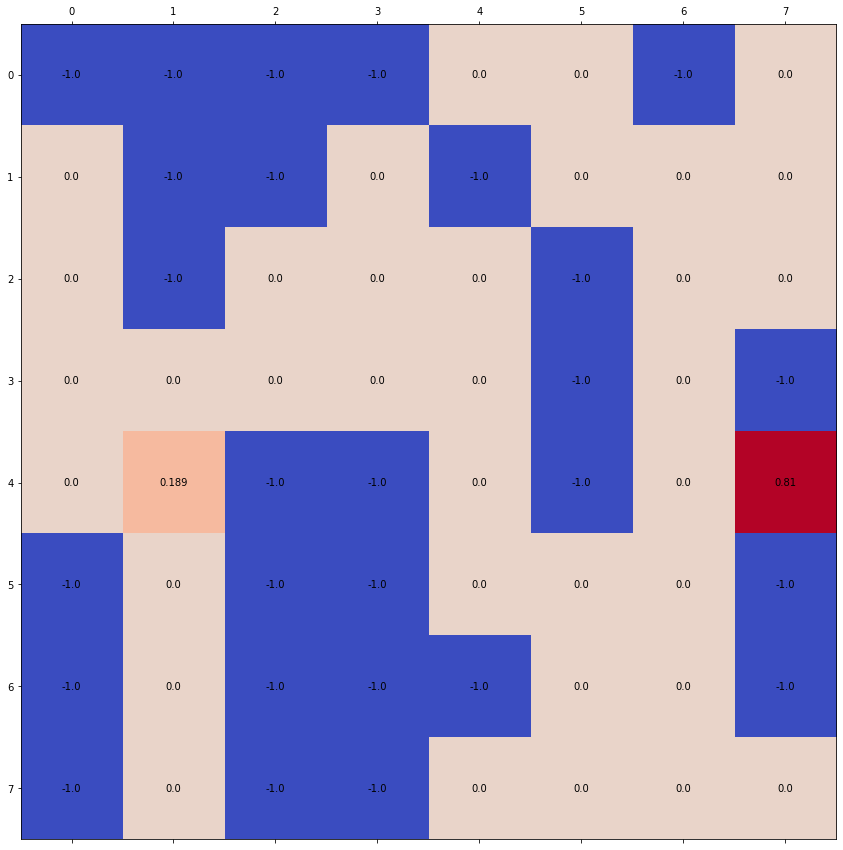

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


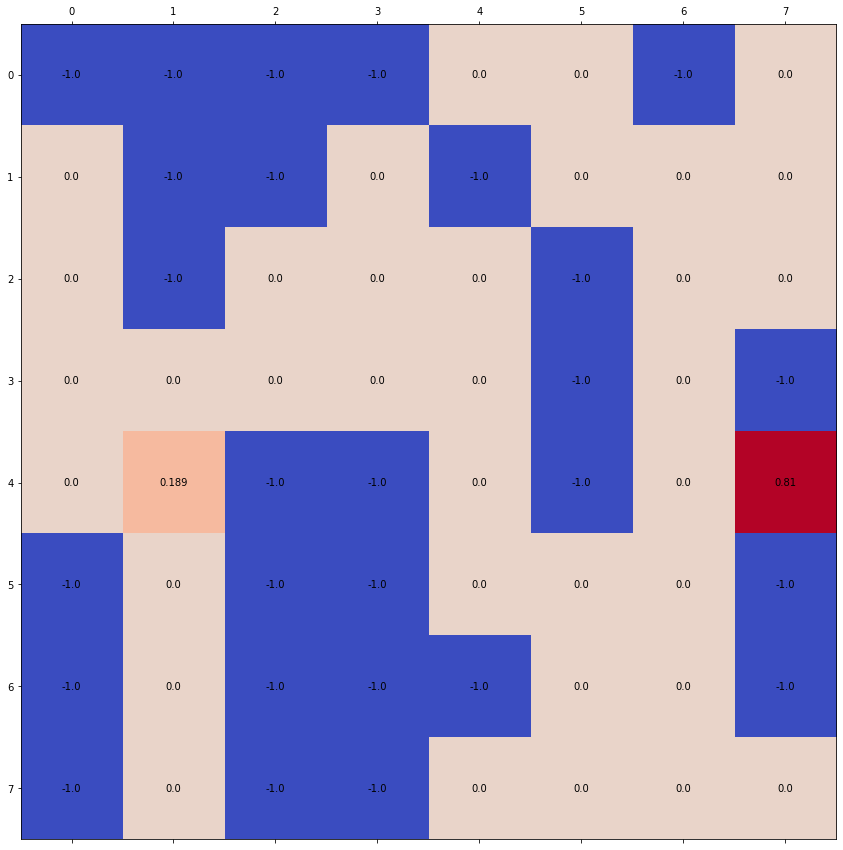

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


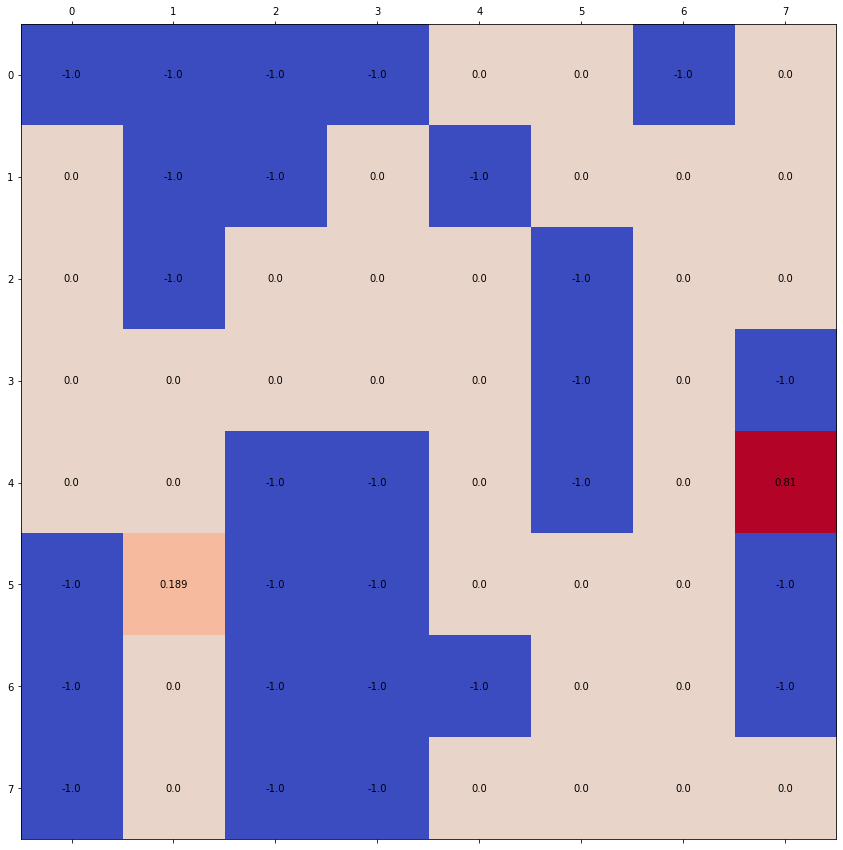

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


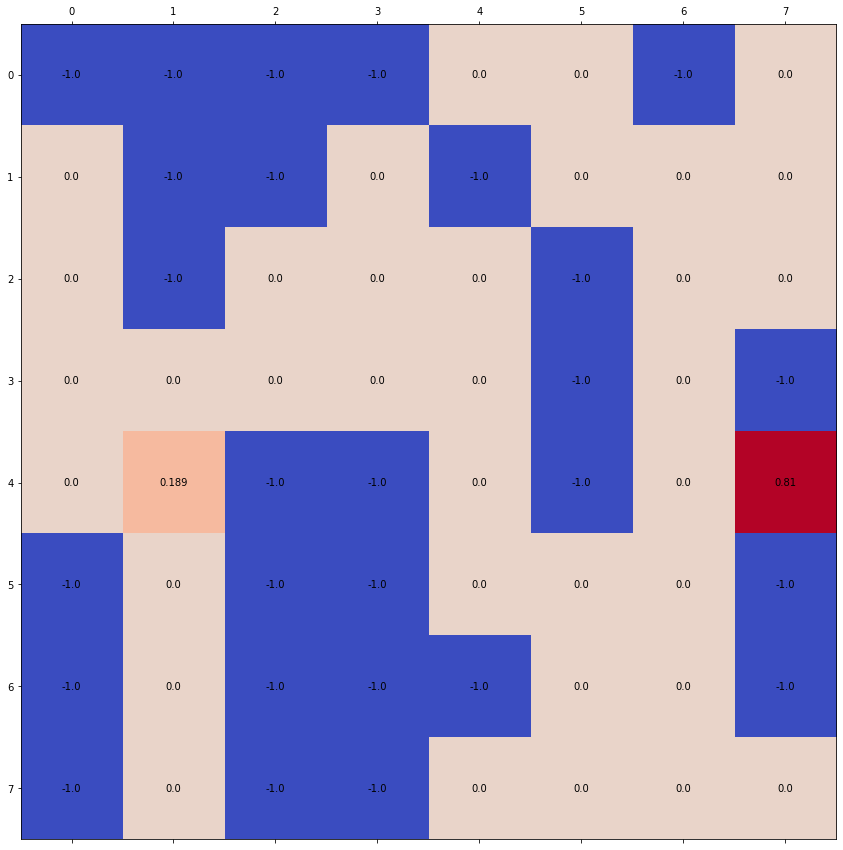

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


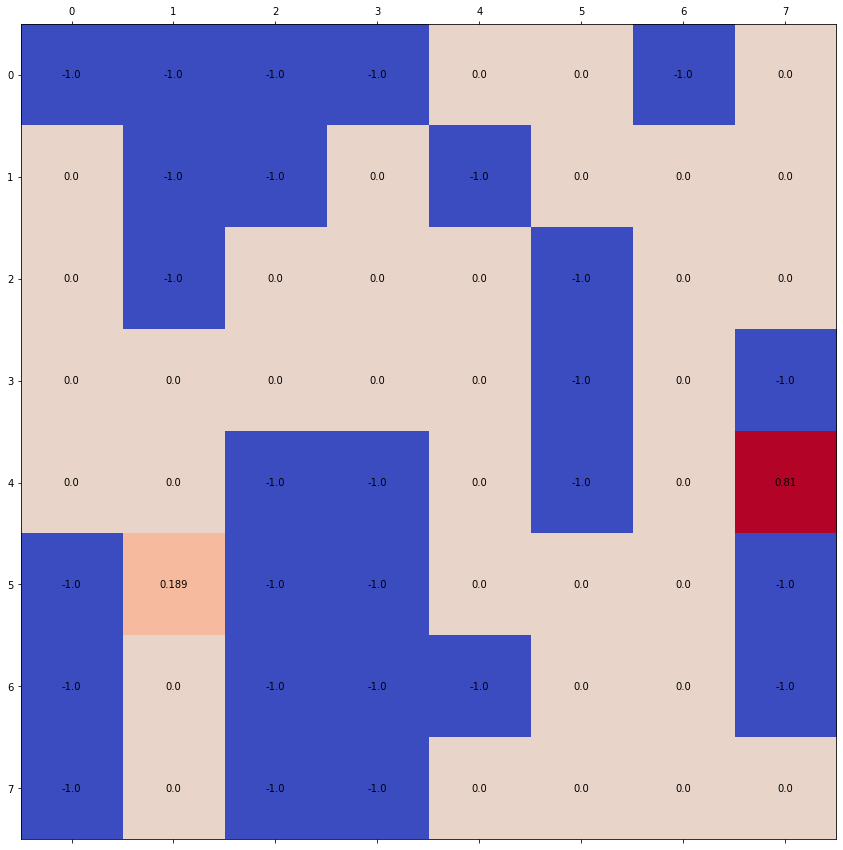

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


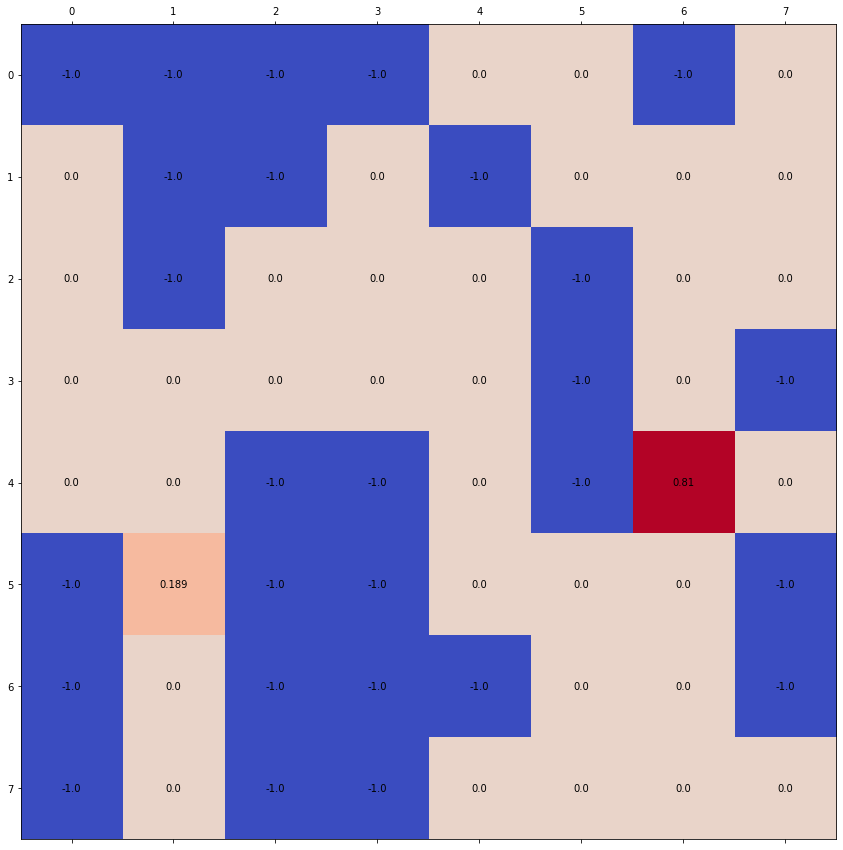

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


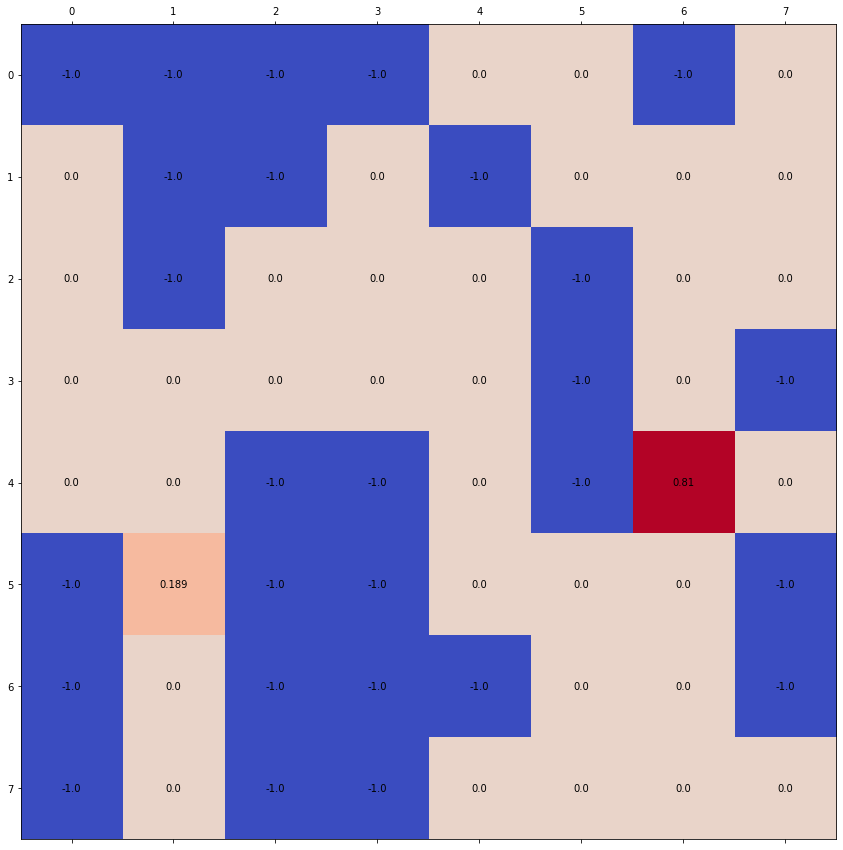

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


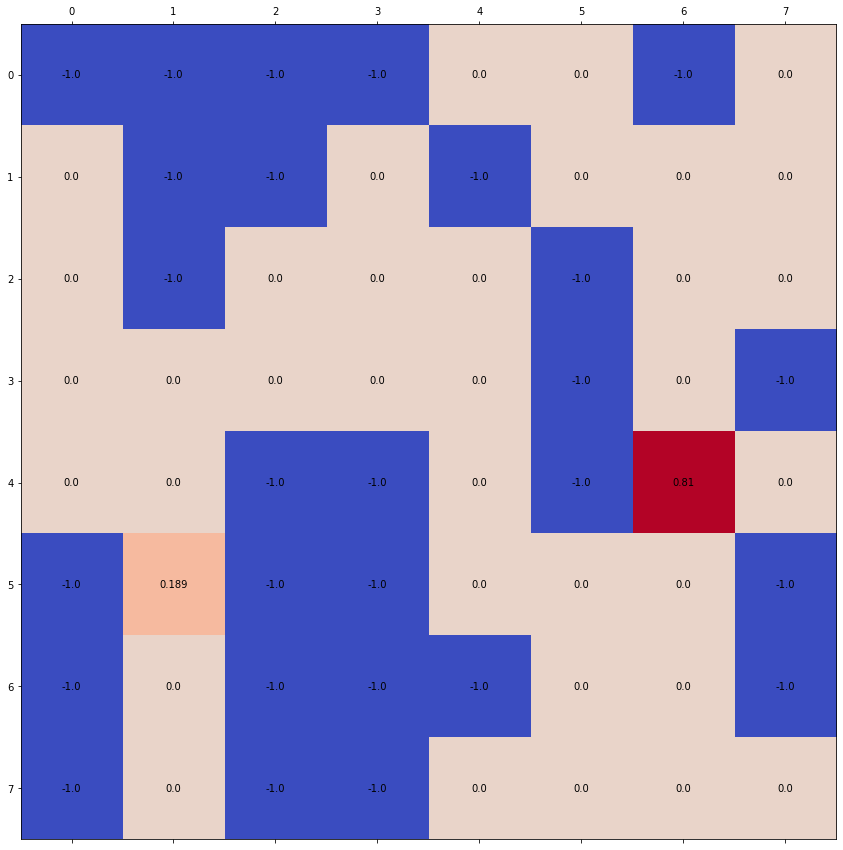

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


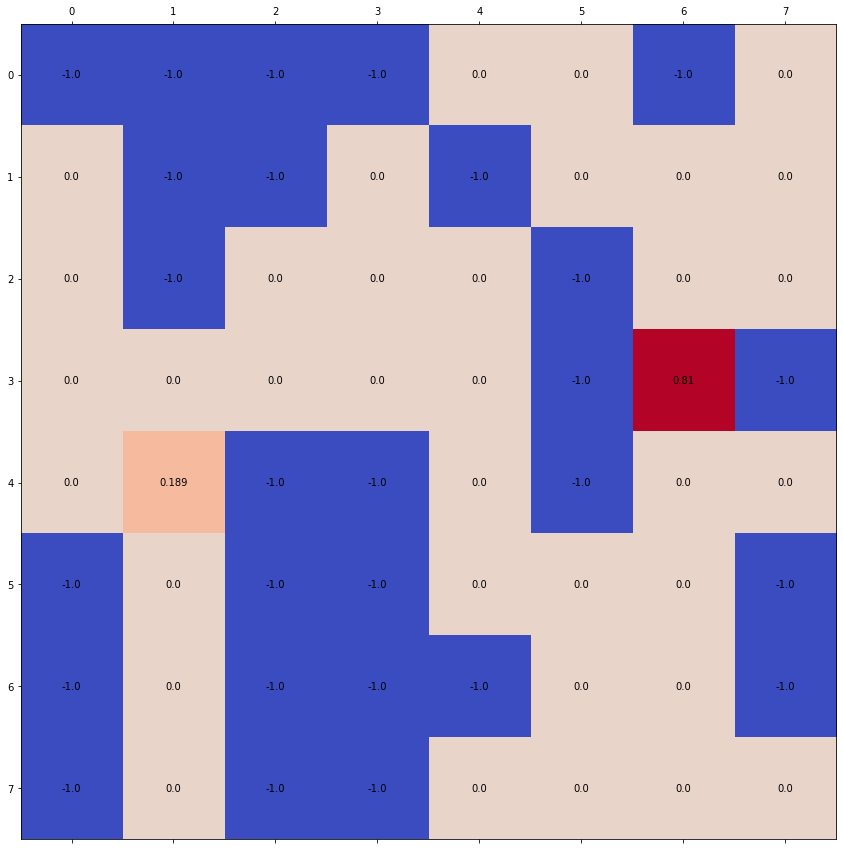

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


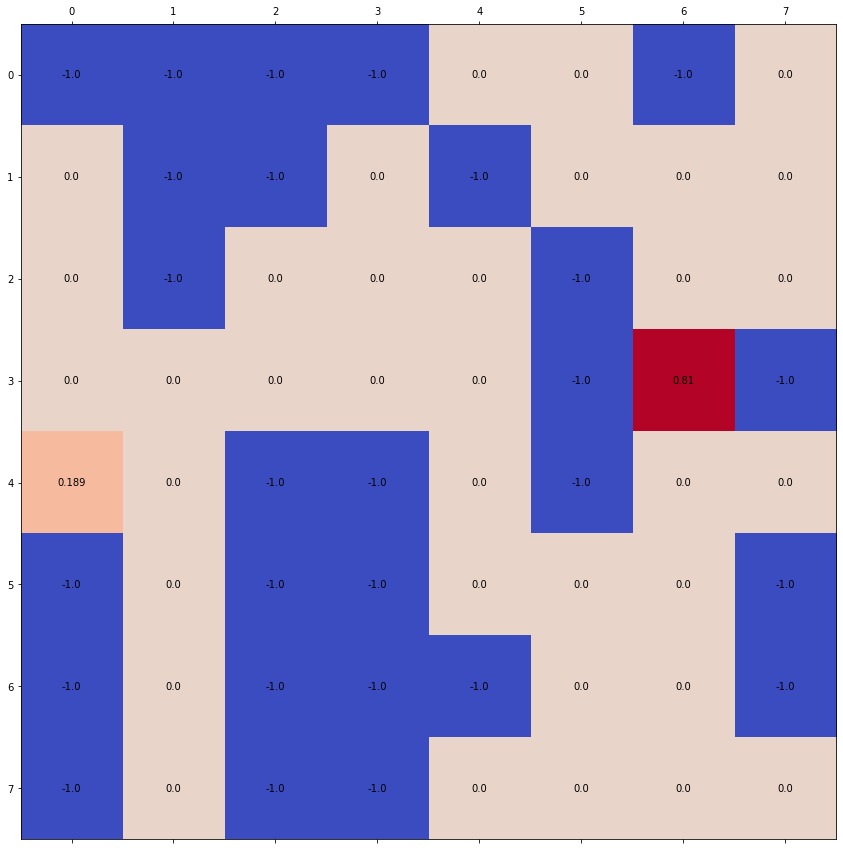

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


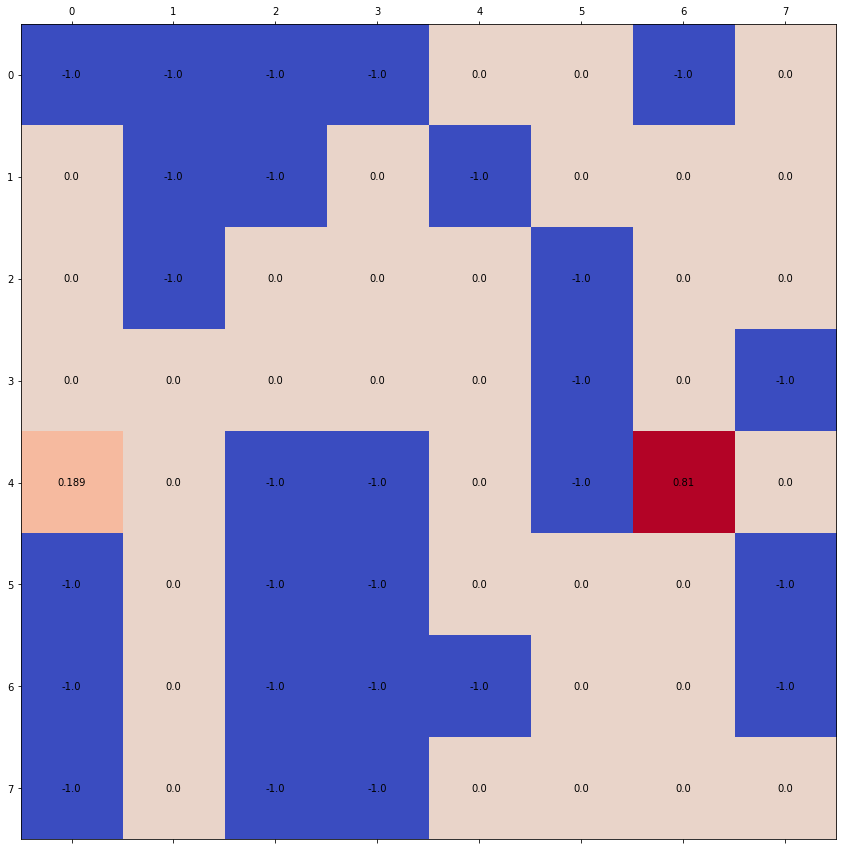

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


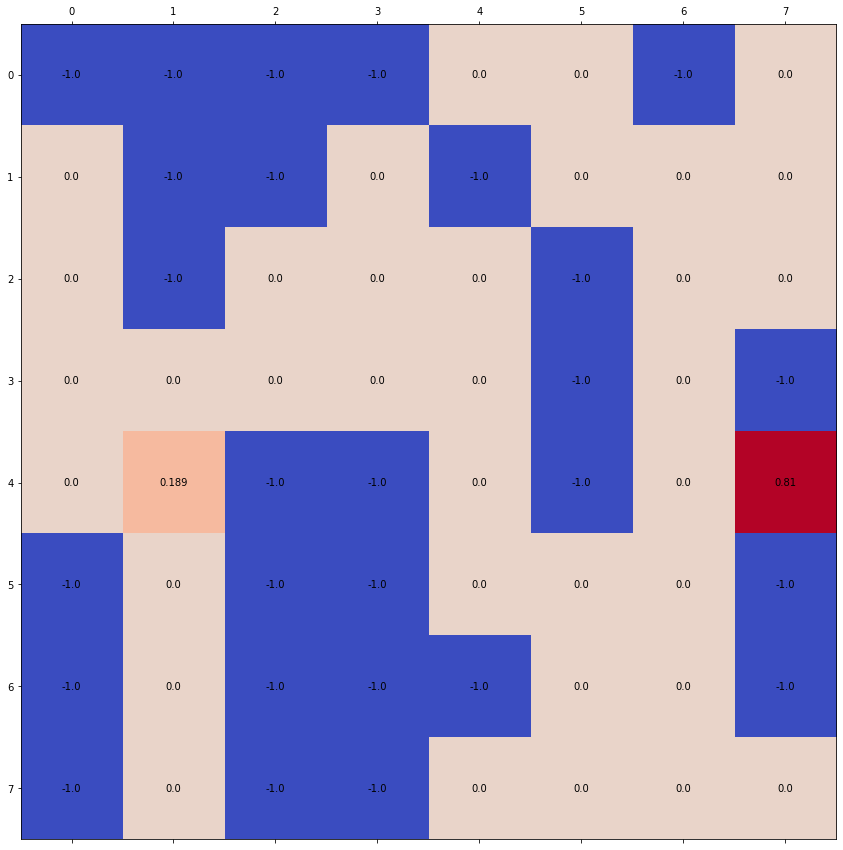

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


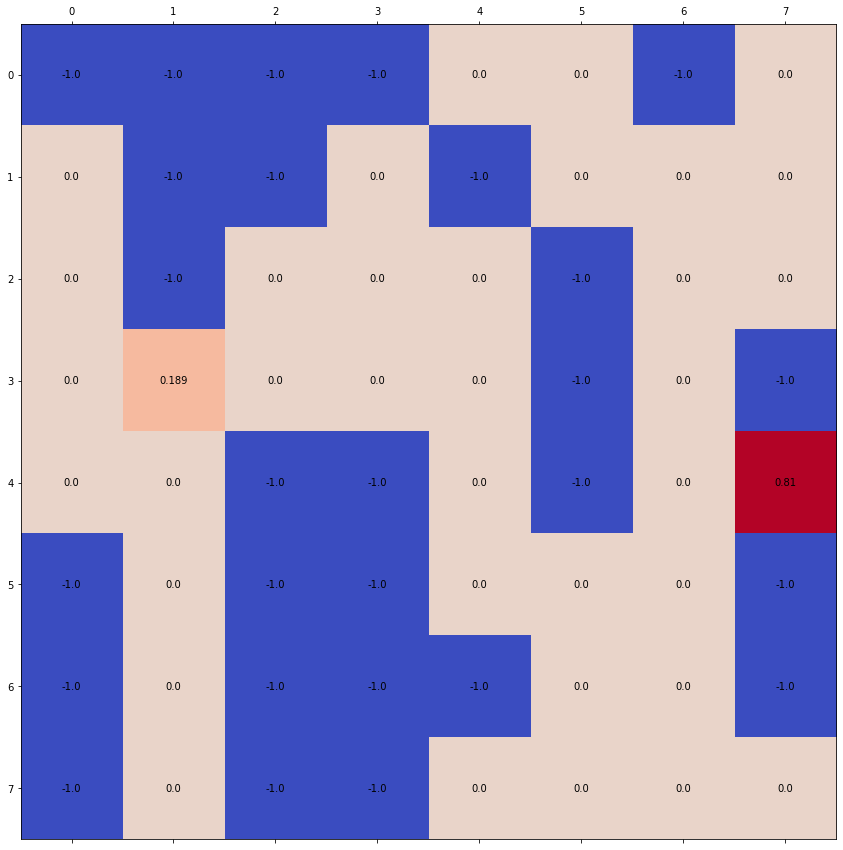

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


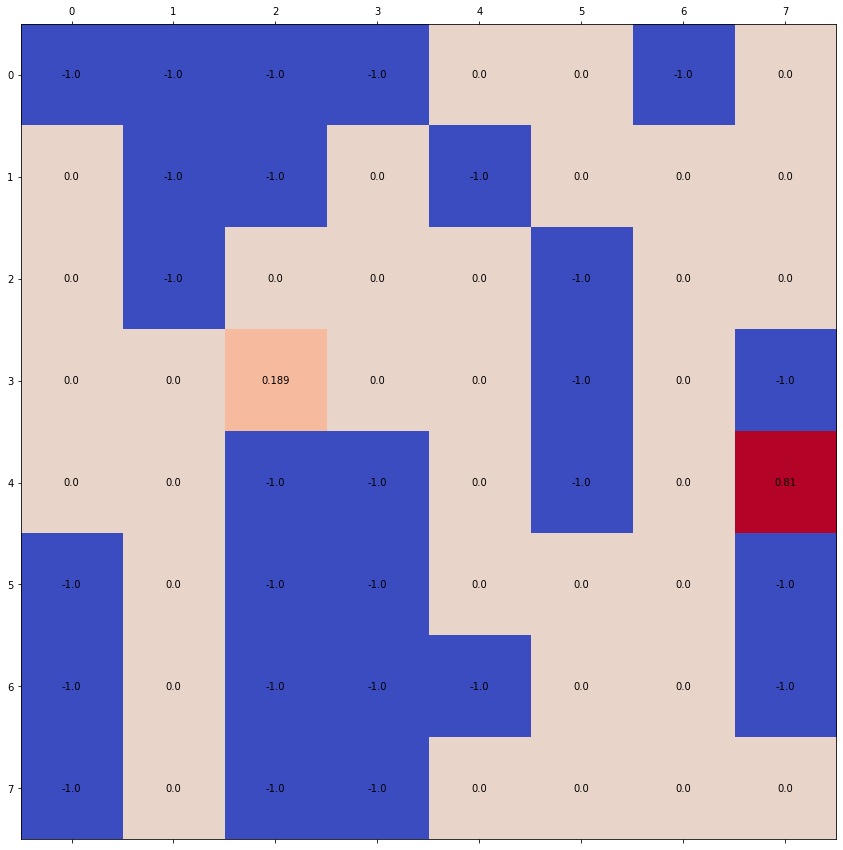

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


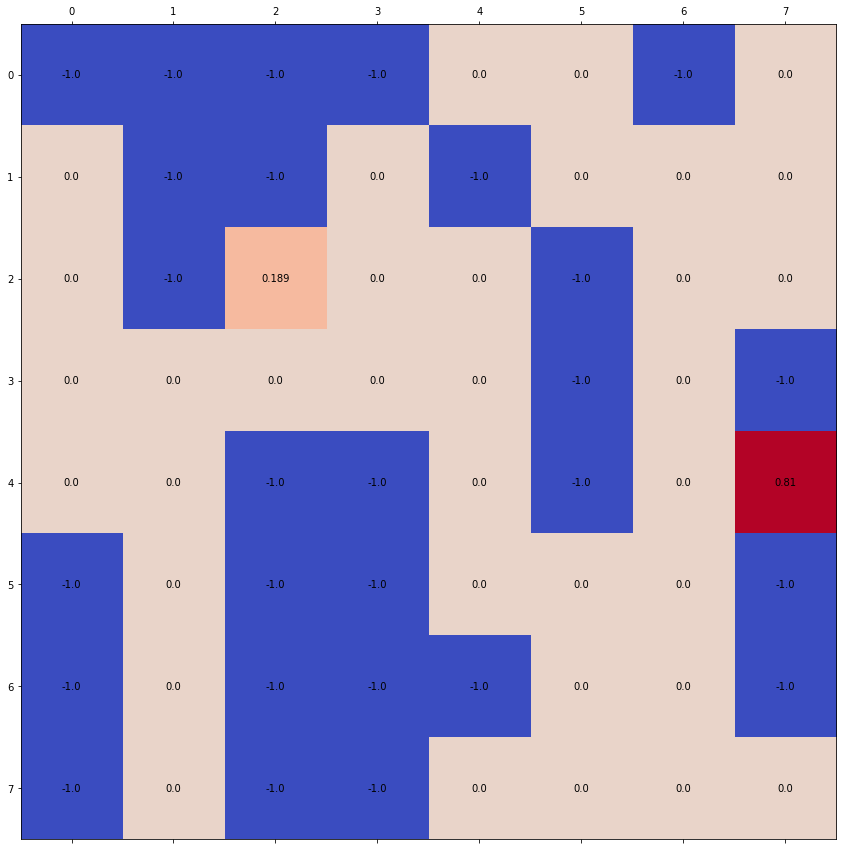

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


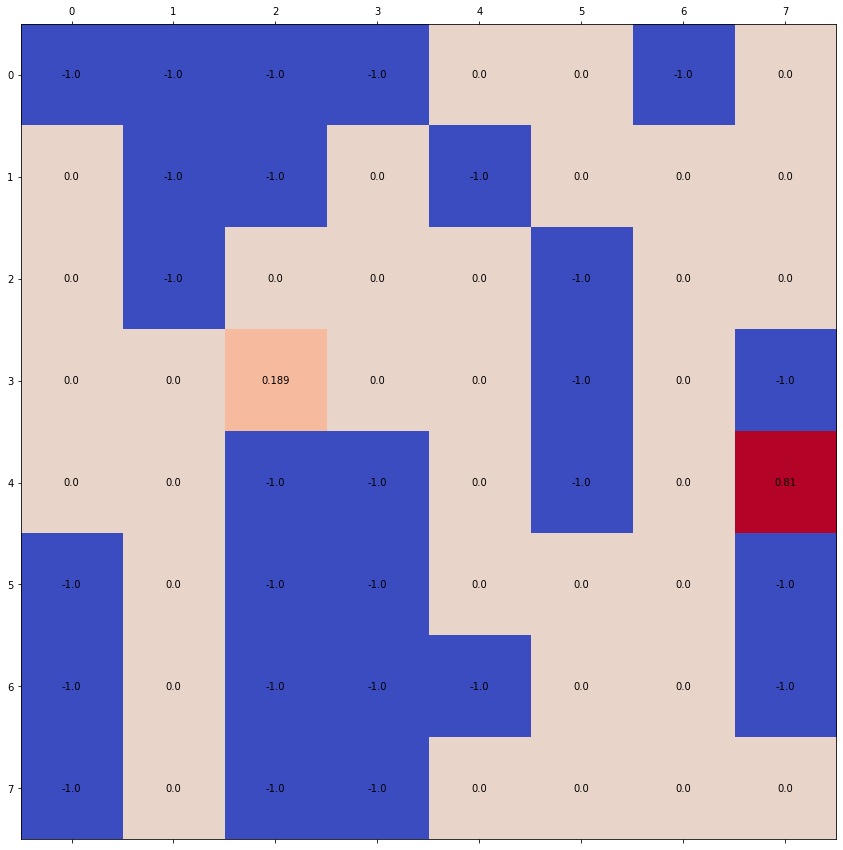

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


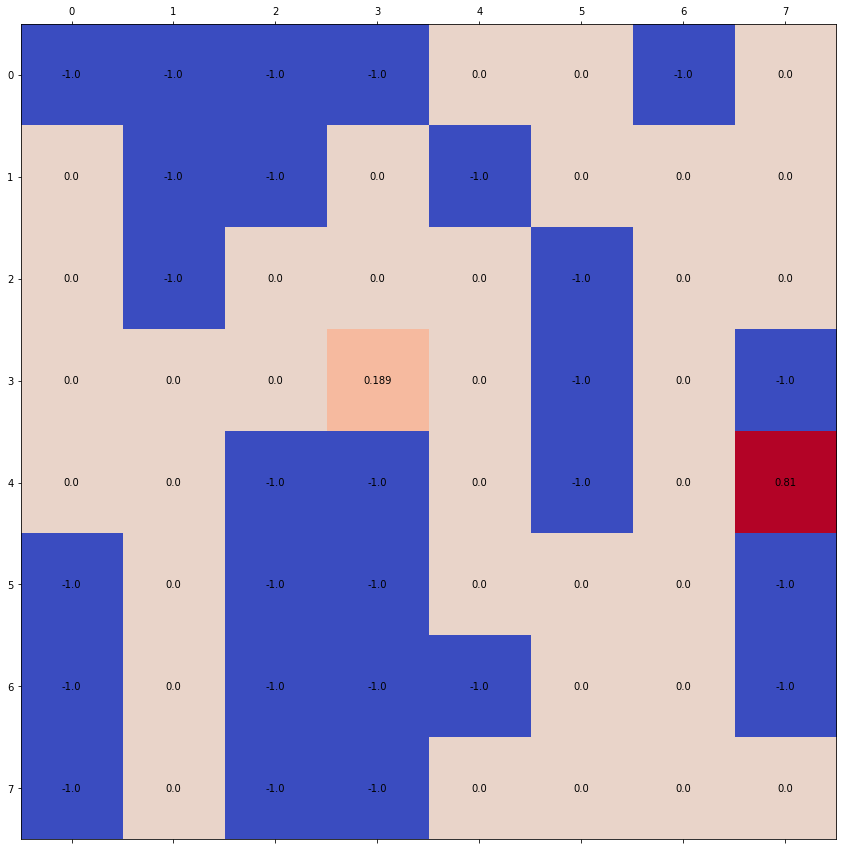

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


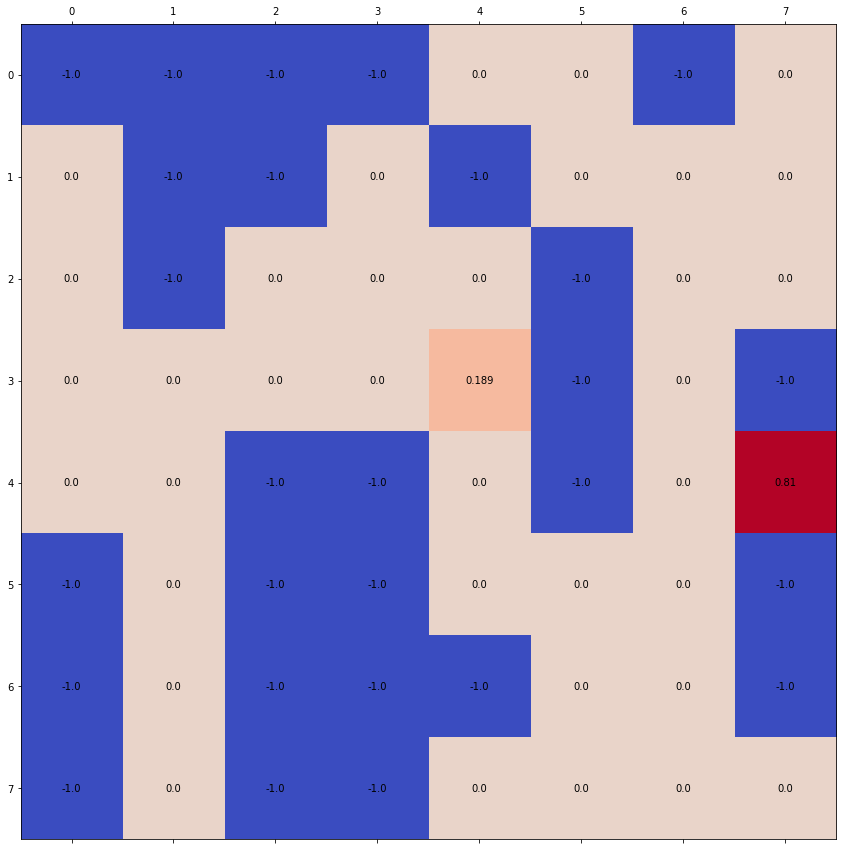

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


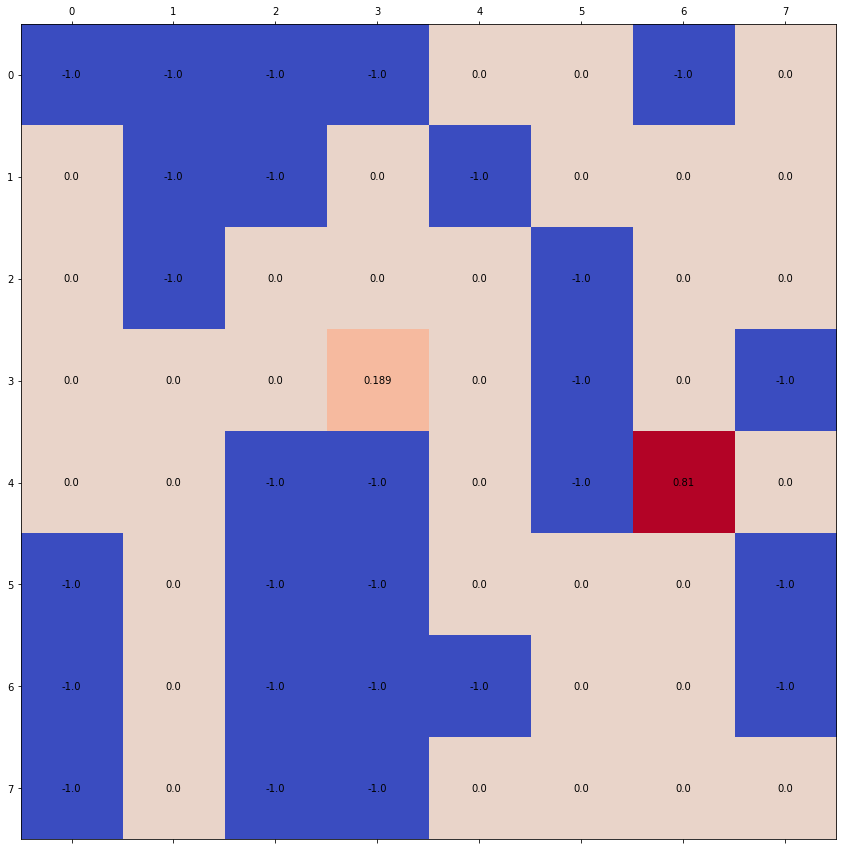

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


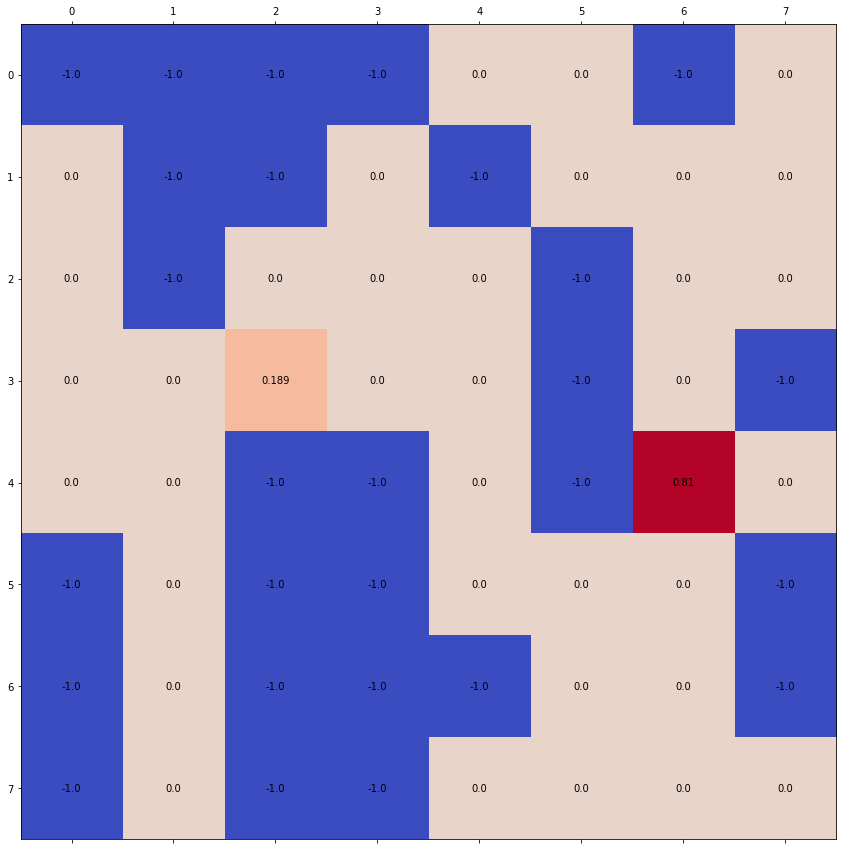

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


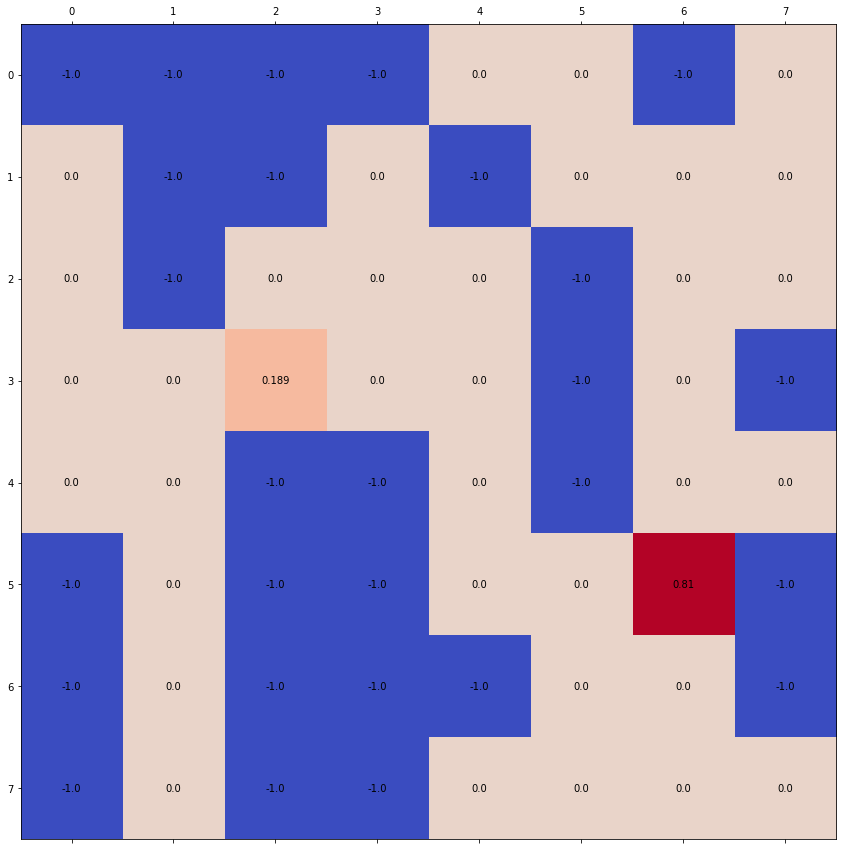

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


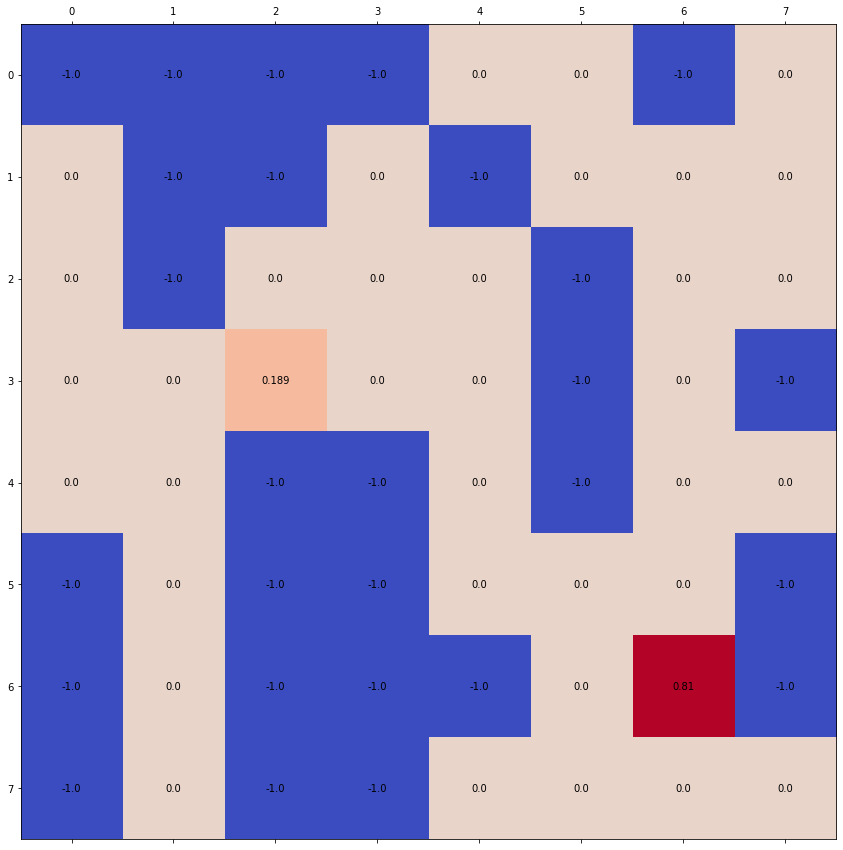

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


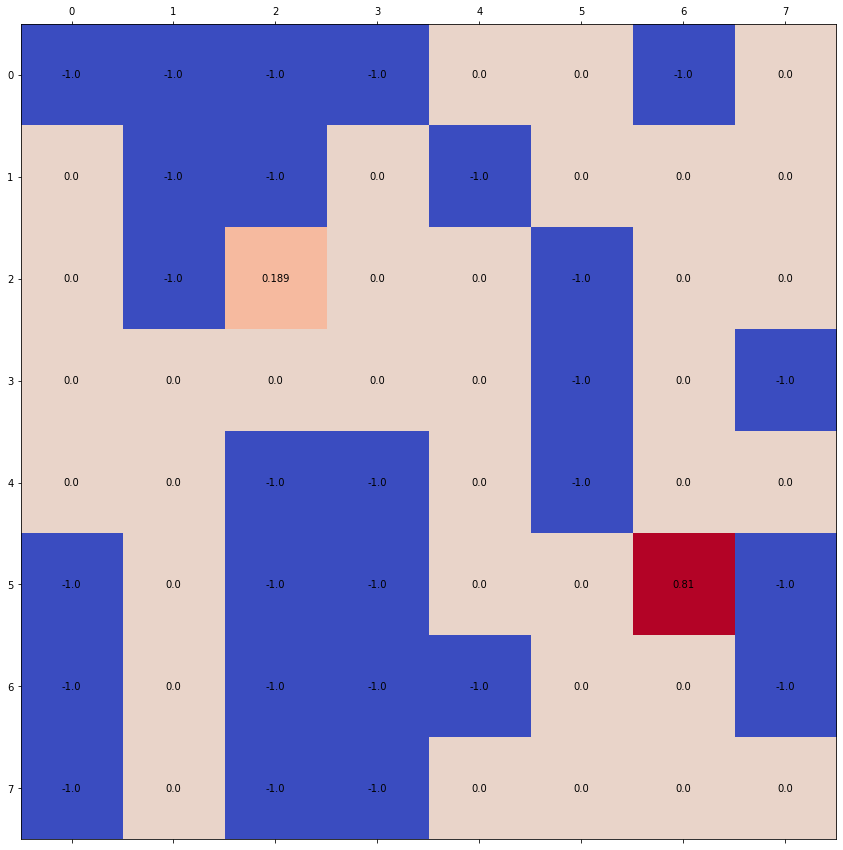

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


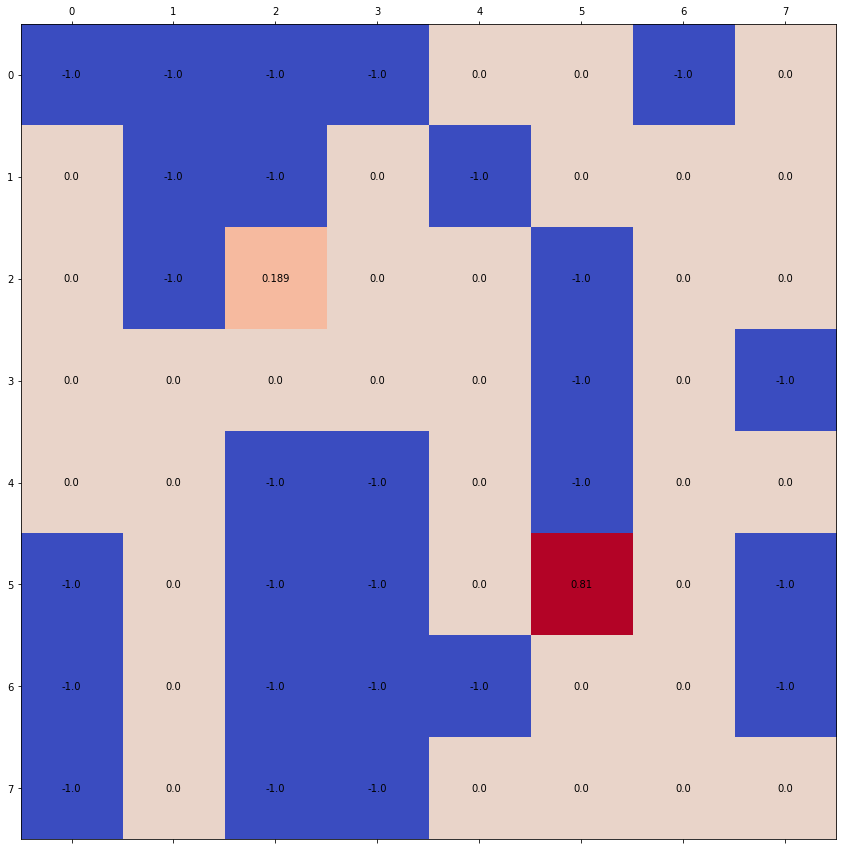

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


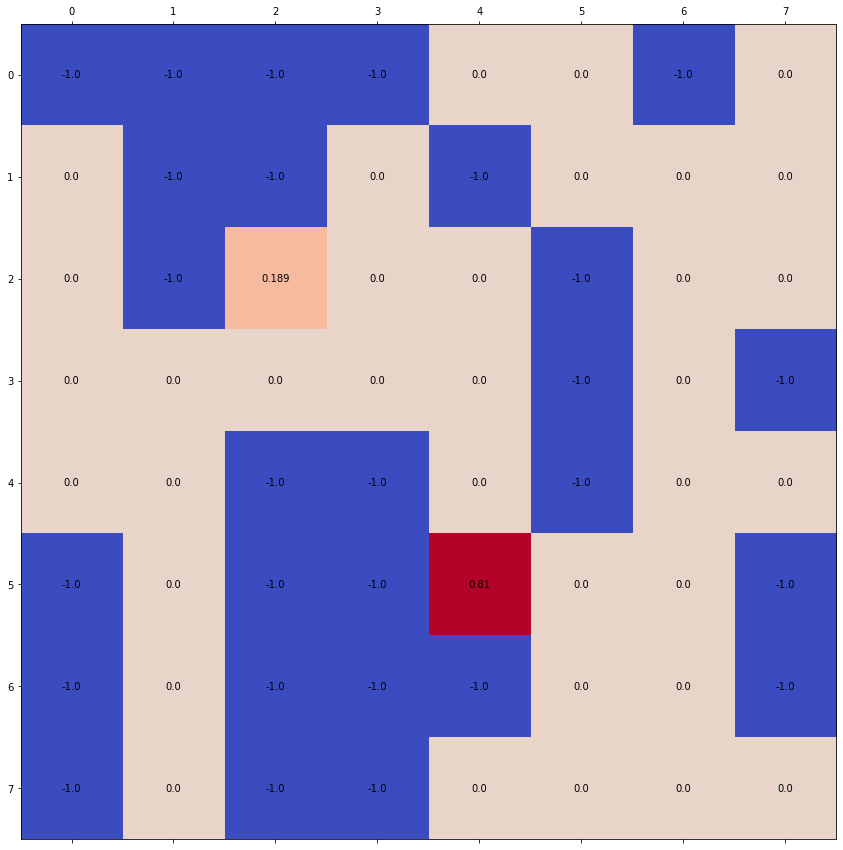

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


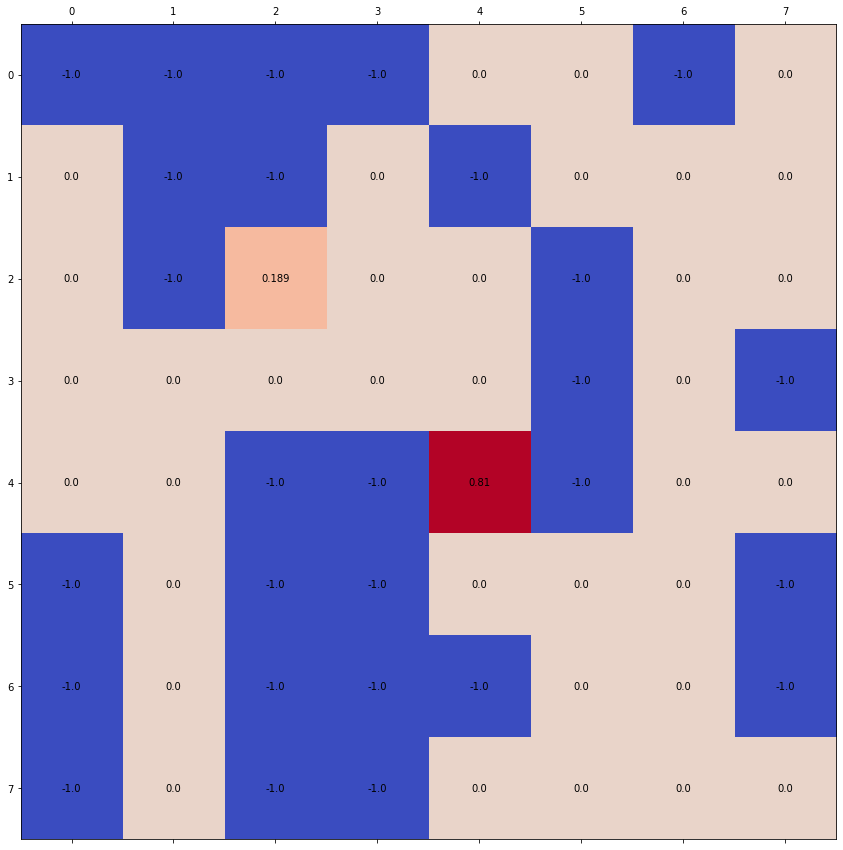

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


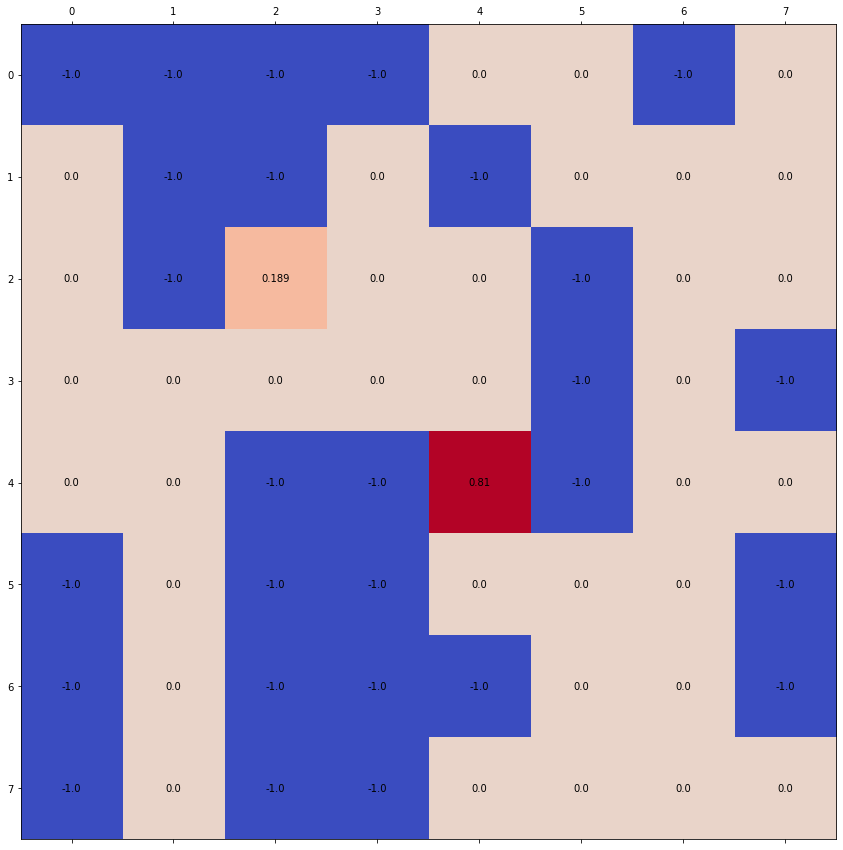

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


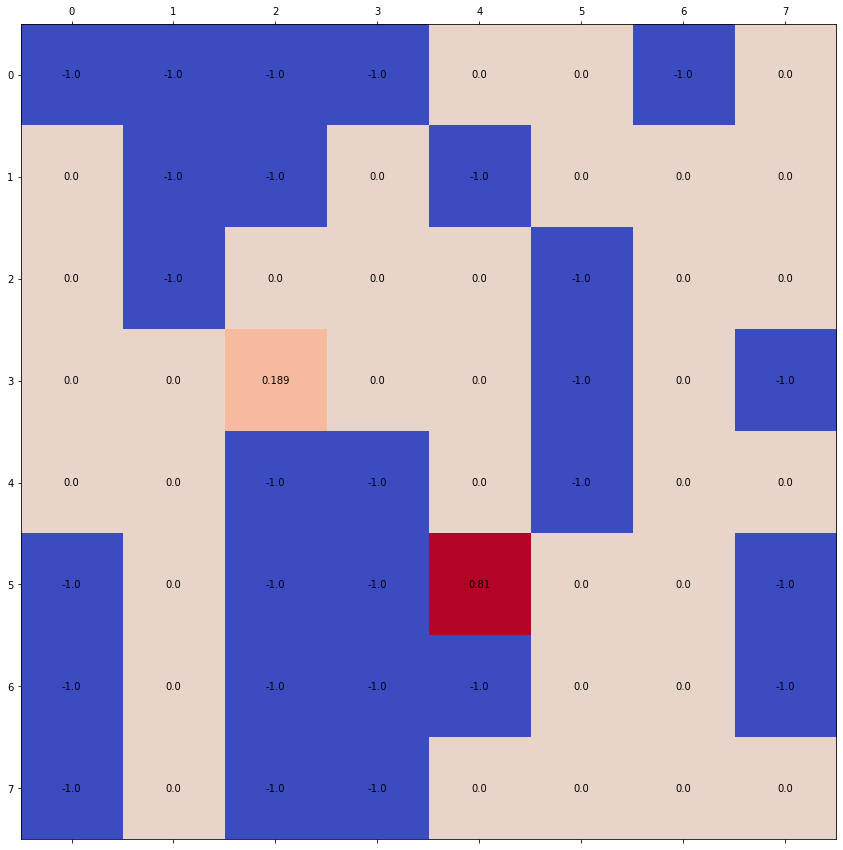

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


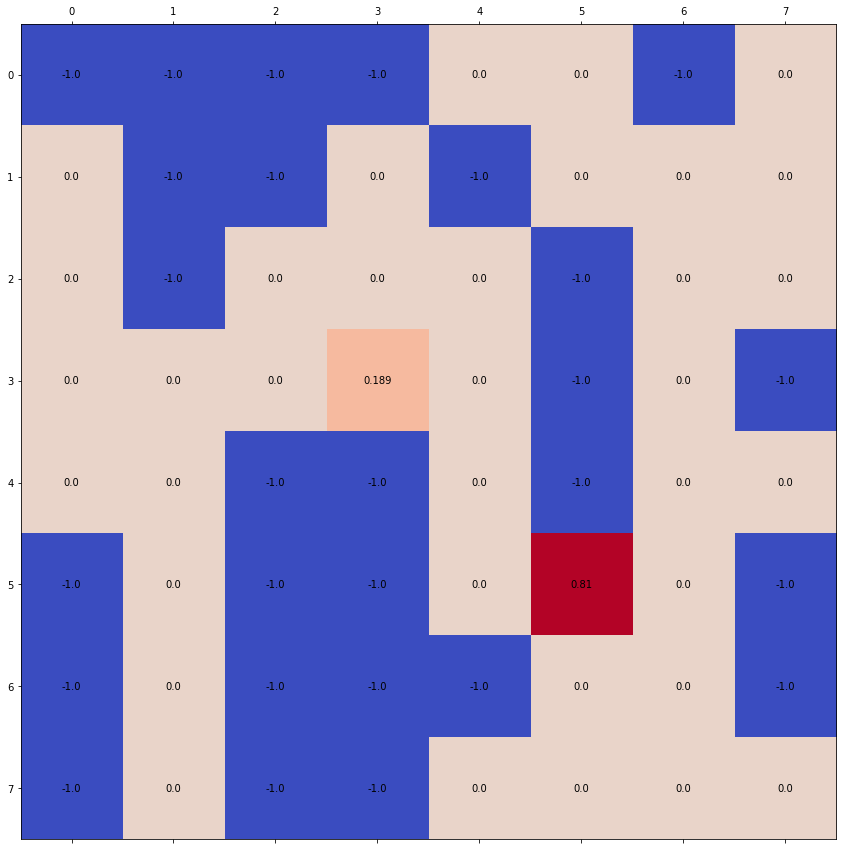

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


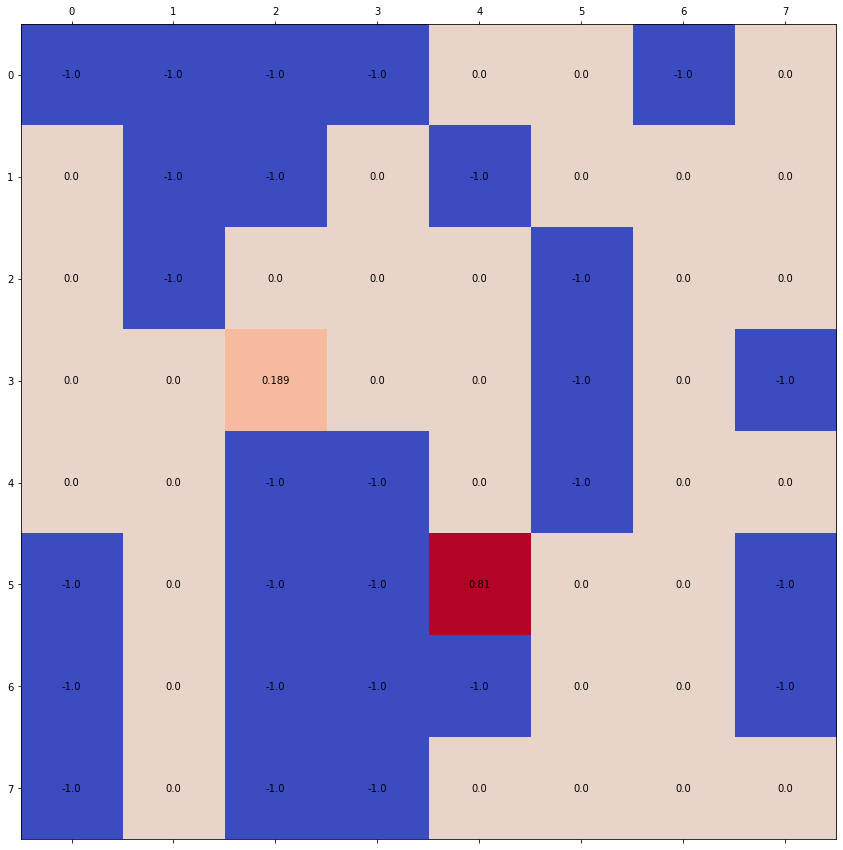

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


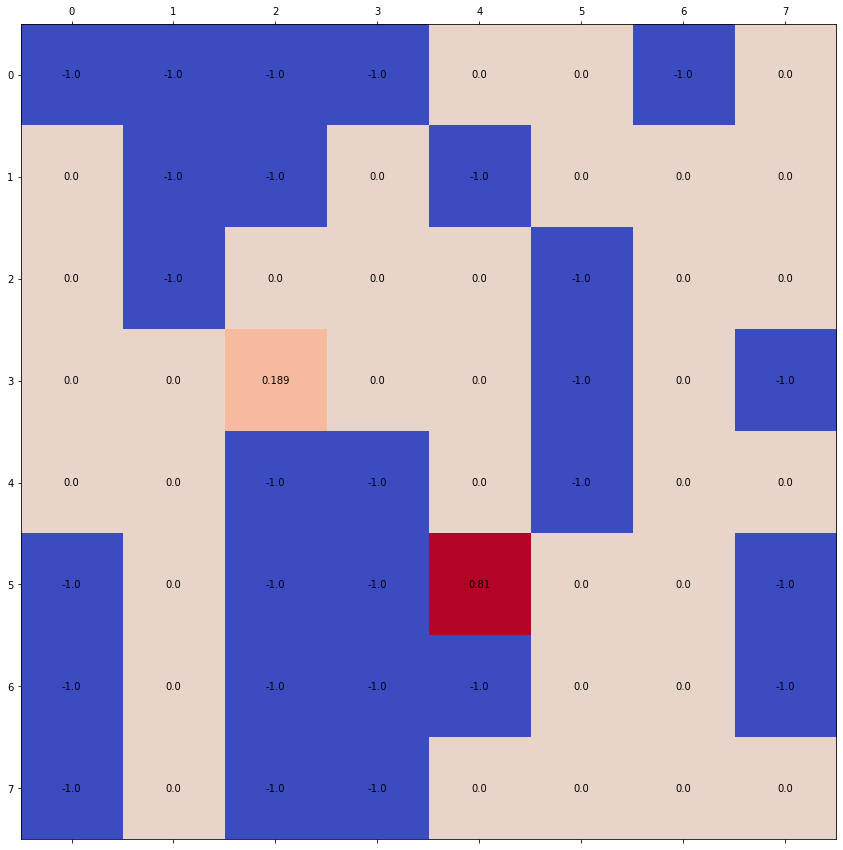

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


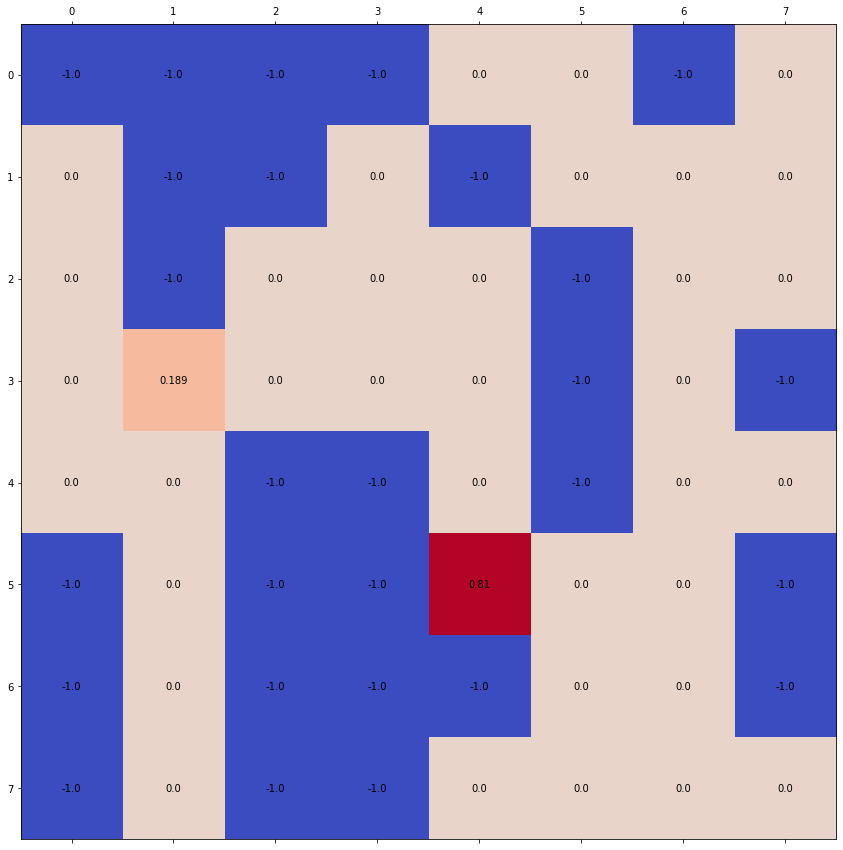

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


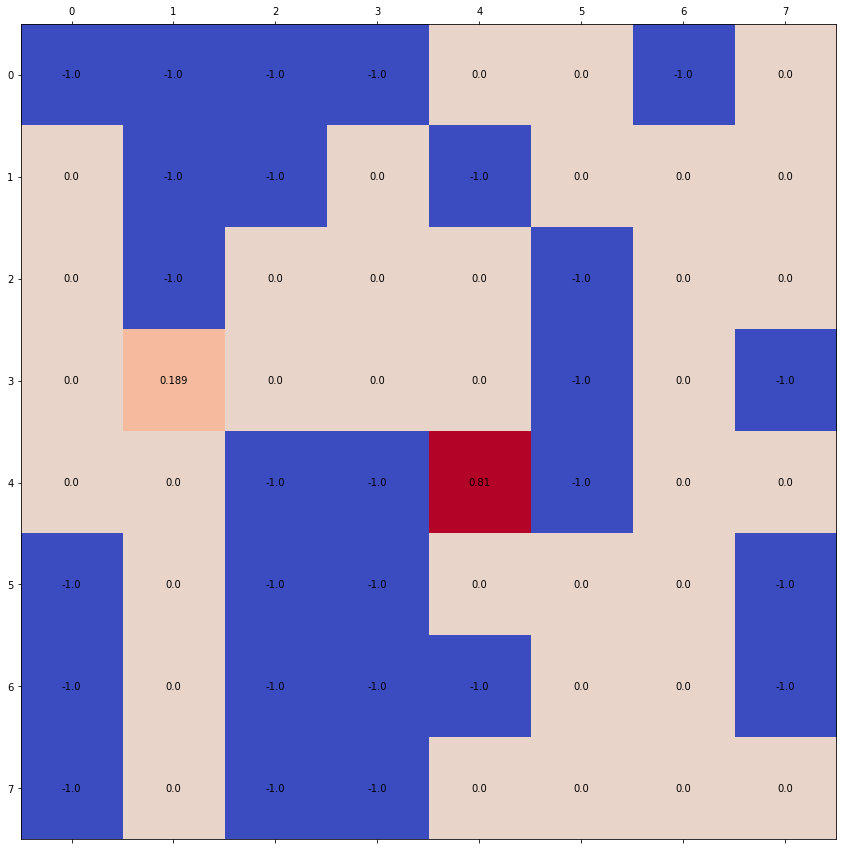

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


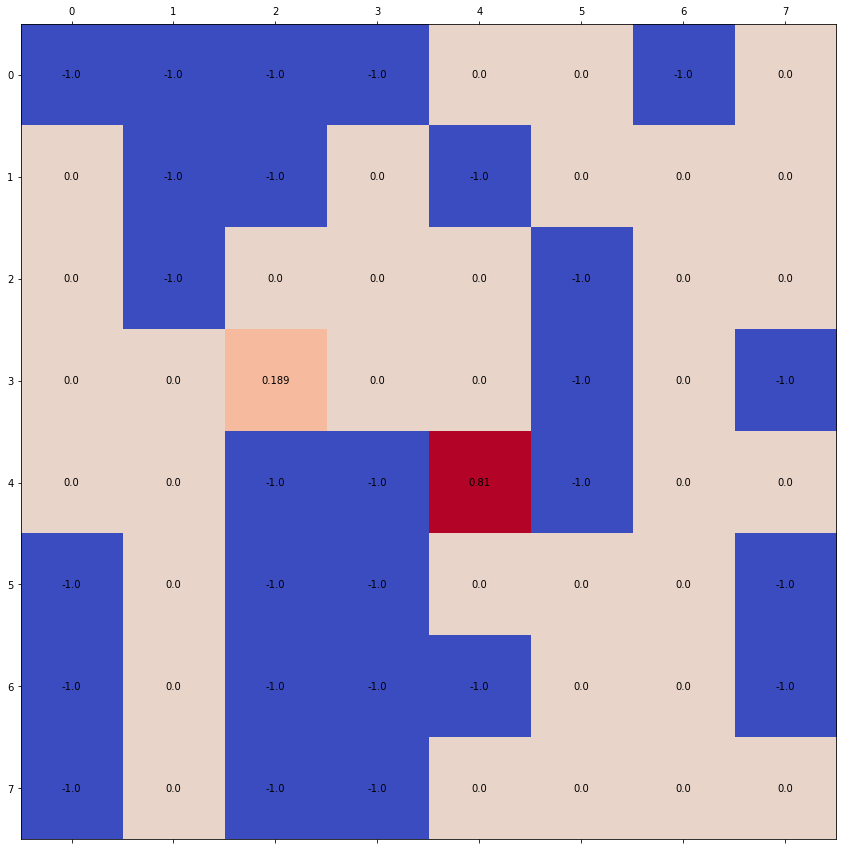

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


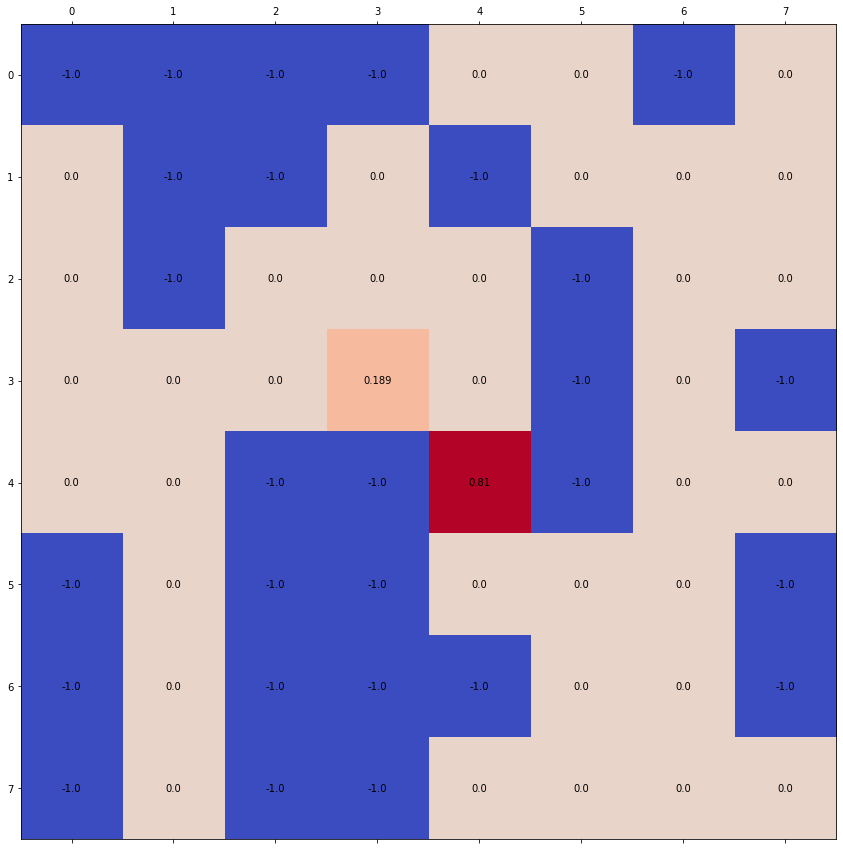

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


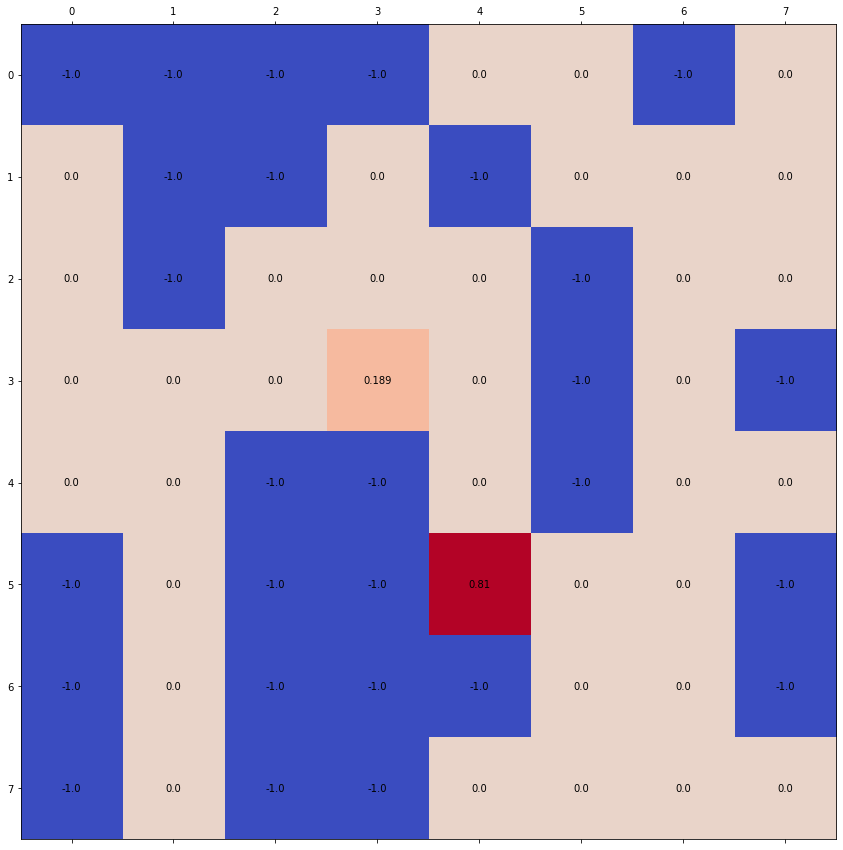

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


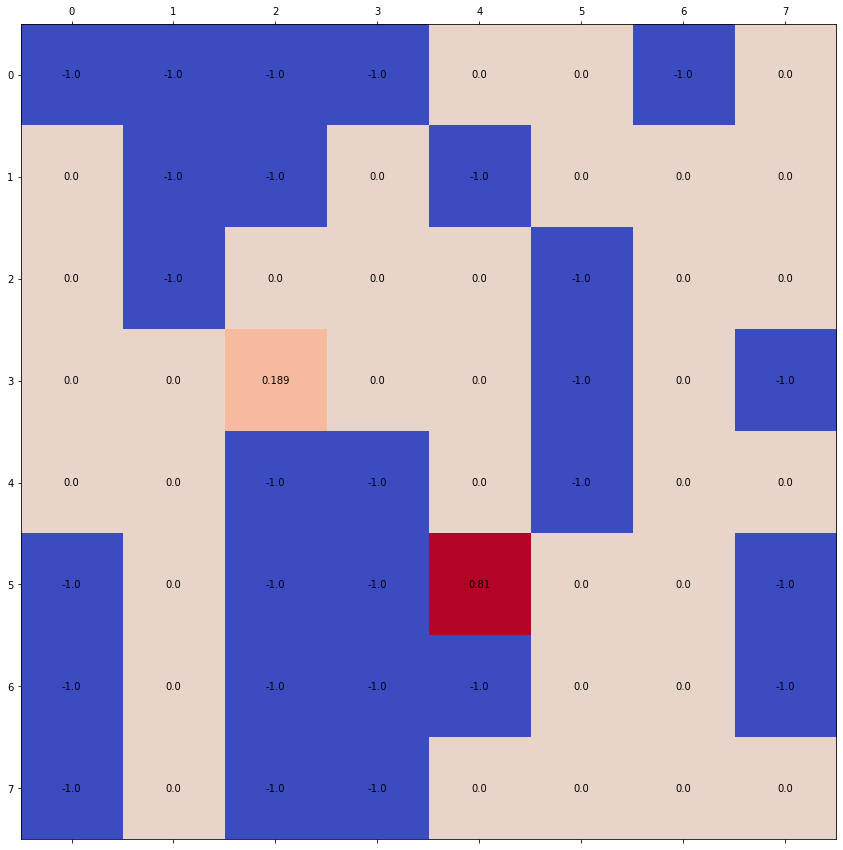

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


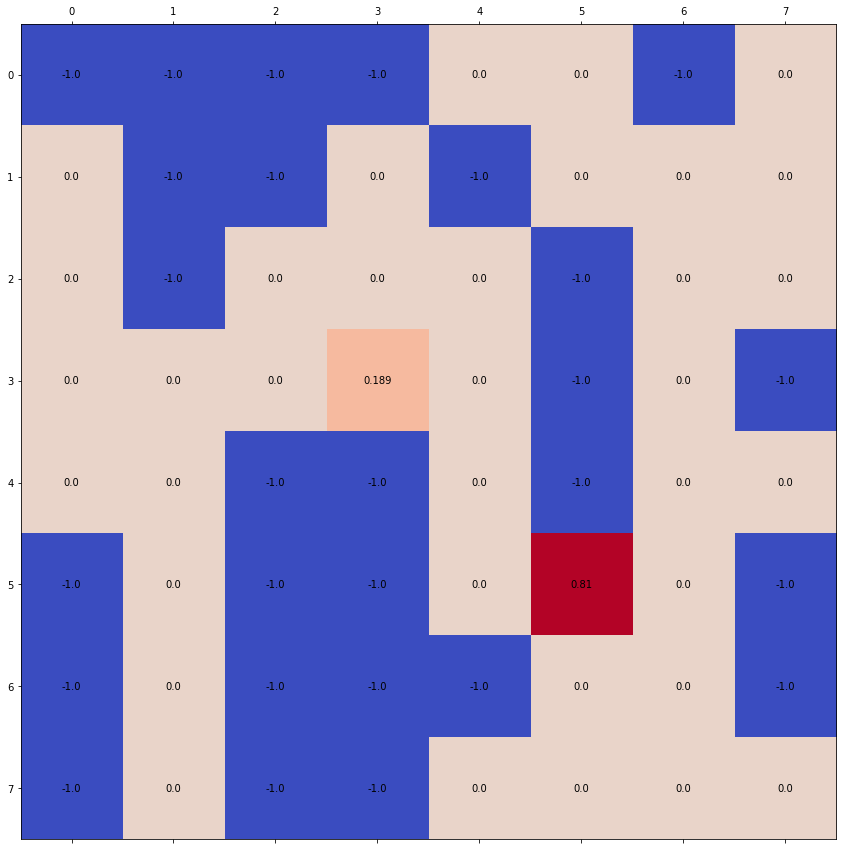

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


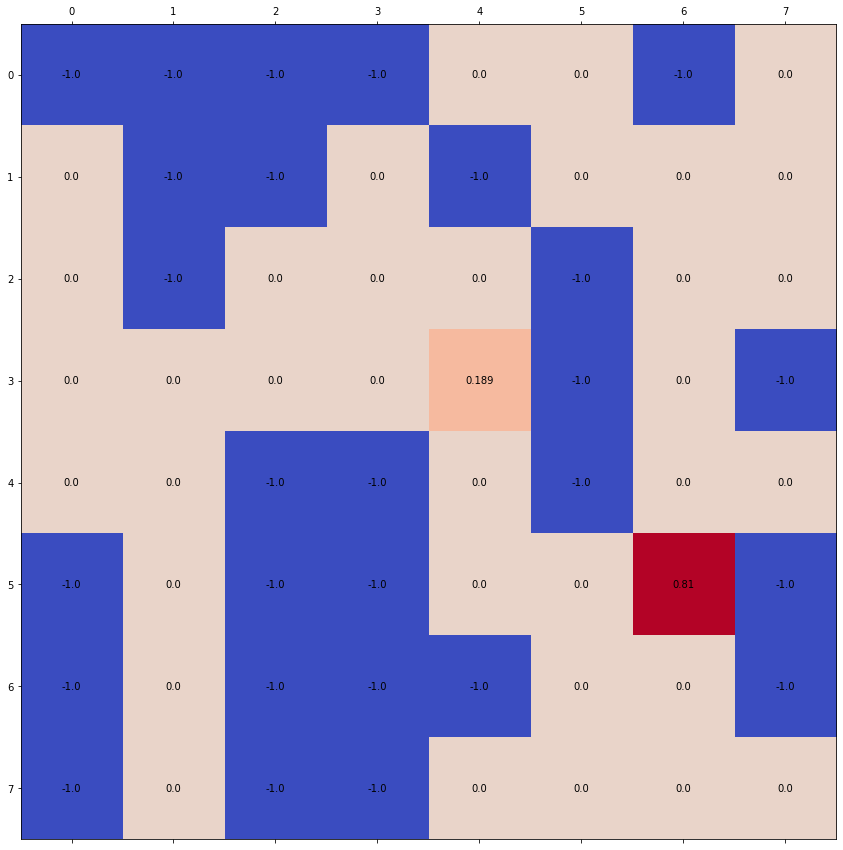

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


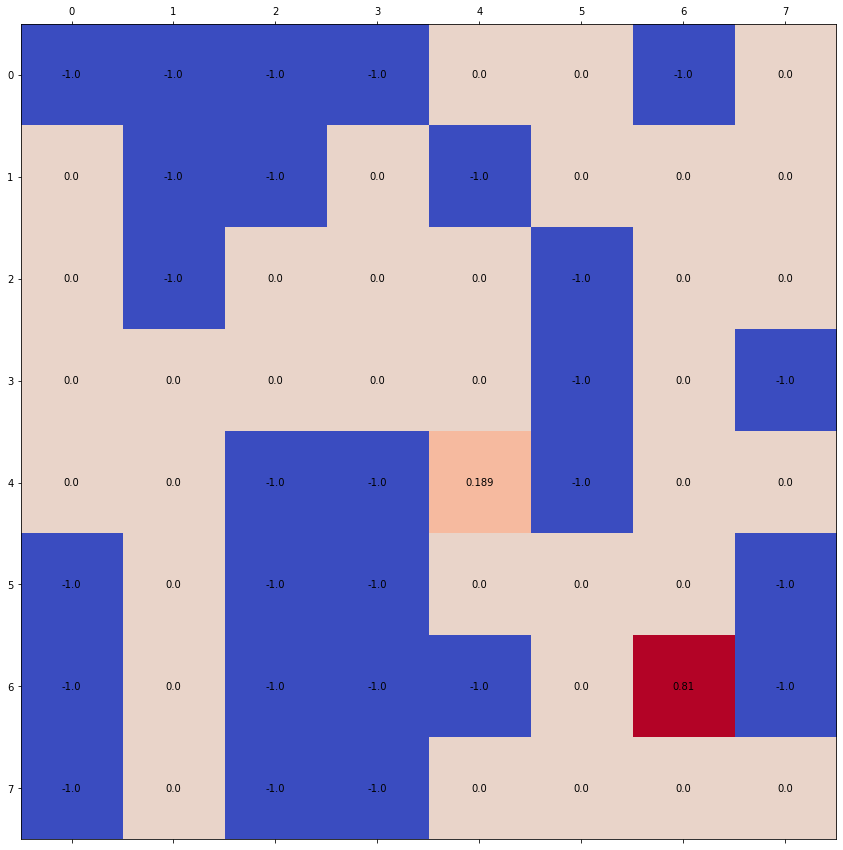

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


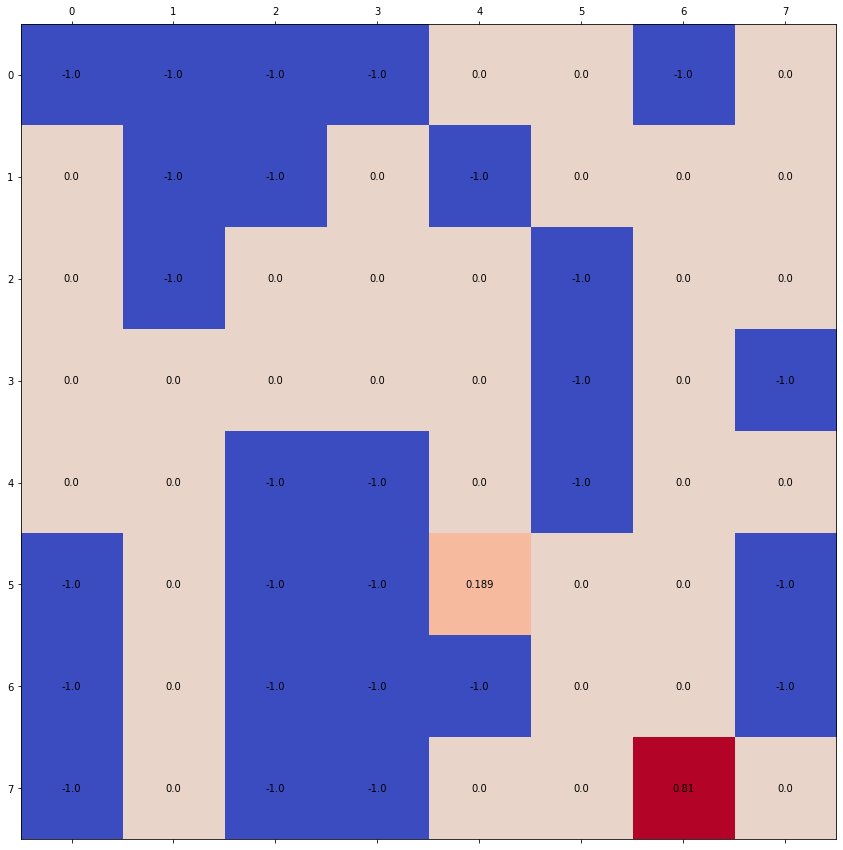

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


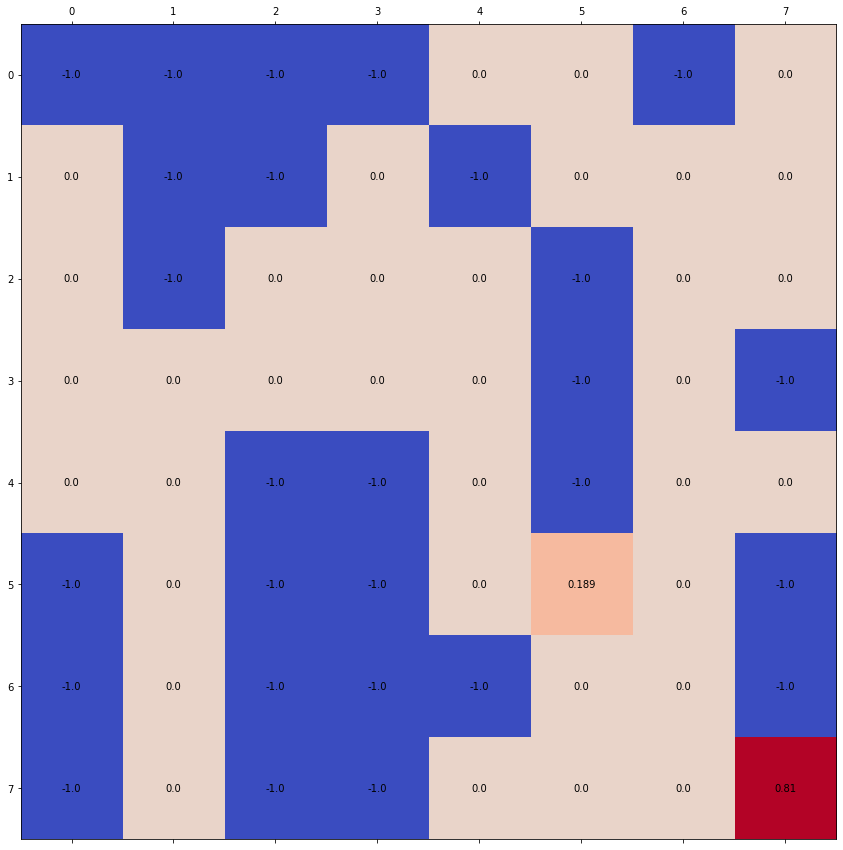

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


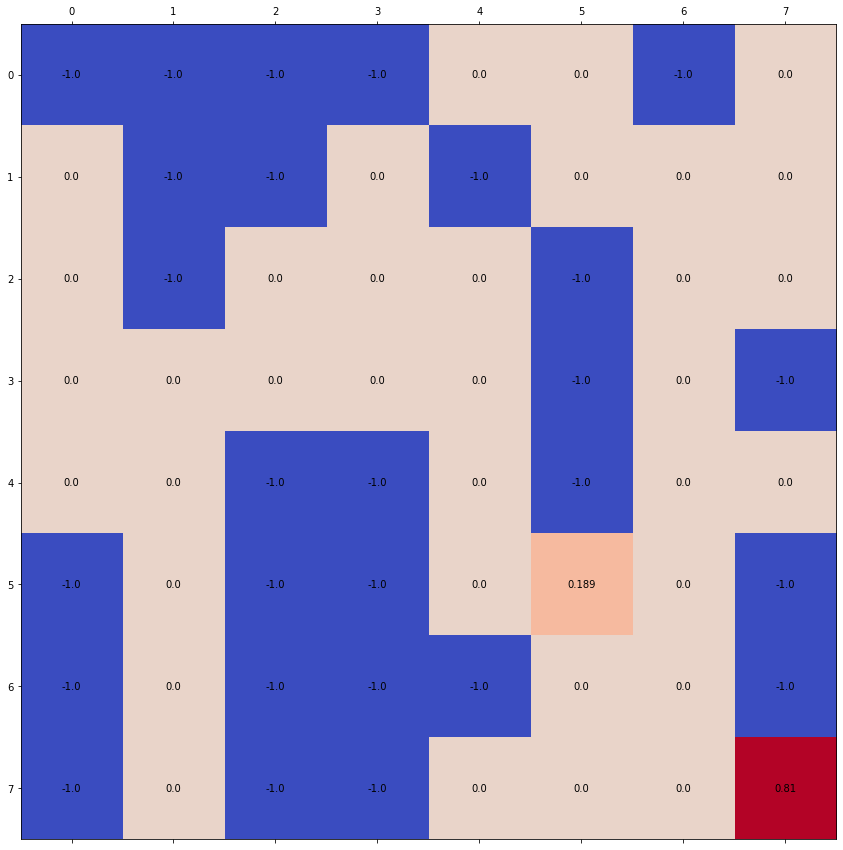

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


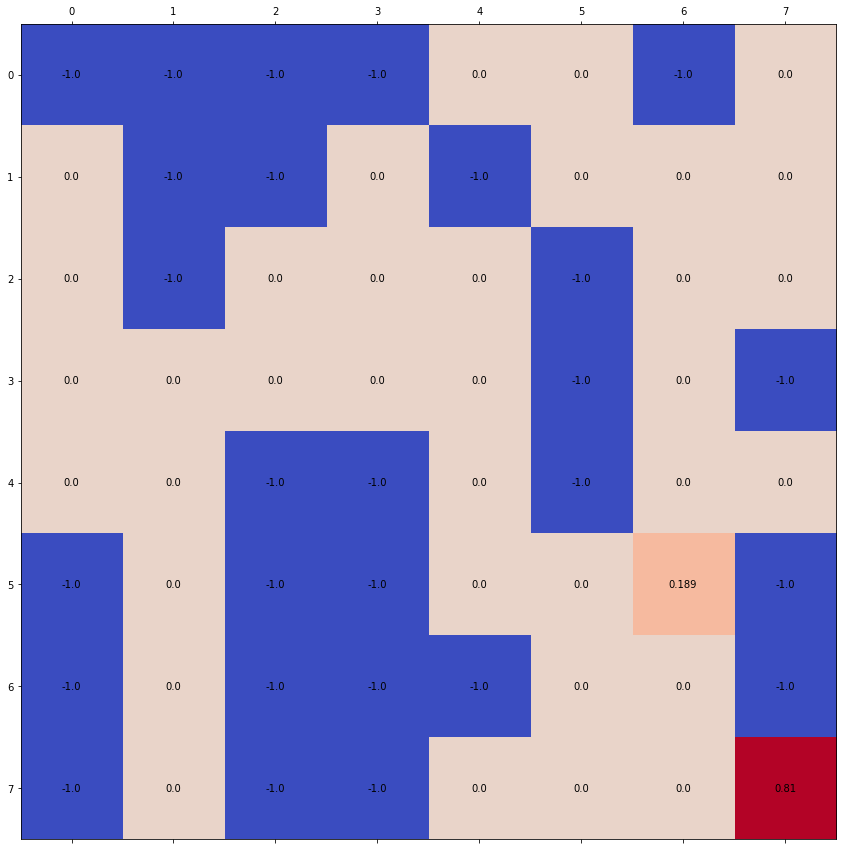

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


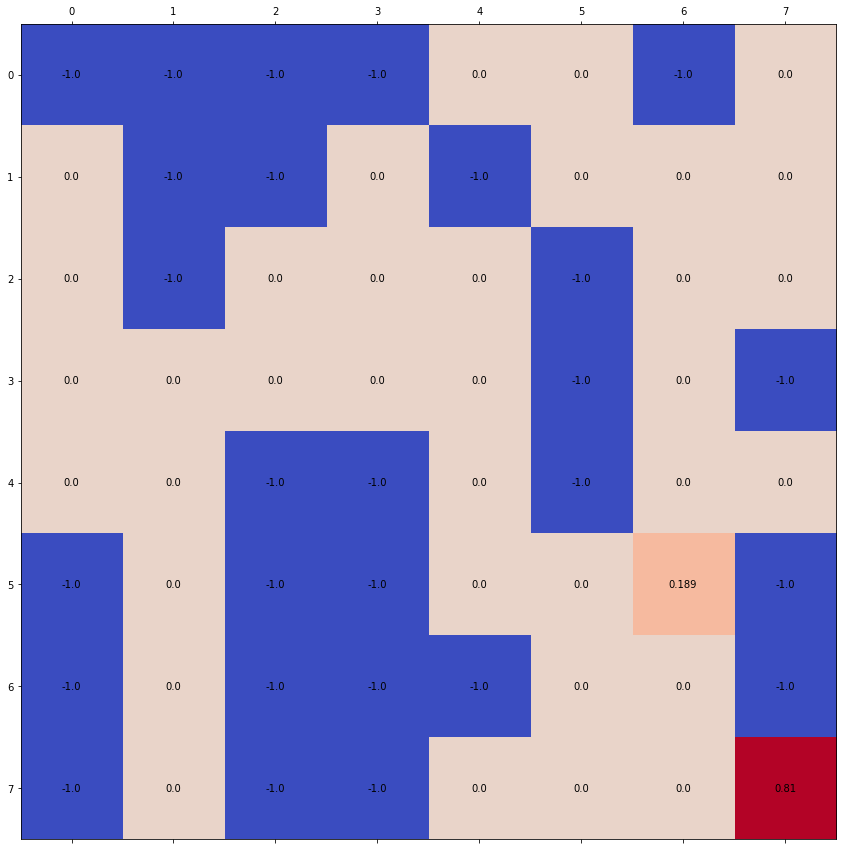

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


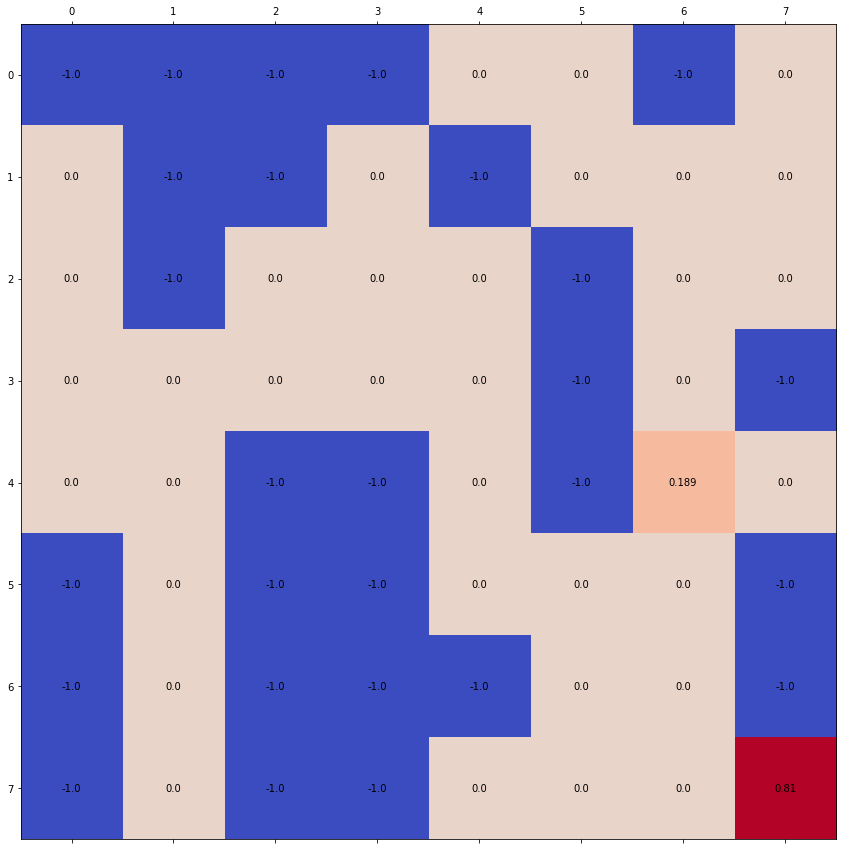

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


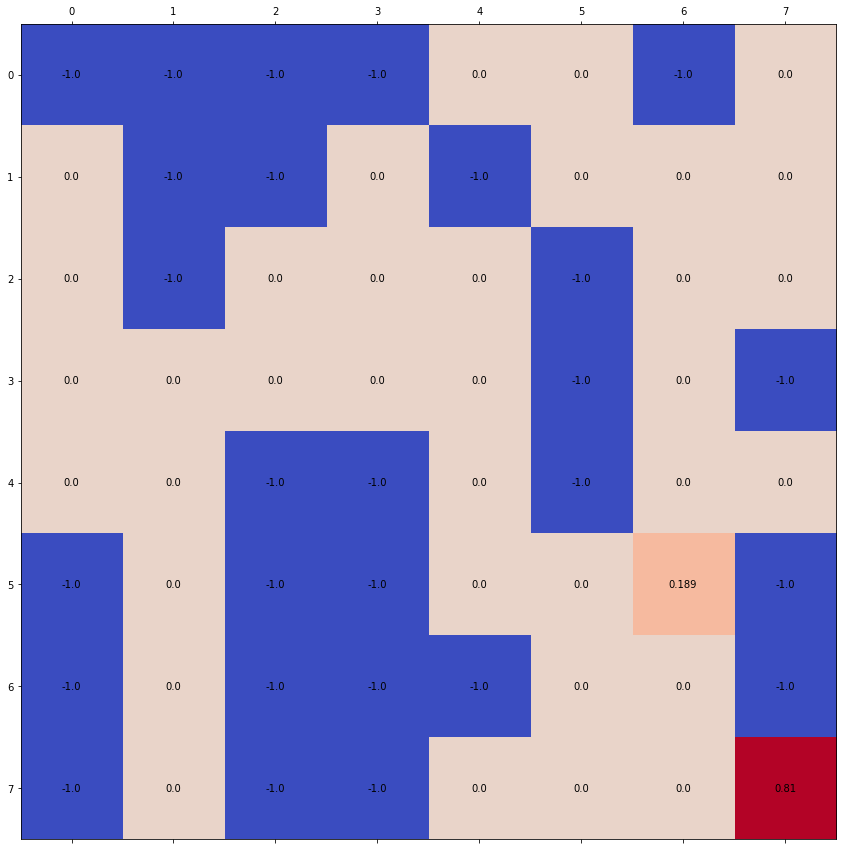

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


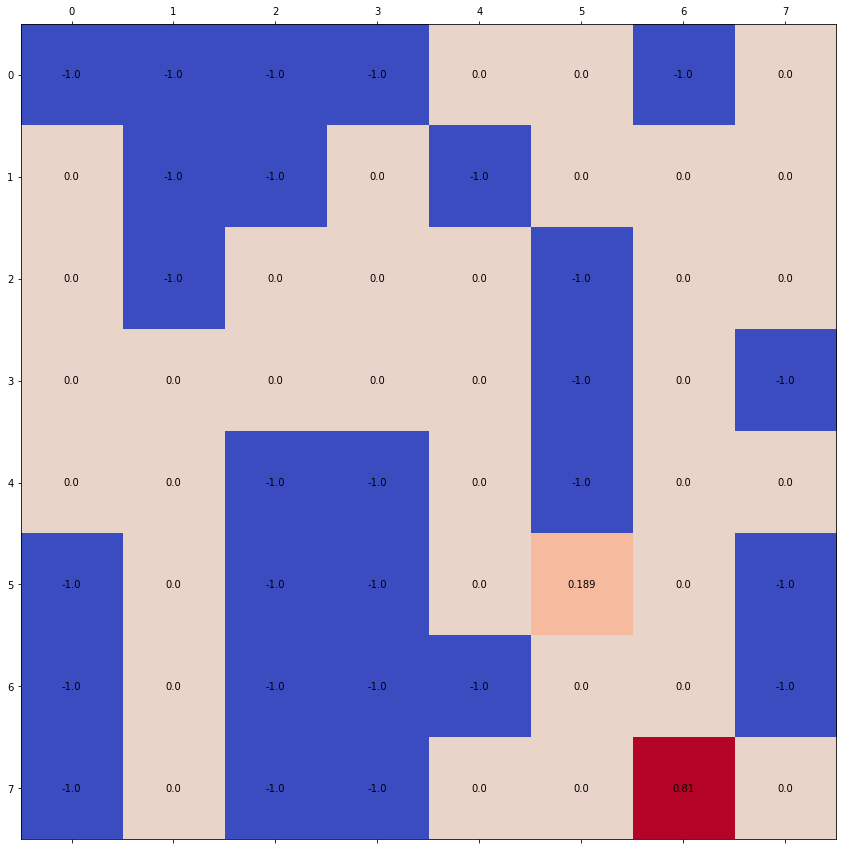

Number of zeros: 35
Action: LEFT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


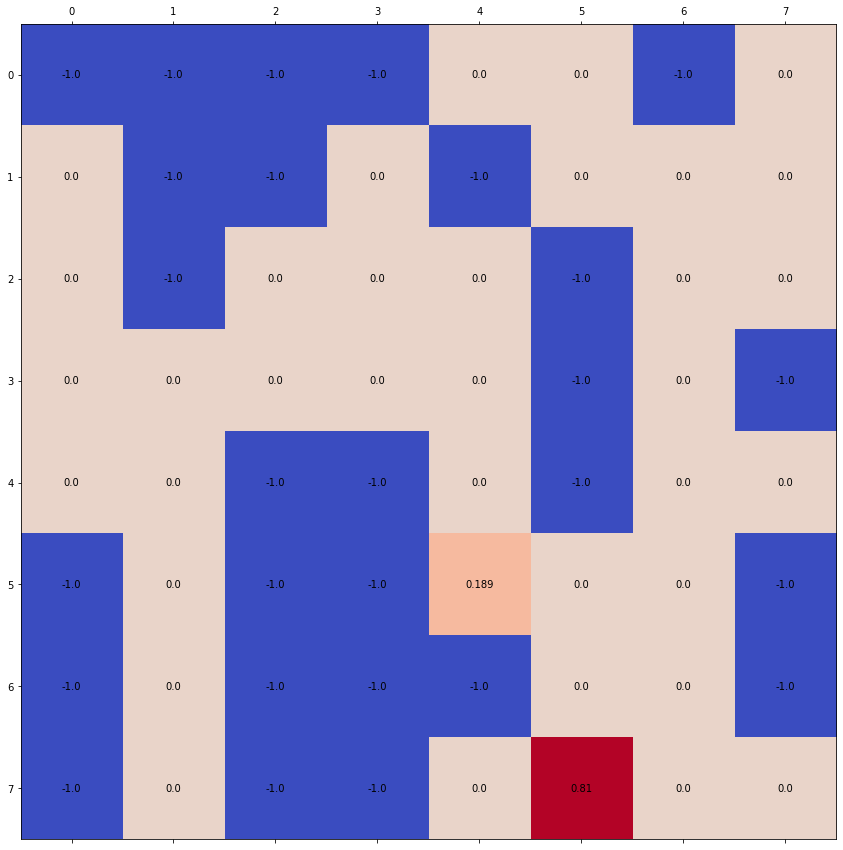

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


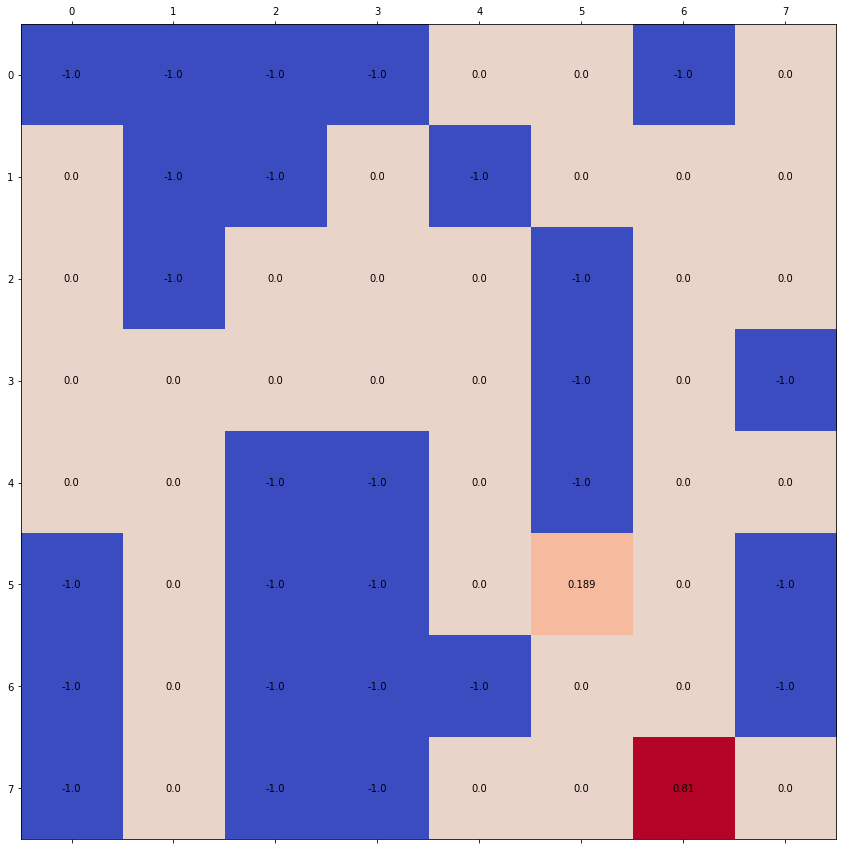

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


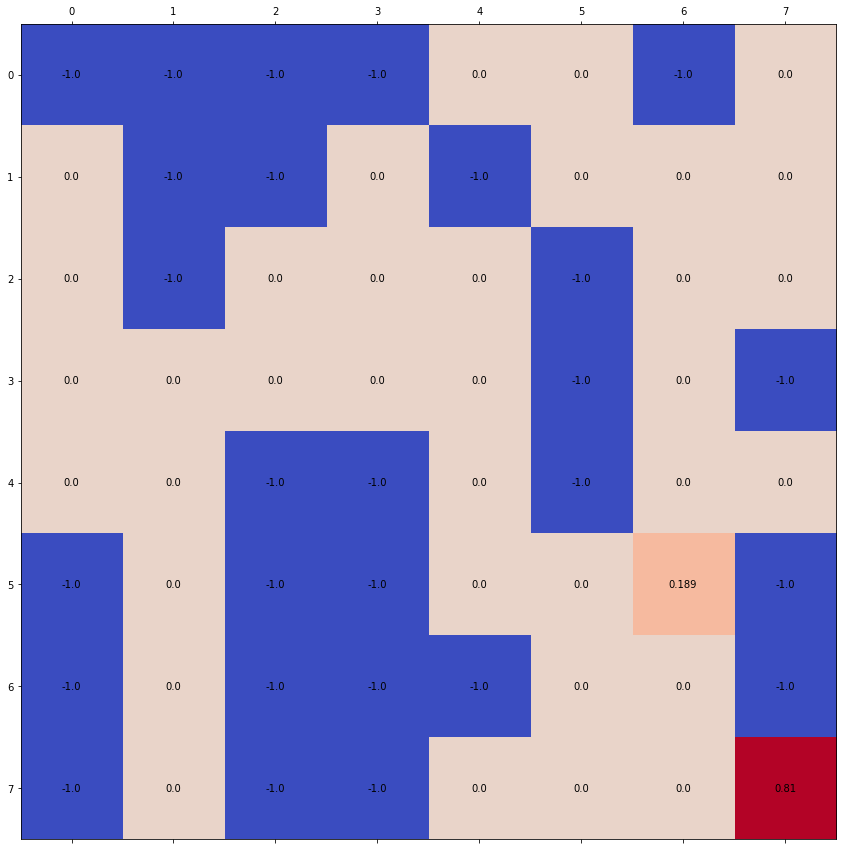

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


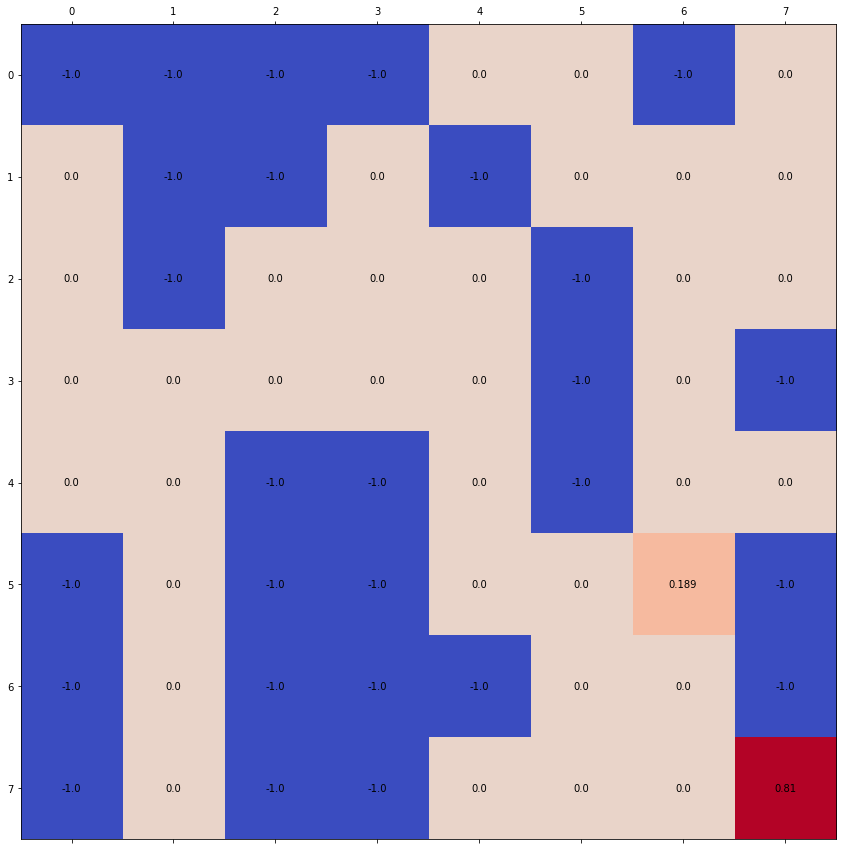

Number of zeros: 35
Action: UP Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


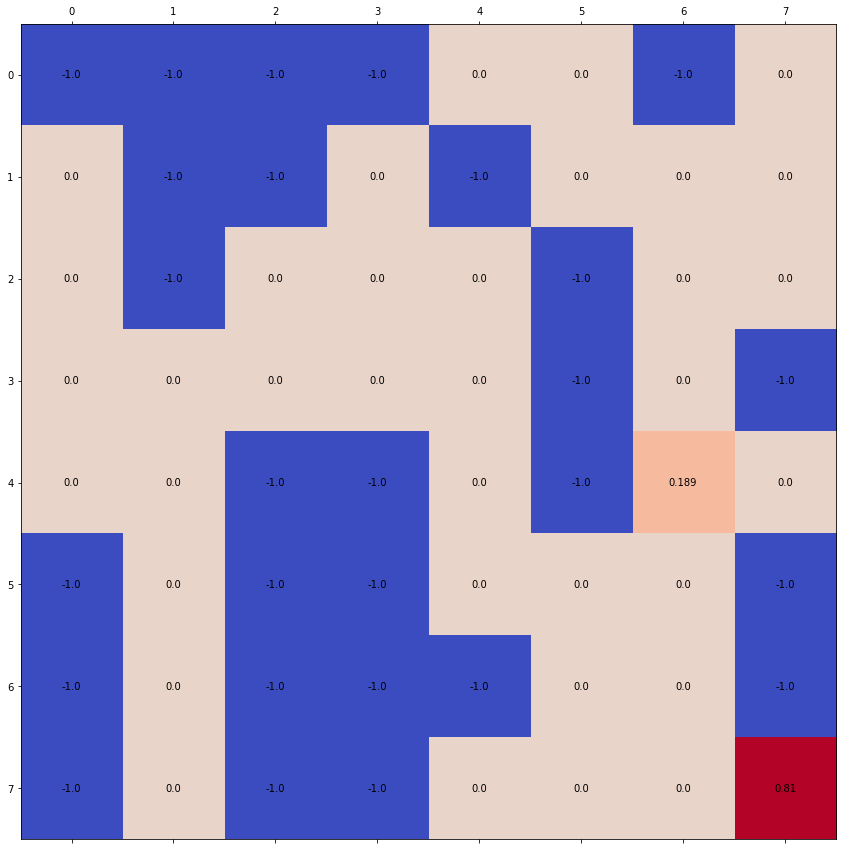

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


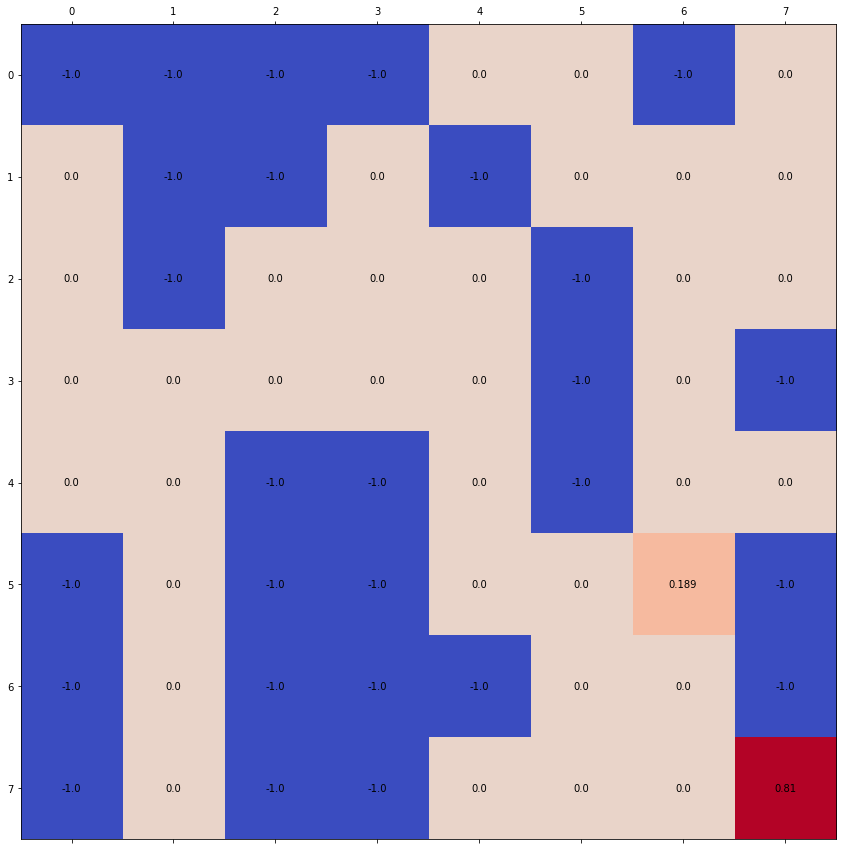

Number of zeros: 35
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


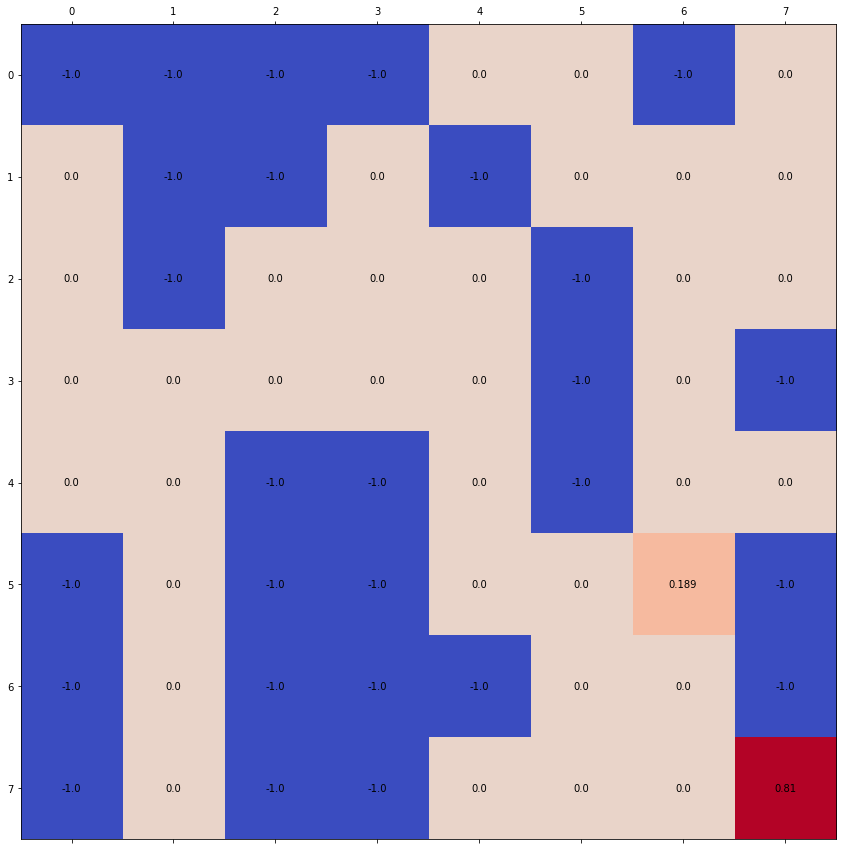

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


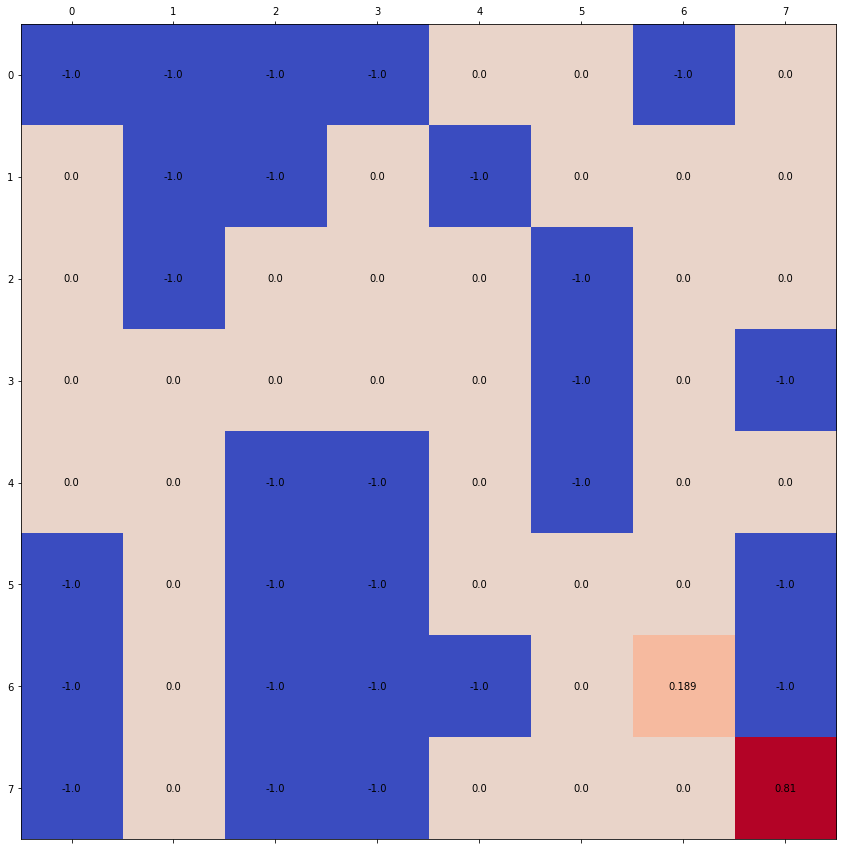

Number of zeros: 35
Action: DOWN Belief Sum: 0.9990000000000001 MSE: 0.34691049999999996


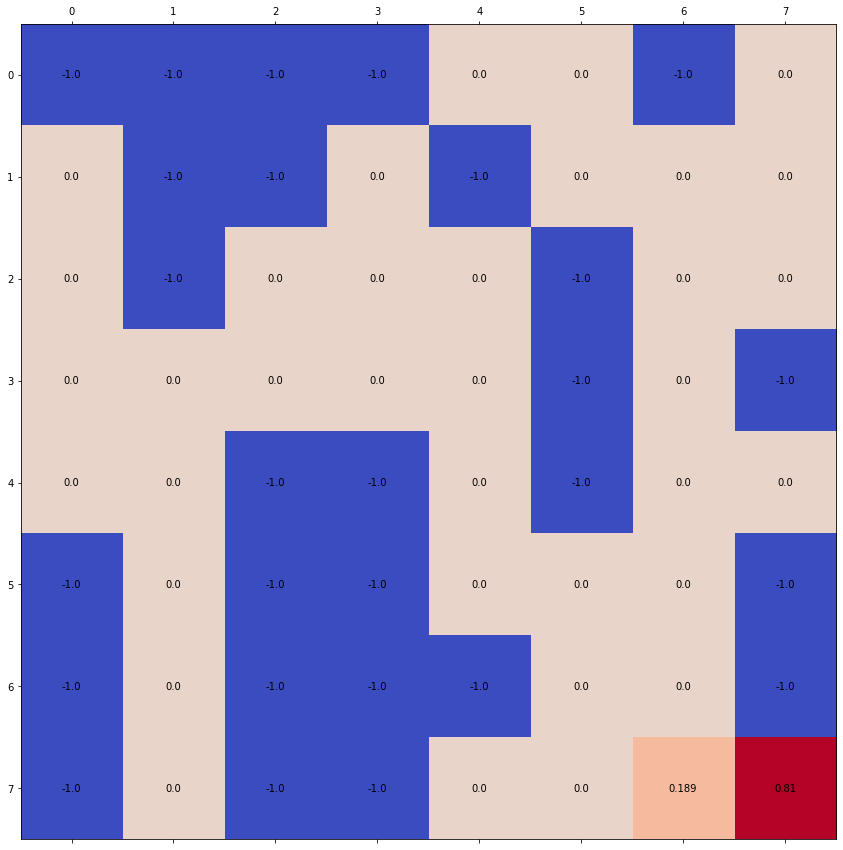

Number of zeros: 36
Action: RIGHT Belief Sum: 0.9990000000000001 MSE: 9.999999999997797e-07


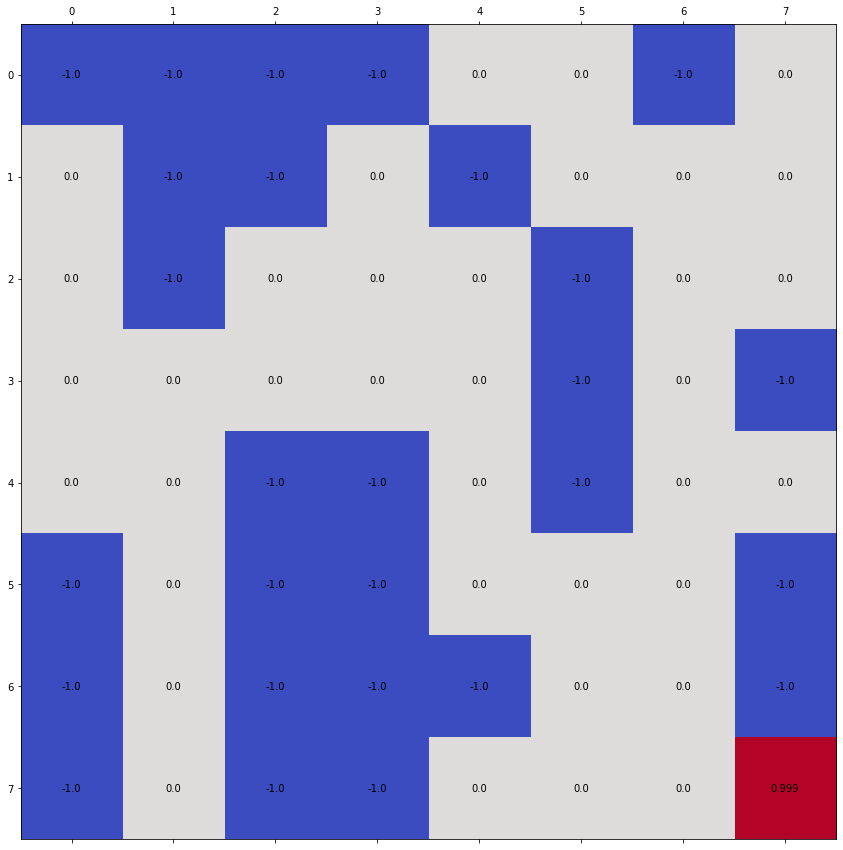

['RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'LEFT', 'UP', 'DOWN', 'RIGHT', 'UP', 'LEFT', 'UP', 'DOWN', 'DOWN', 'UP', 'LEFT', 'DOWN', 'UP', 'DOWN', 'DOWN', 'UP', 'RIGHT', 'RIGHT', 'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP', 'UP', 'RIGHT', 'UP', 'UP', 'LEFT', 'UP', 'UP', 'DOWN', 'UP', 'UP', 'RIGHT', 'LEFT', 'LEFT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'LEFT', 'LEFT', 'LEFT', 'RIGHT', 'UP', 'LEFT', 'LEFT', 'LEFT', 'RIGHT', 'LEFT', 'DOWN', 'RIGHT', 'LEFT', 'LEFT', 'DOWN', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'UP', 'LEFT', 'RIGHT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'UP', 'LEFT', 'RIGHT', 'DOWN', 'LEFT', 'RIGHT', 'LEFT', 'LEFT', 'RIGHT', 'DOWN', 'LEFT', 'DOWN', 'RIGHT', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN', 'UP', 'DOWN', 'LEFT', 'LEFT', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'UP', 'RIGHT', 'UP', 'DOWN', 'RIGHT', 'RIGHT', 'LEFT', 'LEFT', 'DOWN', 'DOWN', 'UP', 'LEFT', 'LEFT', 

In [ ]:
sequence = Astar(env.prob, env)
print(sequence)

In [ ]:
print(len(sequence))

161
